In [1]:
# This file uses the inhouse qcbm code from the paper and compares MMD with MCR

import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
import q_circuit as q # Thisis the in-house circuit code, not Qiskit
import Qiskit_Circuits as quis_c

from qiskit import IBMQ
from qiskit.providers.jobstatus import JobStatus
# Oh Hail the almighty Qiskit:
import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [2]:
IBMQ.enable_account("a66a83268fbf696a24b481c5d7568d50f14a1b2f28c6932d600a625b9cbffc6e28a6594bdd422676c9b2a214dcafa87d57012cc8678cbabaeecb319a0515f4c2")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo

<h1>Differentiable Circuit classes

Quantum Generator
Training procedure for QCBM_exact (if use the GAN procedure):

for k steps:
(Because the discriminator needs empirical sampling to trian)
1. sample from generator, sample from data distribution (try to make this as accurate as possible)
2. feed fake data and real data (accurately sampled) samples to discriminator, get discriminator gradient and update the discriminator

end for

3. feed basis_m_n to discriminator and update QCBM_exact.f_basis_m_n (features of the basis)
3. Now we have access to p_data, p_x, p_x_pos, p_x_neg sample from generator (accurately and implicitly in the gradient function, either with or without sampling error) and get generator gradient, update generator angles

In [5]:
backend = provider.get_backend('simulator_statevector')
backend = qiskit.Aer.get_backend('statevector_simulator')
backend = qiskit.Aer.get_backend('statevector_simulator')


connections = q.get_nn_pairs((3,))
circuit = quis_c.MLP_Circuit(n_qubits=3, n_layers=2, connections=connections, backend=backend, shots=2, 
                         if_measure=False)
circuit._circuit.draw()
theta_list = torch.ones(2*3*3)
pl = circuit.pdf_sample(theta_list)
pl_actual = circuit.pdf_actual(theta_list)
np.argmax(pl)
plt.plot(pl)


job result Result(backend_name='statevector_simulator', backend_version='0.10.3', qobj_id='0c9d743f-f419-48f6-a5c5-59c574759960', job_id='deebdd09-77e5-4df4-9f3a-6fe1d6868c53', success=True, results=[ExperimentResult(shots=2, success=True, meas_level=2, data=ExperimentResultData(statevector=Statevector([ 0.42985303-0.27828375j,  0.05499099+0.05778678j,
             -0.06919687-0.16953758j, -0.06919687-0.16953758j,
             -0.01475281-0.18033517j,  0.42554297+0.17161968j,
              0.42554297+0.17161968j,  0.42554297+0.17161968j],
            dims=(2, 2, 2))), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=3, name='circuit-110-116', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=3678102655, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'device': 'CPU', 'active_input_

NameError: name 'Utils' is not defined

In [10]:
np.bincount(np.array([8, 8, 1, 1, 3, 2, 1, 7]))

array([0, 3, 1, 1, 0, 0, 0, 1, 2])

In [8]:
circuit.generate(theta_vals, 4)

result {'111': 2, '001': 1, '101': 1}


array([[0., 0., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
def split(word):
        return np.array([float(char) for char in word])

In [8]:
np.array([split(k) for k in keys])

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

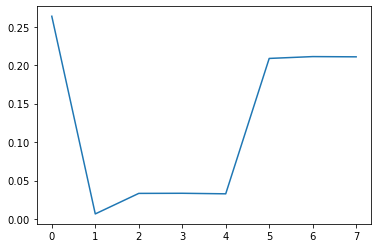

In [6]:
simulator = qiskit.Aer.get_backend('statevector_simulator')
connections = q.get_nn_pairs((3,))
circuit = quis_c.MLP_Circuit(n_qubits=3, n_layers=2, connections=connections, backend=simulator, shots=100000, 
                         if_measure=True)
circuit._circuit.draw()
theta_vals = np.ones((2, 3, 3))
pl = circuit.pdf_sample(theta_vals)
np.argmax(pl)
plt.plot(pl)

In [4]:
pl

array([0.26348, 0.00598, 0.03324, 0.0349 , 0.03176, 0.21067, 0.20839,
       0.21158])

In [13]:
# Non-Qiskit, inhouse code:
class QCBM_exact(object): # generator that supports gradient calculations
    '''
    Quantum Circuit Born Machine,

    Args:
        circuit (BlockQueue): the circuit architechture.
        batch_size (int|None): introducing sampling error, None for no sampling error.
    '''
    def __init__(self, circuit, basis_m_n, p_data, Discriminator, generate_batch_size=100, error_batch_size=None):
        self.circuit = circuit
        self.generate_batch_size = generate_batch_size # For adding sampling errors of the generator
        self.error_batch_size = error_batch_size
        self.Discriminator = Discriminator # A pytorch network supporting .forward()
        self.basis_m_n = basis_m_n # The full basis of the wave function
        self.p_data = p_data
        self.prob = None
        
        self.f_basis_m_n = None # run the DNN once and get features of all basis
        
        self.MMD = None
        self.MCR = None
        self.mcr_eps = 0.01
       
    # The outer Discriminator needs generated samples to update itself
    def generate_batch(self, theta_list):
        prob = self.pdf_actual(theta_list) # with or without sampling error
        self.prob = prob
        return sample_from_prob(self.basis_m_n, self.prob, self.generate_batch_size)
    
    # Call this in the outer space!
    # Make sure to run this feature update prior to any gradient update    
    def update_f_basis_m_n(self, f_basis_m_n):
        self.f_basis_m_n = f_basis_m_n
        return
    
    @property
    def depth(self):
        return (len(self.circuit)-1)//2

    def pdf(self, theta_list): # run the circuit with given theta_list and get actual prob distribution
        '''get probability distribution function'''
        wf = initial_wf(self.circuit.num_bit)
        self.circuit(wf, theta_list)
        pl = np.abs(wf)**2 # probability list of the simulator
        # introducing sampling error to simulate the actual scenario!
        if self.error_batch_size is not None:
            pl = prob_from_sample(sample_from_prob(np.arange(len(pl)), pl, self.error_batch_size),
                    len(pl), False)
        return pl

    def pdf_actual(self, theta_list):
        wf = initial_wf(self.circuit.num_bit)
        self.circuit(wf, theta_list)
        pl = np.abs(wf)**2 # probability list of the simulator
        return pl
    
#     def gradient_mmd(self, theta_list):
#         '''
#         get gradient.
#         '''
#         prob = self.pdf(theta_list) # with or without sampling error
#         self.prob = prob
#         grad = []
#         for i in range(len(theta_list)):
#             # pi/2 phase
#             theta_list[i] += np.pi/2.
#             prob_pos = self.pdf(theta_list) # Probability of the whole basis
#             # -pi/2 phase
#             theta_list[i] -= np.pi
#             prob_neg = self.pdf(theta_list)
#             # recover
#             theta_list[i] += np.pi/2.
            
            
#             self.f_basis_m_n = self.Discriminator(torch.tensor(self.basis_m_n).float()).numpy() # tensor to numpy
#             self.MMD = MMD_exact(self.f_basis_m_n)
#             grad_i = self.MMD.grad_MMD_exact(prob, prob_pos, prob_neg, self.p_data)
#             grad.append(grad_i)
        
#         #print('gradients', grad)
#         return np.array(grad)

    # Gradient for matching the MCR objective (second order matching) only
    def gradient_mcr(self, theta_list):
        '''
        Gradient for matching the MCR objective (second order matching) only
        '''
        if self.error_batch_size is not None:
            num_bit = self.circuit.num_bit
            p_data = prob_from_sample(sample_from_prob(np.arange(num_bit**2), self.p_data, self.error_batch_size),
                        num_bit**2, False)
        else:
            p_data = self.p_data
            
        prob = self.pdf(theta_list)
        self.prob = prob
        grad = []
        for i in range(len(theta_list)):
            # pi/2 phase
            theta_list[i] += np.pi/2.
            prob_pos = self.pdf(theta_list)
            # -pi/2 phase
            theta_list[i] -= np.pi
            prob_neg = self.pdf(theta_list)
            # recover
            theta_list[i] += np.pi/2.
            
            # THIS LINE MIGHT BE BUGGY! Because this will mess up the batch norm?
            # W
            self.Discriminator.eval()
            self.f_basis_m_n = self.Discriminator(torch.tensor(self.basis_m_n).float()).numpy() # tensor to numpy
            self.Discriminator.train()
            
            self.MCR = MCR_exact(self.mcr_eps, self.f_basis_m_n, prob, p_data)
            grad_i = self.MCR.mcr_grad_exact(prob_pos, prob_neg)
            grad.append(grad_i)
            
        #print('gradients', grad)
        return np.array(grad)

#     # Gradient for matching the MCR objective (second order matching) only
#     def gradient_vanilla(self, theta_list):
#         '''
#         Gradient for matching the MCR objective (second order matching) only
#         '''
#         prob = self.pdf(theta_list)
#         self.prob = prob
#         grad = []
#         for i in range(len(theta_list)):
#             # pi/2 phase
#             theta_list[i] += np.pi/2.
#             prob_pos = self.pdf(theta_list)
#             # -pi/2 phase
#             theta_list[i] -= np.pi
#             prob_neg = self.pdf(theta_list)
#             # recover
#             theta_list[i] += np.pi/2.
            
#             self.f_basis_m_n = self.Discriminator(torch.tensor(self.basis_m_n).float()).numpy() # tensor to numpy
#             self.MCR = MCR_exact(self.mcr_eps, self.f_basis_m_n, prob, self.p_data)
#             grad_i = self.MCR.mcr_grad_exact(prob_pos, prob_neg)
#             grad.append(grad_i)
            
#         #print('gradients', grad)
#         return np.array(grad)
    
    def gradient_MMD_MCR(self, theta_list):
        alpha = 0.0005
        mmd_grad = self.gradient_mmd(theta_list)
        mcr_grad = self.gradient_mcr(theta_list)
        return mmd_grad + alpha*mcr_grad
        
    
def sample_from_prob(x, pl, num_sample):
    '''
    sample x from probability.
    '''
    pl = 1. / pl.sum() * pl
    indices = np.arange(len(x))
    res = np.random.choice(indices, num_sample, p=pl)
    return np.array([x[r] for r in res])


def prob_from_sample(dataset, hndim, packbits):
    '''
    emperical probability from data.
    '''
    if packbits:
        dataset = packnbits(dataset).ravel()
    p_data = np.bincount(dataset, minlength=hndim)
    p_data = p_data / float(np.sum(p_data))
    return p_data

<h1>Loss Function Classes</h1>

In [10]:
# Use this inner product kernel only when you have full tracking of the complete probability space!
# Good with small probability supports
class MMD_exact(object):
    def __init__(self, f_basis): # f_basis is the exact output from the discriminator (m, n_features)
        self.basis = f_basis
        self.K = np.matmul(f_basis, f_basis.T) # explicit kernel calculation
        
    def __call__(self, px, py):
        pxy = px-py
        return self.kernel_expect(pxy, pxy) # this directly calculates the mmd loss value itself

    def kernel_expect(self, px, py): # Calculates px^T K py
        return px.dot(self.K.dot(py))

    def witness(self, px, py):
        '''witness function of this kernel.'''
        return self.K.dot(px-py)
    
    def grad_MMD_exact(self, prob, prob_pos, prob_neg, p_data):
        grad_pos = self.kernel_expect(prob, prob_pos) - self.kernel_expect(prob, prob_neg)
        grad_neg = self.kernel_expect(p_data, prob_pos) - self.kernel_expect(p_data, prob_neg)
        return grad_pos - grad_neg
     
class MMD_sample(object):
    def __call__(self, fX, fY): # fX and fY are both n by m
        fX_T_fX = (fX.T)@fX
        fX_T_fY = (fX.T)@fY
        fY_T_fY = (fY.T)@fY
        return (np.sum(fX_T_fX)-2*np.sum(fX_T_fY)+np.sum(fY_T_fY))/(m*m)
    
    def grad_MMD_sample(self, fX, fY, fX_plus, fX_minus): # fX and fY are both n by m
        fX_plus_T_fX = (fX_plus.T)@fX
        fX_minus_T_fX = (fX_minus.T)@fX
        fX_plus_T_fY = (fX_plus.T)@fY
        fX_minus_T_fY = (fX_minus.T)@fY
        return (fX_plus_T_fX-fX_minus_T_fX-fX_plus_T_fY+fX_minus_T_fY)/(m*m)

<p>MCR loss function classes

In [2]:
# Digit_basis is no longer used in the DNN discriminator setting!
def digit_basis(geometry): # complete probability space
    num_bit = np.prod(geometry)
    M = 2**num_bit
    x = np.arange(M)
    return x

def binary_basis(geometry): # complete probability space
    num_bit = np.prod(geometry)
    M = 2**num_bit
    x = np.arange(M)
    return unpacknbits(x[:,None], num_bit).reshape((-1,)+geometry).astype(float)

def unpacknbits(arr, nbit, axis=-1):
    '''unpack numbers to bitstrings.'''
    nd = np.ndim(arr)
    if axis < 0:
        axis = nd + axis
    return (((arr & (1 << np.arange(nbit - 1, -1, -1)).reshape([-1] + [1] * (nd - axis - 1)))) > 0).astype('int8')


def packnbits(arr, axis=-1):
    '''pack bitstrings to numbers.'''
    nd = np.ndim(arr)
    nbit = np.shape(arr)[axis]
    if axis < 0:
        axis = nd + axis
    return (arr * (1 << np.arange(nbit - 1, -1, -1)).reshape([-1] + [1] * (nd - axis - 1))\
           ).sum(axis=axis, keepdims=True).astype('int')

In [15]:
np.array([0,1,1]).astype(float)

array([0., 1., 1.])

In [16]:
# Create the gaussian pdf as data probability distribution
def gaussian_pdf(geometry, mu, sigma):
    '''get gaussian distribution function'''
    x = digit_basis(geometry)
    # Probabilities according to gaussian formula:
    pl = 1. / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2. * sigma**2))
    return pl/pl.sum()

In [17]:
# Create the bars and stripe pdf as data probability distribution
def barstripe_pdf(geometry):
    '''get bar and stripes PDF'''
    x = binary_basis(geometry) # All 3 by 3 image patterns
    pl = is_bs(x)
    return pl/pl.sum()

def barstripe_counts(geometry):
    '''get bar and stripes PDF'''
    x = binary_basis(geometry) # All 3 by 3 image patterns
    pl = is_bs(x)
    return pl

def is_bs(samples):
    '''a sample is a bar or a stripe.'''
    return (np.abs(np.diff(samples,axis=-1)).sum(axis=(1,2))==0\
           )|((np.abs(np.diff(samples, axis=1)).sum(axis=(1,2)))==0)

In [18]:
# Calculate the total variance of two probability distributions
def TV(px, py):
    return np.sum(np.abs(px-py))

<h1>PyTorch Integration<h1>

In [19]:
class Circuit_grad_Function(torch.autograd.Function): # Inherits the autograd.Function class
    # inputs theta_list and outputs a batch of fake data
    @staticmethod
    def forward(ctx, theta_list, bm, mcr_or_mmd): # 
        ctx.theta_list_numpy = theta_list.numpy() # save parameters (torch)
        ctx.bm = bm # save the raw bm circuit
        ctx.mcr_or_mmd = mcr_or_mmd
        #ctx.save_for_backward(Y_m_n) # save data tensor Y_m_n this way to prevent memory leak
        # Return a batch of generated samples
        X_m_n = bm.generate_batch(ctx.theta_list_numpy)
        return torch.tensor(X_m_n).float(), torch.tensor(0.0) # The second output is a scalar dummy
        
    @staticmethod # Is this backward() function automatically called at differentiation time?
    def backward(ctx, grad_output_0, grad_output_1): # grad_output is the upperstream of the chain rule partial L/partial expect_z
        """ Backward pass computation """
        theta_list_numpy = ctx.theta_list_numpy
        #Y_m_n = ctx.saved_tensors #retrieve the tensors in save_for_backward() expected z not used
        if ctx.mcr_or_mmd == 'MCR':
            gradients = ctx.bm.gradient_mcr(theta_list_numpy) # numpy array
        else: #'MMD'
            gradients = ctx.bm.gradient_mmd(theta_list_numpy) # numpy array
        return torch.tensor(gradients).float(), None, None
        #  and it should return as many tensors, as there were inputs to forward().

# Quantum generator wrapper around the differentiable circuit
class Q_Generator_theoretical(torch.nn.Module): 
    def __init__(self, circuit, basis_m_n, p_data, Discriminator, generate_batch_size, 
                 error_batch_size, mcr_or_mmd='MCR'):
        super(Q_Generator_theoretical, self).__init__()
        self.bm = QCBM_exact(circuit, basis_m_n, p_data, Discriminator, generate_batch_size, error_batch_size)
        np.random.seed(700)
        self.register_parameter(name='theta_list', param=torch.nn.Parameter(torch.tensor(np.random.random(circuit.num_param)*2*np.pi)))
        self.mcr_or_mmd = mcr_or_mmd
        print('length of theta list', len(self.theta_list))
    def forward(self): # Generate a batch of fake samples
        return Circuit_grad_Function.apply(self.theta_list, self.bm, self.mcr_or_mmd) # Save stuff in the ctx context
        
    

In [20]:
class Discriminator(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Discriminator, self).__init__()
        
        self.l1 = nn.Sequential(
                      nn.Linear(input_dim, 4),
                      nn.BatchNorm1d(num_features=4),
                      nn.LeakyReLU(0.2, inplace=True),
                      #nn.MaxPool2d(kernel_size=2, stride=2) # dim reduction!
                    )
        self.l2 = nn.Sequential(#second conv layer
                      nn.Linear(4, 4),
                      nn.BatchNorm1d(num_features=4),
                      nn.LeakyReLU(0.2, inplace=True),
                      #nn.MaxPool2d(kernel_size=2, stride=2), # dim reduction!
                    )
        self.l3 = nn.Sequential(# output is 4 by 7 by 7
                      #nn.Flatten(), #[batch-size, 4*7*7]
                      nn.Linear(4, output_dim),
                      nn.Sigmoid()
                    )
                    
    def forward(self, x):
        h1 = self.l1(x) # batch, 1, 14, 14
        h2 = self.l2(h1) 
        #s = h1 + h2
        output = self.l3(h2)
        return output

# differentiable:
def discriminator_MCR_loss(fX_m_n, fY_m_n, d, m, eps): # d is the feature dimension, same as n
    XXT = torch.matmul( fX_m_n.T, fX_m_n )
    YYT = torch.matmul( fY_m_n.T, fY_m_n )
    
    I_XX_T_YYT = torch.eye(d) + (d/(2*m*eps*eps))*(XXT+YYT)
    I_XX_T = torch.eye(d) + (d/(m*eps*eps))*XXT
    I_YY_T = torch.eye(d) + (d/(m*eps*eps))*YYT
    
    delta_R = (1/2)*torch.logdet(I_XX_T_YYT)-(1/4)*torch.logdet(I_XX_T)-(1/4)*torch.logdet(I_YY_T)
    return delta_R


<h1> Alternate minimax iteration

length of theta list 52
TV 1.064880908231281


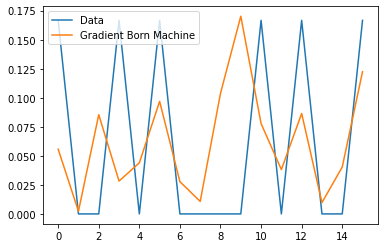

In [21]:
%matplotlib inline
#Parameters
depth = 4
geometry = (2,2) 
num_bit = np.prod(geometry)
hndim = 2**num_bit

output_dim = 2 # for Discriminator

pairs = get_nn_pairs(geometry) # fully pair-wise entangled
circuit = get_diff_circuit(num_bit, depth, pairs)

# Data distribution
#p_gau = gaussian_pdf(geometry, mu=hndim/2., sigma=hndim/4.)
p_bs = barstripe_pdf(geometry)
p_data = p_bs
d, m, eps = output_dim, 4, 0.1
# Discriminator object
D = Discriminator(num_bit, output_dim)
# Generator object
basis_m_n = binary_basis((num_bit,)) # meaning that each image is already flattened out
G = Q_Generator_theoretical(circuit, basis_m_n, p_bs, D, generate_batch_size=m, error_batch_size=m, 
                            mcr_or_mmd='MCR')


# Setup Adam optimizers for both G and D
lr = 1e-3
beta1 = 0.9
optimizerD = torch.optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999)) #The parameters are the thetas
#optimizerD = torch.optim.SGD(D.parameters(), lr=lr)
#optimizerG = torch.optim.SGD(G.parameters(), lr=lr)

pl = G.bm.pdf_actual(G.theta_list.detach().numpy())

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

Starting Training Loop...
D delta_R:  tensor(0.2211, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1157, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0747, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0297, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1680, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1152, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2451, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2579, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3368, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2510, grad_fn=<NegBackward>)
G delta_R:  tensor(0.0001, grad_fn=<SubBackward0>)
TV 1.0658327719312115
D delta_R:  tensor(0.3326, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0230, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0775, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4478, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1770, grad_fn=<NegBackward>)
D delta_R:  tensor(1.0827, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1739, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1499, grad_fn=<NegBackward>)
D

G delta_R:  tensor(0.0284, grad_fn=<SubBackward0>)
TV 1.0559989022871907
D delta_R:  tensor(0.4030, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3346, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6254, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1754, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1643, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1512, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6812, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1241, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1921, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1603, grad_fn=<NegBackward>)
G delta_R:  tensor(0.0358, grad_fn=<SubBackward0>)
TV 1.0556482305097405
D delta_R:  tensor(0.4254, grad_fn=<NegBackward>)
D delta_R:  tensor(0.8878, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1451, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3449, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0876, grad_fn=<NegBackward>)
D delta_R:  tensor(0.8701, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4059, grad_fn=<NegBackward>)
D de

G delta_R:  tensor(0.1406, grad_fn=<SubBackward0>)
TV 1.045328492691125
D delta_R:  tensor(0.5779, grad_fn=<NegBackward>)
D delta_R:  tensor(0.9577, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2166, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4877, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4123, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0693, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5780, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0318, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6118, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1369, grad_fn=<NegBackward>)
G delta_R:  tensor(0.1809, grad_fn=<SubBackward0>)
TV 1.0445618768869938
D delta_R:  tensor(0.2124, grad_fn=<NegBackward>)
D delta_R:  tensor(0.9043, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1227, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0598, grad_fn=<NegBackward>)
D delta_R:  tensor(1.2670, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3649, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2164, grad_fn=<NegBackward>)
D del

G delta_R:  tensor(0.2078, grad_fn=<SubBackward0>)
TV 1.0381806595306977
D delta_R:  tensor(0.4921, grad_fn=<NegBackward>)
D delta_R:  tensor(1.3115, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1620, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2127, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2795, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1116, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3211, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4509, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1237, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1548, grad_fn=<NegBackward>)
G delta_R:  tensor(0.2908, grad_fn=<SubBackward0>)
TV 1.0373369113365345
D delta_R:  tensor(0.2204, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1349, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2010, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2930, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6332, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3972, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3603, grad_fn=<NegBackward>)
D de

G delta_R:  tensor(0.3256, grad_fn=<SubBackward0>)
TV 1.0204840073329127
D delta_R:  tensor(0.4118, grad_fn=<NegBackward>)
D delta_R:  tensor(1.6208, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6568, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1024, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1187, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5233, grad_fn=<NegBackward>)
D delta_R:  tensor(0.0970, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4644, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2770, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1665, grad_fn=<NegBackward>)
G delta_R:  tensor(0.5014, grad_fn=<SubBackward0>)
TV 1.0185067852413183
D delta_R:  tensor(0.4588, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2023, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4496, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6772, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1000, grad_fn=<NegBackward>)
D delta_R:  tensor(1.0959, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3627, grad_fn=<NegBackward>)
D de

G delta_R:  tensor(0.5932, grad_fn=<SubBackward0>)
TV 0.9913323140593617
D delta_R:  tensor(0.1256, grad_fn=<NegBackward>)
D delta_R:  tensor(0.8254, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2655, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1983, grad_fn=<NegBackward>)
D delta_R:  tensor(0.8495, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1314, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5807, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3342, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5041, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5005, grad_fn=<NegBackward>)
G delta_R:  tensor(0.5597, grad_fn=<SubBackward0>)
TV 0.9895338939895537
D delta_R:  tensor(0.4988, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2149, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6683, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2995, grad_fn=<NegBackward>)
D delta_R:  tensor(0.3522, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4908, grad_fn=<NegBackward>)
D delta_R:  tensor(0.7351, grad_fn=<NegBackward>)
D de

G delta_R:  tensor(0.4290, grad_fn=<SubBackward0>)
TV 0.9706211748848667
D delta_R:  tensor(0.2620, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6241, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1725, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5559, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5380, grad_fn=<NegBackward>)
D delta_R:  tensor(0.8290, grad_fn=<NegBackward>)
D delta_R:  tensor(0.5515, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6048, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2285, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6242, grad_fn=<NegBackward>)
G delta_R:  tensor(0.5685, grad_fn=<SubBackward0>)
TV 0.9697970787067429
D delta_R:  tensor(0.4810, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2023, grad_fn=<NegBackward>)
D delta_R:  tensor(0.2929, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1088, grad_fn=<NegBackward>)
D delta_R:  tensor(0.6885, grad_fn=<NegBackward>)
D delta_R:  tensor(0.1698, grad_fn=<NegBackward>)
D delta_R:  tensor(0.4793, grad_fn=<NegBackward>)
D de

KeyboardInterrupt: 

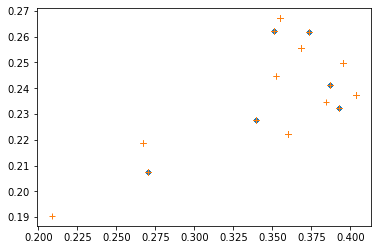

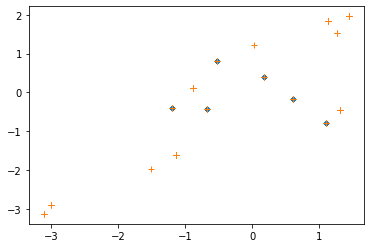

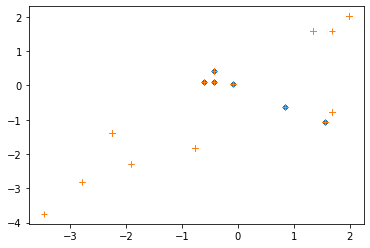

In [22]:
folder = 'MCR_Q_GAN'
# Training Loop
%matplotlib inline
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
TVs = []
lowest_tv = np.inf
best_theta_list = None
iters = 0
k_D=10
k_G=1

num_iters = 50000
print("Starting Training Loop...")
# For each epoch
for itr in range(num_iters):
    ############################
    # (1) Update D network
    ###########################
    for i_D in range(k_D):
        Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_data, m)).float() # Sample to get real data
        # Generate fake image batch with G
        X_m_n, G_grad_dummy = G() # already a tensor (require_grads=False)
        
        #X_m_n = torch.tensor(sample_from_prob(basis_m_n, np.max(p_data)-p_data, m)).float()
        
        concact_2m_n = torch.cat([Y_m_n, X_m_n.detach()])
        label = np.concatenate([np.ones(m), np.zeros(m)])
        inds = np.array([i for i in range(2*m)])
        np.random.shuffle(inds) # inplace
        label = label[inds]
        concact_2m_n = concact_2m_n[inds]
        
        D.zero_grad()
        # Forward pass 
        fconcact_2m_n = D(concact_2m_n)

        fY_m_n = fconcact_2m_n[label==1]
        fX_m_n = fconcact_2m_n[label==0]

        neg_delta_R = -discriminator_MCR_loss(fX_m_n, fY_m_n, d, m, eps) # differentiable
        # Calculate D's gradients for this batch, accumulated (summed) with previous gradients
        neg_delta_R.backward()
        # Update D
        optimizerD.step()
        D_losses.append(-neg_delta_R)
        print('D delta_R: ', -neg_delta_R) 

    ############################
    # (2) Update G network, fixing Discriminator
    ###########################
    Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_data, 160)).float()
    fY_m_n = D(Y_m_n)
    G.bm.generate_batch_size = 160 # This only affects the learning of the Discriminator, here only for visualization purposes 
    
    for i_G in range(k_G):
        G.zero_grad() # clear the gradients for G.theta_list
        X_m_n, G_grad_dummy = G() # already a tensor (require_grads=False)
        # The generator implicitly refer to the Discriminator for gradient calculations
        G_grad_dummy.backward() # G has perfect knowledge of the p_data distribution
        #print('G thetalist grad', G.theta_list.grad)
        # theta_list parameters' gradients are now loaded to the theta_list torch parameter

        # Update G
        optimizerG.step()
    
        concat_2m_n = torch.cat([Y_m_n, X_m_n.detach()], axis=0)
        D.eval()
        fconcat_2m_n = D(concat_2m_n) 
        D.train()
        fY_m_n = fconcat_2m_n[0:Y_m_n.shape[0],:]
        fX_m_n = fconcat_2m_n[Y_m_n.shape[0]:,:]

        delta_R = discriminator_MCR_loss(fX_m_n, fY_m_n, d, m, eps) # differentiable
        print('G delta_R: ', delta_R)
        pl = G.bm.pdf_actual(G.theta_list.detach().numpy())
        tv = TV(pl, p_data)
        TVs.append(tv)
        print('TV', tv)
        G_losses.append(delta_R)

        if tv < lowest_tv:
            lowest_tv = tv
            best_theta_list = copy.deepcopy(G.theta_list.detach().numpy())
        
        if itr%50==0:
            if output_dim == 3:
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.scatter(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], fY_m_n.detach()[:, 2])
                ax.scatter(fX_m_n.detach()[:, 0], fX_m_n.detach()[:, 1], fX_m_n.detach()[:, 2])
                fig.savefig(str(itr)+'_'+str(i_G)+'.png', bbox_inches='tight')
            elif output_dim == 2:
                fig = plt.figure()
                plt.plot(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], '.')
                plt.plot(fX_m_n.detach()[:, 0], fX_m_n.detach()[:, 1], '+')
                fig.savefig(folder + '/'+str(itr)+'_'+str(i_G)+'_g_eval.png', bbox_inches='tight')
            else: #1-dimensional
                fig = plt.figure()
                plt.plot(fY_m_n.detach()[:, 0], np.zeros(m), '.')
                plt.plot(fX_m_n.detach()[:, 0], np.ones(m), '+')
                fig.savefig(folder + '/'+str(itr)+'_'+str(i_G)+'_g_eval.png', bbox_inches='tight')
    
pl = G.bm.pdf_actual(G.theta_list.detach().numpy())

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.figure()
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

plt.plot(G_losses)
plt.plot(TVs)

In [34]:
D_pretrain = copy.deepcopy(D)
G_pretrain = copy.deepcopy(G)
D = copy.deepcopy(D_pretrain)
G = copy.deepcopy(G_pretrain)

Starting Training Loop...
D delta_R:  tensor(4.6145, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4265, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3472, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4305, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7314, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5756, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8133, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2788, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7976, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6023, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0932, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8715, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3185, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5248, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6834, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6158, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4722, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7402, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3087, grad_fn=<NegBackward>)
D delta_R:  tensor(3.820

G delta_R:  tensor(0.0661, grad_fn=<SubBackward0>)
TV 0.3146275210822565
D delta_R:  tensor(4.0582, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7909, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8905, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5596, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4098, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8260, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9698, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8145, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8002, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5850, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6381, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8964, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7448, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8857, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2308, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3783, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8967, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2906, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4921, 

G delta_R:  tensor(0.1755, grad_fn=<SubBackward0>)
TV 0.3099554463697716
D delta_R:  tensor(4.1604, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7726, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1934, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6719, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7426, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6710, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7418, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8171, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6880, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2664, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3157, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5081, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3878, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8988, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5383, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8827, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0029, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4458, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4504, 

<ipython-input-68-25ec2321422e>:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


D delta_R:  tensor(4.9357, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9838, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6787, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4253, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8481, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2900, grad_fn=<NegBackward>)
D delta_R:  tensor(3.5960, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4175, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5913, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1133, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2900, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9452, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5494, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2383, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6534, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0610, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5448, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8211, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5277, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3852, grad_fn=<NegBackward>)


G delta_R:  tensor(0.0838, grad_fn=<SubBackward0>)
TV 0.31164407356775187
D delta_R:  tensor(4.3992, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4437, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2355, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2854, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6660, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8647, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3591, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3724, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4316, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8550, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9781, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2423, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0128, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7570, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6555, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8867, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4907, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6191, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3177,

G delta_R:  tensor(0.1058, grad_fn=<SubBackward0>)
TV 0.31249878142072085
D delta_R:  tensor(4.5406, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0824, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2037, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3833, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6385, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9435, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3395, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7592, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4661, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8006, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3729, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3951, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3592, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0972, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8274, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9181, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7243, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6140, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4437,

G delta_R:  tensor(0.0694, grad_fn=<SubBackward0>)
TV 0.3109477481997843
D delta_R:  tensor(4.7435, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5644, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7490, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8557, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4788, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7569, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2883, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2718, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7865, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7564, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9023, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7152, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8873, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1038, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9272, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3494, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4641, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2524, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6474, 

G delta_R:  tensor(0.1115, grad_fn=<SubBackward0>)
TV 0.30720958762150596
D delta_R:  tensor(4.3296, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9499, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1734, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8885, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3387, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1526, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6591, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9358, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5598, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2762, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9439, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8234, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2063, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5160, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4437, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6856, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9023, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7571, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9913,

G delta_R:  tensor(0.1210, grad_fn=<SubBackward0>)
TV 0.3077471845283424
D delta_R:  tensor(4.3045, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6949, grad_fn=<NegBackward>)
D delta_R:  tensor(3.1681, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4143, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6976, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0826, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6310, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2908, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6160, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5209, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8876, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7865, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4913, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6454, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5706, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3467, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9287, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5749, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4383, 

G delta_R:  tensor(0.2224, grad_fn=<SubBackward0>)
TV 0.3090773766142328
D delta_R:  tensor(4.1730, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5994, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3922, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5836, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6892, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3715, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5035, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6832, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0126, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3497, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5605, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4461, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5796, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8590, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2471, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4926, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9966, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0848, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4018, 

G delta_R:  tensor(0.0423, grad_fn=<SubBackward0>)
TV 0.30957702288969857
D delta_R:  tensor(4.3906, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4446, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4590, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5202, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8405, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5519, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3631, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3264, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5615, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8584, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8203, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5422, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6434, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8698, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3380, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8526, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3959, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9935, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9449,

G delta_R:  tensor(0.1011, grad_fn=<SubBackward0>)
TV 0.3089640780017709
D delta_R:  tensor(4.7206, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5030, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2623, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9209, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9147, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0335, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5768, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5029, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8388, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4041, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5689, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6196, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6608, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6963, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7731, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8872, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5636, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1661, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4255, 

G delta_R:  tensor(0.1933, grad_fn=<SubBackward0>)
TV 0.30853691249491594
D delta_R:  tensor(4.1913, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7895, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8643, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4862, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4743, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6077, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7041, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5634, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2397, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0806, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9837, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3298, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1564, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7454, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8953, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6835, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1337, grad_fn=<NegBackward>)
D delta_R:  tensor(3.2099, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8934,

G delta_R:  tensor(0.0804, grad_fn=<SubBackward0>)
TV 0.307903032143753
D delta_R:  tensor(3.3548, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4052, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9065, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9104, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6113, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3233, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0629, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3745, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0115, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3690, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3033, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5682, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1168, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0156, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7117, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9070, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3582, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0079, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8020, g

G delta_R:  tensor(0.1072, grad_fn=<SubBackward0>)
TV 0.3072143248417938
D delta_R:  tensor(4.8538, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4533, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4805, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5153, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0113, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2697, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2000, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6686, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3087, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5738, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7112, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2766, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9653, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5882, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4214, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6632, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8733, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5740, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1664, 

G delta_R:  tensor(0.1538, grad_fn=<SubBackward0>)
TV 0.30789749360321017
D delta_R:  tensor(4.6569, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6386, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6671, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8252, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6948, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7530, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9963, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1576, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4212, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3950, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4634, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6183, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0069, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3152, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4358, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6359, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6986, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6474, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7387,

G delta_R:  tensor(0.1123, grad_fn=<SubBackward0>)
TV 0.3086768614017127
D delta_R:  tensor(4.8546, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5125, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5994, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3168, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5822, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5472, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2143, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3806, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9011, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9146, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6798, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5304, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9969, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5670, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4397, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2593, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6500, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9971, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7716, 

G delta_R:  tensor(0.0464, grad_fn=<SubBackward0>)
TV 0.30935420078804554
D delta_R:  tensor(4.9034, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5398, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7914, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7446, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6080, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4566, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5232, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5278, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1270, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4489, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4873, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6300, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5917, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6415, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8269, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5212, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2986, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6659, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4810,

G delta_R:  tensor(0.1012, grad_fn=<SubBackward0>)
TV 0.30969711854684645
D delta_R:  tensor(4.8431, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6832, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6029, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8187, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4035, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8921, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8500, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5524, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2460, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7009, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7433, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2882, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8178, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2234, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8950, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2633, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3309, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9141, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7995,

G delta_R:  tensor(0.0962, grad_fn=<SubBackward0>)
TV 0.3099113380934079
D delta_R:  tensor(4.5168, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0097, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4018, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6360, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9373, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6048, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7807, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7589, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6560, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8153, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5768, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2519, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6525, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8911, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3307, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9000, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6151, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9186, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7279, 

G delta_R:  tensor(0.0409, grad_fn=<SubBackward0>)
TV 0.3094474732733409
D delta_R:  tensor(4.8488, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3010, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7389, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8963, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5591, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2606, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7196, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3430, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6244, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7388, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8075, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3983, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6441, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5302, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0648, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6060, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4146, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6774, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8255, 

G delta_R:  tensor(0.0514, grad_fn=<SubBackward0>)
TV 0.30831969544530374
D delta_R:  tensor(4.5566, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5149, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8785, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8823, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8487, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4632, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8227, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7263, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4294, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8943, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5563, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5401, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5100, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9996, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2656, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2080, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5768, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6795, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6168,

G delta_R:  tensor(0.0651, grad_fn=<SubBackward0>)
TV 0.30839554362050176
D delta_R:  tensor(3.9865, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6725, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8321, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7674, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8030, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2226, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5142, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6659, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8484, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8580, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8440, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7889, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5307, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9282, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0284, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2818, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7585, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7799, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7588,

G delta_R:  tensor(0.1236, grad_fn=<SubBackward0>)
TV 0.3088839864342543
D delta_R:  tensor(4.5370, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7389, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6831, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4508, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3636, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2851, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0995, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8887, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6750, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8805, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9054, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9607, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1721, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7199, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4793, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2921, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5934, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1740, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8029, 

G delta_R:  tensor(0.0386, grad_fn=<SubBackward0>)
TV 0.3095928194589007
D delta_R:  tensor(4.8806, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6703, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8576, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8047, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7721, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3399, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0500, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7313, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2014, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9339, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5953, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9651, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5020, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5758, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0520, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6607, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7680, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8291, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2969, 

G delta_R:  tensor(0.0721, grad_fn=<SubBackward0>)
TV 0.3100995722979358
D delta_R:  tensor(5.0105, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5995, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2503, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1450, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5375, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4035, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8255, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7776, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8011, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3265, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7674, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8321, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3063, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2094, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2741, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3806, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7151, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9381, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7075, 

G delta_R:  tensor(0.0566, grad_fn=<SubBackward0>)
TV 0.31043716364050067
D delta_R:  tensor(4.8923, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3677, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0166, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9257, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2252, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8155, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5404, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9182, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6820, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9604, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9421, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4368, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1286, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8892, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2136, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8215, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8802, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4055, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1820,

G delta_R:  tensor(0.0409, grad_fn=<SubBackward0>)
TV 0.3101852182266814
D delta_R:  tensor(4.2198, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3670, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3496, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4758, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1560, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8755, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6028, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9983, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4453, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9176, grad_fn=<NegBackward>)
D delta_R:  tensor(3.5621, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4667, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6321, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4496, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3473, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7816, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8321, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0070, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5916, 

G delta_R:  tensor(0.1909, grad_fn=<SubBackward0>)
TV 0.30921290936094414
D delta_R:  tensor(4.6111, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5713, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6445, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5129, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3002, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7657, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7671, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6015, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9187, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5835, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4125, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3545, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6167, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6439, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5898, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7969, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6606, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4377, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7572,

G delta_R:  tensor(0.1688, grad_fn=<SubBackward0>)
TV 0.3090414319928211
D delta_R:  tensor(4.5111, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7118, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6821, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9131, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8377, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6712, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6614, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6896, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3248, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3330, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7810, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6020, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8570, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4073, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3375, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4418, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4640, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8420, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2750, 

G delta_R:  tensor(0.0462, grad_fn=<SubBackward0>)
TV 0.30925970536523845
D delta_R:  tensor(4.5666, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0342, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8423, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8569, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6673, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4875, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1894, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3150, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1965, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8542, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2899, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5829, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8762, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8297, grad_fn=<NegBackward>)
D delta_R:  tensor(3.5191, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7974, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9174, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3390, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7780,

G delta_R:  tensor(0.0048, grad_fn=<SubBackward0>)
TV 0.30989106249295517
D delta_R:  tensor(4.5824, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2413, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6095, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7913, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6663, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4501, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4442, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7712, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1014, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1056, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2679, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6038, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1759, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9755, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6215, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8214, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9215, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0095, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8196,

G delta_R:  tensor(0.2007, grad_fn=<SubBackward0>)
TV 0.3105963065975558
D delta_R:  tensor(4.7918, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8175, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1657, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4884, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1415, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5670, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1743, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5470, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6498, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0776, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9836, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9025, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8799, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4706, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8036, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0844, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4782, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5218, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3306, 

G delta_R:  tensor(0.0841, grad_fn=<SubBackward0>)
TV 0.3110936607979705
D delta_R:  tensor(4.9123, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8239, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4812, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6548, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6551, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8577, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7563, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9643, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0482, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9931, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5870, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6046, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7334, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0300, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1381, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3509, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2052, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0958, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1143, 

G delta_R:  tensor(0.1053, grad_fn=<SubBackward0>)
TV 0.3113132465231379
D delta_R:  tensor(4.5520, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3320, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5956, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5241, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6901, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5859, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8008, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5679, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7408, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6990, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6703, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6890, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6644, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5457, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5189, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8949, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2107, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6657, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8689, 

G delta_R:  tensor(0.1116, grad_fn=<SubBackward0>)
TV 0.3106473574814089
D delta_R:  tensor(5.0381, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9237, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5661, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7696, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2030, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5382, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9790, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6714, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5999, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0099, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7245, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9358, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6618, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3803, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7789, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4411, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8809, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0054, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6722, 

G delta_R:  tensor(0.1223, grad_fn=<SubBackward0>)
TV 0.3101149465327228
D delta_R:  tensor(3.8261, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5313, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6324, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1383, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4165, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5726, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9053, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8316, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6658, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7371, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4418, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2970, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0922, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0265, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6902, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9022, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7239, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6318, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4321, 

G delta_R:  tensor(0.1017, grad_fn=<SubBackward0>)
TV 0.3100262059110478
D delta_R:  tensor(4.2005, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0001, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6436, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9411, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2181, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7801, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3991, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5424, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5773, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7836, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2590, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3855, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8778, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2774, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9035, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4055, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9176, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9080, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6428, 

G delta_R:  tensor(0.0739, grad_fn=<SubBackward0>)
TV 0.3102485001204301
D delta_R:  tensor(4.6496, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8726, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9797, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6159, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6237, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0089, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7128, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9060, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4323, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5002, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4624, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5538, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6006, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5830, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5517, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9210, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4907, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9887, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5290, 

G delta_R:  tensor(0.2694, grad_fn=<SubBackward0>)
TV 0.31094763375560097
D delta_R:  tensor(4.9125, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8700, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8853, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3339, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1764, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6375, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7301, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2217, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8990, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3655, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7315, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9008, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8696, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0368, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6008, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1066, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1348, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2800, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6200,

G delta_R:  tensor(0.1397, grad_fn=<SubBackward0>)
TV 0.31167820411110625
D delta_R:  tensor(4.7604, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2951, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4724, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5084, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7358, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6760, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0117, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9401, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8787, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8092, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0247, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0251, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7945, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0112, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6855, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6252, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9045, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7096, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5174,

G delta_R:  tensor(0.0248, grad_fn=<SubBackward0>)
TV 0.3122425248343104
D delta_R:  tensor(4.3217, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6107, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0982, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5130, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7462, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6819, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8750, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7222, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8361, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7486, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6685, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7328, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6387, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0017, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1289, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9872, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7862, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0927, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3420, 

G delta_R:  tensor(0.0298, grad_fn=<SubBackward0>)
TV 0.3124518505809485
D delta_R:  tensor(5.0876, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9625, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7103, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8417, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3580, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9365, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4713, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4016, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4443, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6112, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4187, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8831, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5843, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4915, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0964, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4526, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8209, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3860, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1397, 

G delta_R:  tensor(0.1357, grad_fn=<SubBackward0>)
TV 0.3118858157889085
D delta_R:  tensor(4.8503, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2819, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0439, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8953, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1882, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9665, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4605, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9189, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7402, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9816, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9946, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1562, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0139, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6935, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2569, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3123, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9093, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9014, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3215, 

G delta_R:  tensor(0.1120, grad_fn=<SubBackward0>)
TV 0.31143625066873915
D delta_R:  tensor(4.2182, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0031, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5057, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0183, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9154, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2063, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4759, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2296, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8101, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8865, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7105, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3729, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4269, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8103, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6056, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0345, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8353, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7838, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5461,

G delta_R:  tensor(0.1923, grad_fn=<SubBackward0>)
TV 0.31128807335404685
D delta_R:  tensor(4.3062, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7326, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6055, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6911, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8073, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9486, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9279, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4719, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8344, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2682, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7076, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9912, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2882, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2568, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7471, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9028, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9469, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8336, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3112,

G delta_R:  tensor(0.3579, grad_fn=<SubBackward0>)
TV 0.3113876733382649
D delta_R:  tensor(4.7679, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7317, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7419, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4483, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9713, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7306, grad_fn=<NegBackward>)
D delta_R:  tensor(3.6873, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0037, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7560, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5613, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2936, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1554, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5712, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7183, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1075, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7800, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7155, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9964, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6861, 

G delta_R:  tensor(0.0788, grad_fn=<SubBackward0>)
TV 0.31195548101476783
D delta_R:  tensor(4.9665, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9767, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6409, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7407, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4089, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4660, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6114, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6369, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8030, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0333, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9171, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3949, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2177, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9396, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7322, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9618, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7940, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1377, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7358,

G delta_R:  tensor(0.0872, grad_fn=<SubBackward0>)
TV 0.31277326830953006
D delta_R:  tensor(4.9401, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4724, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6998, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7785, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4942, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4597, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4921, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6423, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5510, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5617, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0081, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4849, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0489, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6297, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3512, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0551, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8344, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3747, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8456,

G delta_R:  tensor(0.0806, grad_fn=<SubBackward0>)
TV 0.3134577673663864
D delta_R:  tensor(3.7108, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7484, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0766, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4218, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0624, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7615, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6973, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1382, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8037, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2399, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8445, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7463, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2833, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6129, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1804, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7357, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9531, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3416, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1337, 

G delta_R:  tensor(0.1332, grad_fn=<SubBackward0>)
TV 0.31394775589797375
D delta_R:  tensor(4.9509, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4127, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9856, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7452, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6582, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8930, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6636, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9207, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0129, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8796, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3599, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1501, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7970, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8798, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8119, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0304, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8643, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7656, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7999,

G delta_R:  tensor(0.1641, grad_fn=<SubBackward0>)
TV 0.31366518630429385
D delta_R:  tensor(5.0750, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9747, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7862, grad_fn=<NegBackward>)
D delta_R:  tensor(3.4892, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0783, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8683, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5963, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8675, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8509, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7201, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5297, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5595, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6562, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8801, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3871, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5517, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8822, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8834, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9595,

G delta_R:  tensor(0.1737, grad_fn=<SubBackward0>)
TV 0.31320250190163457
D delta_R:  tensor(4.1137, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9903, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7306, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0603, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7941, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4450, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7691, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3988, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4680, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8565, grad_fn=<NegBackward>)
D delta_R:  tensor(3.6660, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9835, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9821, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0116, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9206, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9195, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9944, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7120, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6600,

G delta_R:  tensor(0.0783, grad_fn=<SubBackward0>)
TV 0.3129729767845339
D delta_R:  tensor(4.5126, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4723, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6871, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5737, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9087, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5150, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1018, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0341, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0274, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7456, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6846, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6820, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5577, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5820, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4457, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5010, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0495, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0687, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8239, 

G delta_R:  tensor(0.1421, grad_fn=<SubBackward0>)
TV 0.31291838373400305
D delta_R:  tensor(4.8082, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9580, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6442, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7391, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0047, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0855, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8782, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7252, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8235, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5507, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8092, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9728, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8969, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5715, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6121, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2791, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9881, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7158, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5361,

G delta_R:  tensor(0.1271, grad_fn=<SubBackward0>)
TV 0.31313132501406415
D delta_R:  tensor(4.6307, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9513, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0211, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4252, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4409, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7256, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7450, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5397, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7183, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1628, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7720, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6867, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4602, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6650, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5877, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8383, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7734, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3615, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8145,

G delta_R:  tensor(0.0690, grad_fn=<SubBackward0>)
TV 0.31382909468654946
D delta_R:  tensor(4.8994, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3723, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4315, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4070, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4301, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5211, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6645, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8764, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4765, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8991, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0141, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7374, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7014, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6870, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6265, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4333, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5011, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7456, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9768,

G delta_R:  tensor(0.1677, grad_fn=<SubBackward0>)
TV 0.31462863107150885
D delta_R:  tensor(4.6639, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5211, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5105, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0226, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6180, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9776, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6248, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6609, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6389, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8889, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5881, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8618, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3459, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6424, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4760, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9106, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3186, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5136, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8357,

G delta_R:  tensor(0.0196, grad_fn=<SubBackward0>)
TV 0.31539812573764736
D delta_R:  tensor(4.5196, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9001, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9564, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8504, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5071, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2371, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7319, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5567, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7096, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7275, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2474, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0008, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9408, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5379, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8654, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9385, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9936, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8742, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7566,

G delta_R:  tensor(0.0769, grad_fn=<SubBackward0>)
TV 0.31589012994850446
D delta_R:  tensor(4.5430, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8629, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0409, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9774, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7955, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0227, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5146, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5442, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8708, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8351, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7741, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8458, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7376, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7417, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3683, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1468, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4588, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7483, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3588,

G delta_R:  tensor(0.1791, grad_fn=<SubBackward0>)
TV 0.31551334833531136
D delta_R:  tensor(5.0682, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2944, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9089, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5818, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6322, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5247, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3424, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5276, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2819, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5914, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3772, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2734, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1425, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5305, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9482, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6233, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4297, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6263, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6444,

G delta_R:  tensor(0.1634, grad_fn=<SubBackward0>)
TV 0.31521513749397134
D delta_R:  tensor(4.9089, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7901, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4835, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6105, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6561, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7539, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5860, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4043, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6103, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0306, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3279, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0549, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3409, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5303, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1289, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5355, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4959, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8129, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5125,

G delta_R:  tensor(0.1273, grad_fn=<SubBackward0>)
TV 0.31506716396285905
D delta_R:  tensor(3.7349, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7881, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4823, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8524, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5078, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1239, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7518, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7265, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8565, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8511, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8538, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9213, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6232, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9570, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2117, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2021, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5108, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4276, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4529,

G delta_R:  tensor(0.0196, grad_fn=<SubBackward0>)
TV 0.3150151585939526
D delta_R:  tensor(4.6997, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6832, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9214, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9725, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8055, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8166, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5841, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9609, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2401, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6008, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1239, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4733, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8978, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8047, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9170, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7681, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4131, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0177, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7872, 

G delta_R:  tensor(0.2139, grad_fn=<SubBackward0>)
TV 0.31513167651745155
D delta_R:  tensor(4.9635, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5076, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3866, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0369, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0705, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7783, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7365, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7992, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3949, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8639, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3090, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3445, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6517, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0867, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5815, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8893, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8063, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8519, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6725,

G delta_R:  tensor(0.0295, grad_fn=<SubBackward0>)
TV 0.31559593140337844
D delta_R:  tensor(4.2292, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9811, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8267, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7108, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6397, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9473, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4222, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5805, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8097, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8071, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7021, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4256, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8423, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5158, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8921, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6867, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9094, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8867, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9720,

G delta_R:  tensor(0.0239, grad_fn=<SubBackward0>)
TV 0.31636297989337775
D delta_R:  tensor(4.5885, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8678, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0602, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5970, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5251, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6320, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6092, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0837, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8218, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0738, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8021, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9631, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9774, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7668, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2715, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8206, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9615, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9784, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1918,

G delta_R:  tensor(0.1228, grad_fn=<SubBackward0>)
TV 0.31718906756187104
D delta_R:  tensor(4.1992, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9389, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7466, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5252, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4383, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0526, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7817, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8058, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0269, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8967, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4506, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4859, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6108, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5109, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6152, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4383, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9982, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9396, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8489,

G delta_R:  tensor(0.1422, grad_fn=<SubBackward0>)
TV 0.31804231285694645
D delta_R:  tensor(4.7310, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7641, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8672, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9413, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7663, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9879, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3178, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0445, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6845, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9598, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9987, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9169, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7681, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3539, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9776, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4405, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6873, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8113, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2149,

G delta_R:  tensor(0.1306, grad_fn=<SubBackward0>)
TV 0.3187414234024027
D delta_R:  tensor(4.6755, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2944, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6420, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1556, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1320, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7794, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9974, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0446, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8828, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9349, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7807, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6549, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8211, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8844, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8620, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4460, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2028, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7717, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5738, 

G delta_R:  tensor(0.0876, grad_fn=<SubBackward0>)
TV 0.3184206439322971
D delta_R:  tensor(5.0868, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7062, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1163, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9090, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1353, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9936, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5215, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7757, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6498, grad_fn=<NegBackward>)
D delta_R:  tensor(3.6127, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3946, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7384, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0013, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1026, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9170, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8782, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6206, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1197, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8619, 

G delta_R:  tensor(0.2149, grad_fn=<SubBackward0>)
TV 0.3182882439119511
D delta_R:  tensor(4.5696, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6160, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8693, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9893, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8264, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4629, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7389, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5409, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2640, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7119, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9199, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7414, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7303, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9199, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4344, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8228, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1191, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8732, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0582, 

G delta_R:  tensor(0.1536, grad_fn=<SubBackward0>)
TV 0.31813269652263987
D delta_R:  tensor(5.0277, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0670, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9819, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9163, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9203, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0165, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7503, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0465, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8496, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5917, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3679, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7561, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8751, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7857, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3892, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4134, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9422, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6897, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6635,

G delta_R:  tensor(0.0727, grad_fn=<SubBackward0>)
TV 0.31798173189021267
D delta_R:  tensor(4.4828, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7078, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1843, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2789, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9294, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0004, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5017, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8271, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5067, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0339, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8342, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1019, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8074, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2537, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5549, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6920, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5308, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6737, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7534,

G delta_R:  tensor(0.1415, grad_fn=<SubBackward0>)
TV 0.31785963896880765
D delta_R:  tensor(4.9330, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0302, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5829, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4708, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9796, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8284, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7755, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6124, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6403, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1910, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8931, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6015, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8199, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7925, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2957, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9209, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1796, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9281, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5310,

G delta_R:  tensor(0.0279, grad_fn=<SubBackward0>)
TV 0.31778933302704204
D delta_R:  tensor(4.0240, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8189, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5366, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8505, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0239, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7910, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5458, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9954, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4889, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6254, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9320, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6635, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6845, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9120, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4120, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5327, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8916, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0685, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1018,

G delta_R:  tensor(0.0902, grad_fn=<SubBackward0>)
TV 0.3178128003513454
D delta_R:  tensor(4.9539, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4498, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7437, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4701, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6623, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5290, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8020, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8498, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1307, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0411, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7490, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9701, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0659, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9687, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5097, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0337, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9753, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9353, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9265, 

G delta_R:  tensor(0.0631, grad_fn=<SubBackward0>)
TV 0.31802560047110306
D delta_R:  tensor(4.5311, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6124, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0493, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7891, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5047, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5706, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6747, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7959, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8419, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8318, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8451, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7642, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3528, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5077, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8506, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6766, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0590, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5958, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3762,

G delta_R:  tensor(0.0451, grad_fn=<SubBackward0>)
TV 0.3185888670569923
D delta_R:  tensor(4.5321, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9259, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8744, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8516, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0394, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9337, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7243, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8441, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3551, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7467, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7755, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6532, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2938, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6759, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7803, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9215, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7743, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7912, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3773, 

G delta_R:  tensor(0.0161, grad_fn=<SubBackward0>)
TV 0.3194372023768836
D delta_R:  tensor(4.6949, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7524, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9037, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6432, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8726, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9590, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0209, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4069, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2807, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9196, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0265, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8268, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9329, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8329, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6761, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7290, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7272, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8407, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7241, 

G delta_R:  tensor(0.0592, grad_fn=<SubBackward0>)
TV 0.3201674912963004
D delta_R:  tensor(5.0115, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8468, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8217, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8276, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5300, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0927, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5235, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2372, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5760, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9198, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0984, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7290, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6235, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8546, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7614, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6236, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6813, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0719, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3180, 

G delta_R:  tensor(0.3562, grad_fn=<SubBackward0>)
TV 0.32010952116036273
D delta_R:  tensor(4.3840, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7911, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7025, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9367, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9671, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1404, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7712, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8563, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9238, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5772, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6633, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4204, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6573, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6834, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8646, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7848, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9178, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9827, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6208,

G delta_R:  tensor(0.0723, grad_fn=<SubBackward0>)
TV 0.31988377234528875
D delta_R:  tensor(4.4628, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9509, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4790, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7867, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4038, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9621, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5717, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4362, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8993, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8726, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0607, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1081, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9068, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9201, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4643, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1544, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7682, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6583, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2596,

G delta_R:  tensor(0.0176, grad_fn=<SubBackward0>)
TV 0.3198318350698991
D delta_R:  tensor(5.0488, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9378, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1437, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7702, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9051, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3559, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5929, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4378, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4439, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0964, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5003, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6918, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3871, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8428, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0569, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1889, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8773, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3377, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5281, 

G delta_R:  tensor(0.1880, grad_fn=<SubBackward0>)
TV 0.3197610773700823
D delta_R:  tensor(5.1124, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6860, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1295, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9392, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7534, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0646, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7056, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5037, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0846, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9509, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2321, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9235, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0648, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5302, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7558, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8842, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9812, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0672, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7731, 

G delta_R:  tensor(0.1414, grad_fn=<SubBackward0>)
TV 0.31969474612863386
D delta_R:  tensor(5.0016, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0677, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6846, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5692, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0588, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8469, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8062, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5547, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5560, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3227, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7210, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4206, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9965, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8033, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3932, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8338, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9594, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4716, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4586,

G delta_R:  tensor(0.0468, grad_fn=<SubBackward0>)
TV 0.3196436095280345
D delta_R:  tensor(4.8507, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1242, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8449, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3268, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9934, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0240, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6741, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9649, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4141, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6383, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4760, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5274, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9546, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5099, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6858, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3699, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8924, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7555, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3734, 

G delta_R:  tensor(0.2841, grad_fn=<SubBackward0>)
TV 0.3196117751981111
D delta_R:  tensor(4.7278, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6155, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7271, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4348, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7403, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0776, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0065, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5665, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1050, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0253, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0852, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9936, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1060, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8424, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8941, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0064, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1532, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9285, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5038, 

G delta_R:  tensor(0.1646, grad_fn=<SubBackward0>)
TV 0.31960912794804774
D delta_R:  tensor(4.8668, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9119, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6419, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5279, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1588, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7853, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9099, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8658, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8097, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4953, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7398, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9812, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4053, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9943, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8799, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1205, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2768, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8236, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0042,

G delta_R:  tensor(0.0187, grad_fn=<SubBackward0>)
TV 0.3196901225108541
D delta_R:  tensor(5.0603, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9535, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1287, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6591, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9589, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6578, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6770, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0603, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8492, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7045, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8510, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4821, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8829, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9326, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9653, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0244, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9039, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9327, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1173, 

G delta_R:  tensor(0.1481, grad_fn=<SubBackward0>)
TV 0.320152020751988
D delta_R:  tensor(4.9589, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0026, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6276, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0174, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1090, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5369, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9814, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3979, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7822, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0966, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0887, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1230, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0735, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1045, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8616, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6900, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7436, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9269, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8762, g

G delta_R:  tensor(0.1475, grad_fn=<SubBackward0>)
TV 0.3212765450835973
D delta_R:  tensor(4.3680, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7742, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9615, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9397, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7219, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8183, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8116, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9174, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6476, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4756, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0276, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8046, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4413, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2119, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2368, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0435, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1664, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8765, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4775, 

G delta_R:  tensor(0.0806, grad_fn=<SubBackward0>)
TV 0.32238021670705286
D delta_R:  tensor(3.7230, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6538, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1051, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8206, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4318, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7083, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5929, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7728, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1138, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1596, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4116, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1537, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0116, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7936, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7285, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5853, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5205, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7407, grad_fn=<NegBackward>)
D delta_R:  tensor(3.6307,

G delta_R:  tensor(0.0667, grad_fn=<SubBackward0>)
TV 0.32279965017694856
D delta_R:  tensor(4.5970, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9240, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5313, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7873, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3431, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6118, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8891, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6877, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8043, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8819, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7258, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5452, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8264, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1020, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0474, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8680, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9110, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0216, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4672,

G delta_R:  tensor(0.1583, grad_fn=<SubBackward0>)
TV 0.3228405135232333
D delta_R:  tensor(4.9619, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2787, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3595, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5190, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7215, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7480, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8460, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0257, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9023, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6389, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5441, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5427, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8302, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9434, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5093, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8268, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1068, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9099, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6279, 

G delta_R:  tensor(0.0737, grad_fn=<SubBackward0>)
TV 0.3228199278017934
D delta_R:  tensor(4.8716, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9723, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0306, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7880, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6233, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7277, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7826, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4115, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0664, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1263, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9524, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3441, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5712, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7292, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3516, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3238, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9429, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1015, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1701, 

G delta_R:  tensor(0.0808, grad_fn=<SubBackward0>)
TV 0.32283344562371097
D delta_R:  tensor(4.9739, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0464, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8597, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0031, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7273, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2649, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8778, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8376, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8184, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6516, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6410, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8502, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0817, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9613, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5822, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4136, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7006, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7027, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8565,

G delta_R:  tensor(0.0857, grad_fn=<SubBackward0>)
TV 0.3229195416926202
D delta_R:  tensor(4.9620, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8593, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9736, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6435, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8300, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8550, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9167, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0052, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7240, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4429, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4207, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9952, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6186, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6456, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7728, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5149, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3028, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8303, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5888, 

G delta_R:  tensor(0.1061, grad_fn=<SubBackward0>)
TV 0.3231191761457123
D delta_R:  tensor(4.7762, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7274, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0075, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1076, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4283, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1235, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8225, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8739, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0741, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9499, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7526, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9762, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0694, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8803, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8562, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6732, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5964, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8418, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8177, 

G delta_R:  tensor(0.0289, grad_fn=<SubBackward0>)
TV 0.32350352366134255
D delta_R:  tensor(4.7267, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8384, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1108, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9805, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2731, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2131, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8554, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7405, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0947, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8654, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8144, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8999, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8752, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7350, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8173, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4442, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7664, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9513, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7111,

G delta_R:  tensor(0.1930, grad_fn=<SubBackward0>)
TV 0.3241547185269056
D delta_R:  tensor(4.9499, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0042, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6639, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5907, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7378, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9651, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5582, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1078, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2763, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9338, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9268, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1014, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7356, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2800, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4634, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8042, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5875, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5414, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6880, 

G delta_R:  tensor(0.3772, grad_fn=<SubBackward0>)
TV 0.3249653608808373
D delta_R:  tensor(4.6995, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2932, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3974, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4875, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7079, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6898, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4335, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9359, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6281, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9852, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6215, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0527, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1493, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1203, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8297, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6629, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2171, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7914, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1340, 

G delta_R:  tensor(0.0466, grad_fn=<SubBackward0>)
TV 0.32531019437641867
D delta_R:  tensor(3.9185, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7336, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6687, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7737, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8290, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9109, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0183, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7860, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9709, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1259, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8921, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0278, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9539, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0845, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7624, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7582, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5908, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5264, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7305,

G delta_R:  tensor(0.2162, grad_fn=<SubBackward0>)
TV 0.32511250336627273
D delta_R:  tensor(4.8116, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8029, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6428, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7012, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2282, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1901, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5160, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7541, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1210, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8900, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6054, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0213, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6080, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5151, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4344, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8628, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7674, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2898, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2863,

G delta_R:  tensor(0.0334, grad_fn=<SubBackward0>)
TV 0.32504297717177344
D delta_R:  tensor(4.5906, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6800, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6901, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0173, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3971, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6794, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7879, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6587, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1235, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8495, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4573, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9699, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4146, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0370, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0880, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9068, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2870, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7946, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8239,

G delta_R:  tensor(0.1526, grad_fn=<SubBackward0>)
TV 0.32494084332953355
D delta_R:  tensor(4.6945, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5352, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5972, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7061, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6393, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6956, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0676, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7527, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9541, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2130, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9447, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3232, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0393, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9451, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0281, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0171, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9161, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0206, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5552,

G delta_R:  tensor(0.1276, grad_fn=<SubBackward0>)
TV 0.32483741357865537
D delta_R:  tensor(4.6117, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0387, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6204, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3152, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6798, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1086, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6192, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0501, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9605, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2966, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2427, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1070, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8004, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4353, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7178, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0199, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8955, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4177, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0266,

G delta_R:  tensor(0.0928, grad_fn=<SubBackward0>)
TV 0.32475231137883886
D delta_R:  tensor(5.1209, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0453, grad_fn=<NegBackward>)
D delta_R:  tensor(3.7045, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0314, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6287, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0684, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5331, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7443, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6478, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4587, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3517, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6261, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1889, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7049, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9455, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7873, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8703, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1050, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2760,

G delta_R:  tensor(0.0814, grad_fn=<SubBackward0>)
TV 0.32469398331572813
D delta_R:  tensor(4.9742, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5130, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0913, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7995, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9874, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0048, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1986, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9949, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8354, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9446, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9297, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2848, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9041, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5518, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6772, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7860, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9879, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0572, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0708,

G delta_R:  tensor(0.1009, grad_fn=<SubBackward0>)
TV 0.3246778759227882
D delta_R:  tensor(4.8207, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9474, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7945, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6718, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2821, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7849, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8903, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3881, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8828, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9299, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9621, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4961, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3941, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9860, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8804, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8636, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7871, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9850, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9972, 

G delta_R:  tensor(0.2480, grad_fn=<SubBackward0>)
TV 0.3247718517544318
D delta_R:  tensor(4.9027, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4793, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8263, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8962, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8723, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0018, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9026, grad_fn=<NegBackward>)
D delta_R:  tensor(5.2032, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6299, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6371, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6755, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3682, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2818, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8290, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7260, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3396, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9486, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9742, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7842, 

G delta_R:  tensor(0.0179, grad_fn=<SubBackward0>)
TV 0.325238765791405
D delta_R:  tensor(4.0416, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7119, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8446, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9493, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0997, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0744, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6475, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4157, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9968, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2620, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9403, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9205, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5088, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6703, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4566, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3488, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9822, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9794, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8786, g

G delta_R:  tensor(0.0470, grad_fn=<SubBackward0>)
TV 0.32631748388952697
D delta_R:  tensor(4.7982, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1420, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7420, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2792, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9862, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6937, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8289, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5152, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7043, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2476, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5721, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1700, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8903, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8034, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5491, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1101, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6112, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7872, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9773,

G delta_R:  tensor(0.1843, grad_fn=<SubBackward0>)
TV 0.3276010205024663
D delta_R:  tensor(4.9785, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9845, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8144, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5693, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0702, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0051, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8628, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2143, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6263, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0106, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9639, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1628, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3678, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7356, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5709, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0572, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0548, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3314, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6935, 

G delta_R:  tensor(0.1081, grad_fn=<SubBackward0>)
TV 0.32840990890092736
D delta_R:  tensor(4.7503, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3782, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8750, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6766, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8710, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0770, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6212, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5707, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7594, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5977, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7121, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0428, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9667, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0318, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1578, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7469, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2310, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8359, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5179,

G delta_R:  tensor(0.1242, grad_fn=<SubBackward0>)
TV 0.328552688449282
D delta_R:  tensor(4.8725, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0749, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8688, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7817, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5061, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0747, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5141, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8929, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7125, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0941, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4436, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8223, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2374, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9667, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6817, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0516, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0932, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0633, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6068, g

G delta_R:  tensor(0.2630, grad_fn=<SubBackward0>)
TV 0.32854843074516504
D delta_R:  tensor(4.2124, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4467, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1576, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0783, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8121, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8131, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9658, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9371, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4996, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8041, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9608, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2455, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5530, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0063, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1701, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8296, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0144, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6295, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8883,

G delta_R:  tensor(0.1730, grad_fn=<SubBackward0>)
TV 0.3285433349786079
D delta_R:  tensor(4.6785, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5361, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8303, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3779, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5610, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9434, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2433, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8672, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0607, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3740, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2726, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9647, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4051, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9899, grad_fn=<NegBackward>)
D delta_R:  tensor(5.2062, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9749, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1294, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7087, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5133, 

G delta_R:  tensor(1.3239, grad_fn=<SubBackward0>)
TV 0.32856445497951825
D delta_R:  tensor(4.9939, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0468, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1589, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0967, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5873, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5490, grad_fn=<NegBackward>)
D delta_R:  tensor(3.6633, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1926, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1588, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0329, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6001, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9913, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6204, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8094, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8590, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5504, grad_fn=<NegBackward>)
D delta_R:  tensor(5.2183, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0752, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3792,

G delta_R:  tensor(0.1666, grad_fn=<SubBackward0>)
TV 0.3286193114336333
D delta_R:  tensor(4.9385, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6461, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9158, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3129, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3724, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9242, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0839, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3539, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1739, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0843, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0568, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3907, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8781, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0104, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7939, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1262, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0213, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0051, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1319, 

G delta_R:  tensor(0.0688, grad_fn=<SubBackward0>)
TV 0.3287184500047081
D delta_R:  tensor(5.2520, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1961, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8505, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6979, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0958, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0550, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9773, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9801, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1430, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7462, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6787, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9939, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5105, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6359, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9649, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6509, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7918, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6362, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0270, 

G delta_R:  tensor(0.2073, grad_fn=<SubBackward0>)
TV 0.32889433277692093
D delta_R:  tensor(4.7904, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5950, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1562, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9247, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9402, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8860, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2504, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7380, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9044, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7181, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8088, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0808, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4097, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8232, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2184, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0331, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7937, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1886, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9334,

G delta_R:  tensor(0.1271, grad_fn=<SubBackward0>)
TV 0.3292416673866012
D delta_R:  tensor(4.6911, grad_fn=<NegBackward>)
D delta_R:  tensor(5.2449, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5162, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8271, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0711, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0097, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7251, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9177, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6563, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6441, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8389, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0782, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2409, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1098, grad_fn=<NegBackward>)
D delta_R:  tensor(3.6655, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7446, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5638, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1837, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8237, 

G delta_R:  tensor(0.2869, grad_fn=<SubBackward0>)
TV 0.3299168792493601
D delta_R:  tensor(4.5712, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4902, grad_fn=<NegBackward>)
D delta_R:  tensor(3.6339, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9148, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0534, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8601, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9052, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6869, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5917, grad_fn=<NegBackward>)
D delta_R:  tensor(4.4380, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8576, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9848, grad_fn=<NegBackward>)
D delta_R:  tensor(3.8152, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7874, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0580, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6865, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6616, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9498, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9578, 

G delta_R:  tensor(0.1228, grad_fn=<SubBackward0>)
TV 0.3306109161638874
D delta_R:  tensor(4.9255, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9724, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7394, grad_fn=<NegBackward>)
D delta_R:  tensor(3.9125, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0203, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0894, grad_fn=<NegBackward>)
D delta_R:  tensor(4.2995, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9362, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9510, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8031, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6823, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0243, grad_fn=<NegBackward>)
D delta_R:  tensor(5.1517, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9217, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9885, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9863, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0343, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8281, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9977, 

G delta_R:  tensor(0.0385, grad_fn=<SubBackward0>)
TV 0.3308218121898485
D delta_R:  tensor(4.6604, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8632, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0719, grad_fn=<NegBackward>)
D delta_R:  tensor(4.1034, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0155, grad_fn=<NegBackward>)
D delta_R:  tensor(4.5659, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8638, grad_fn=<NegBackward>)
D delta_R:  tensor(4.0726, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9143, grad_fn=<NegBackward>)
D delta_R:  tensor(4.8601, grad_fn=<NegBackward>)
D delta_R:  tensor(4.6153, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9803, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9272, grad_fn=<NegBackward>)
D delta_R:  tensor(4.3923, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9837, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0753, grad_fn=<NegBackward>)
D delta_R:  tensor(5.0064, grad_fn=<NegBackward>)
D delta_R:  tensor(4.7969, grad_fn=<NegBackward>)
D delta_R:  tensor(4.9208, 

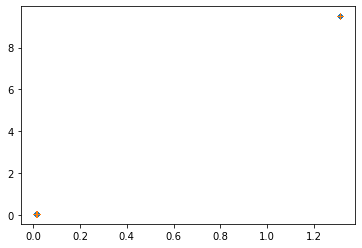

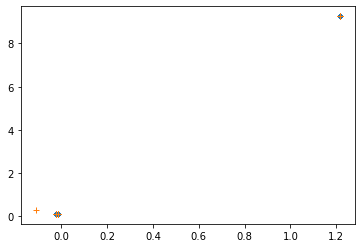

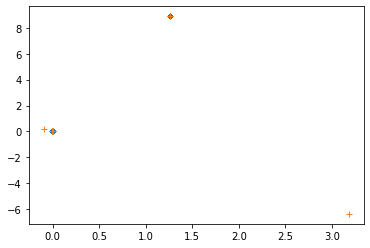

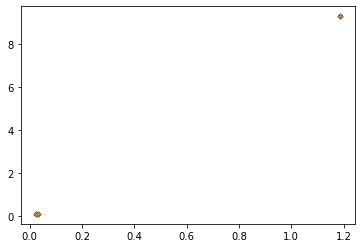

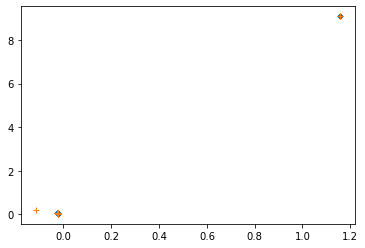

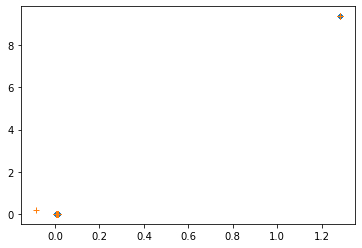

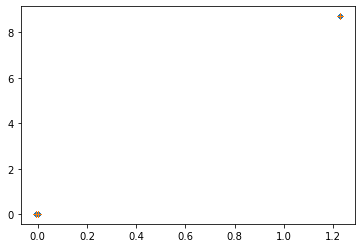

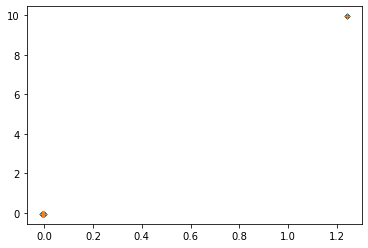

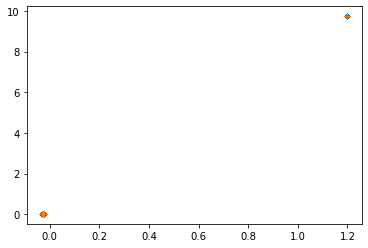

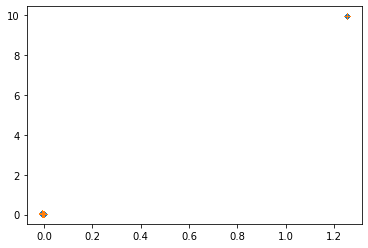

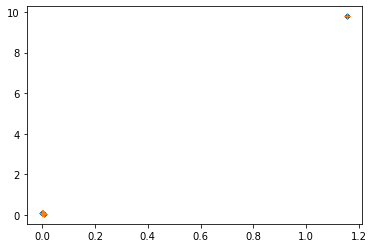

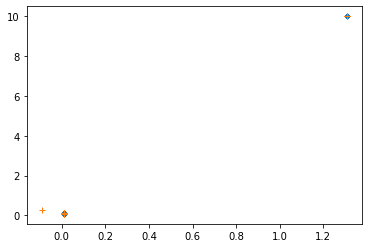

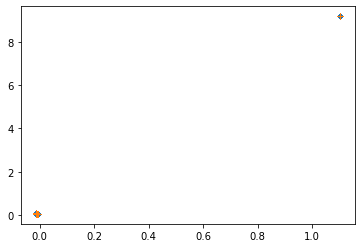

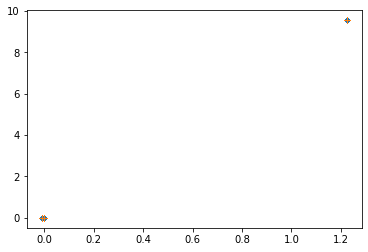

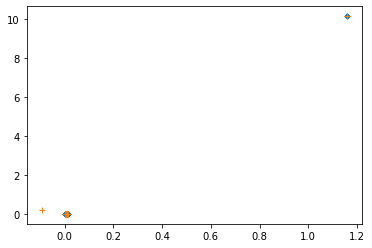

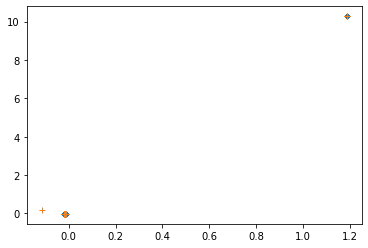

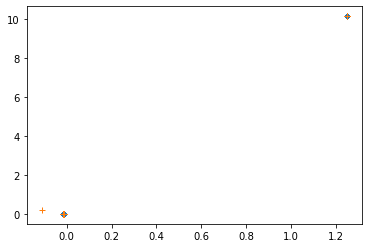

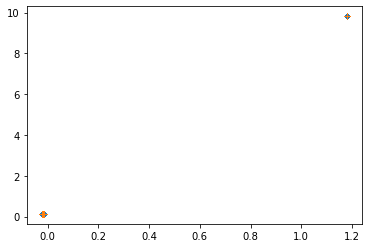

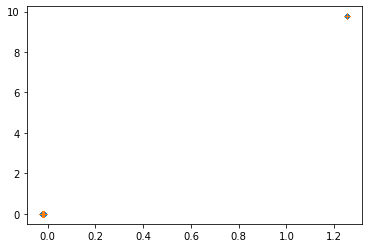

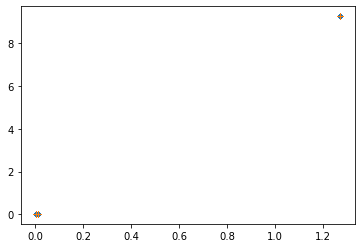

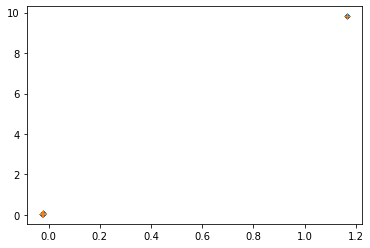

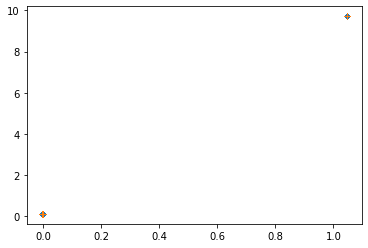

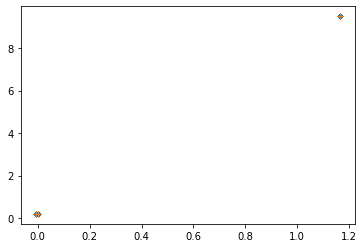

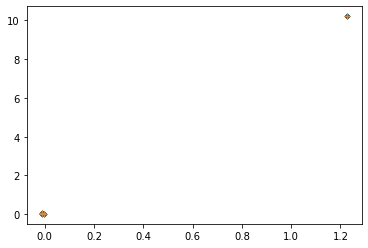

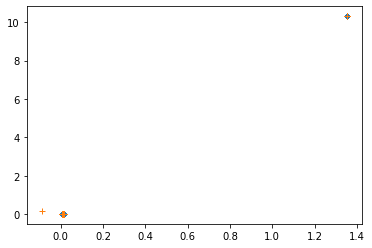

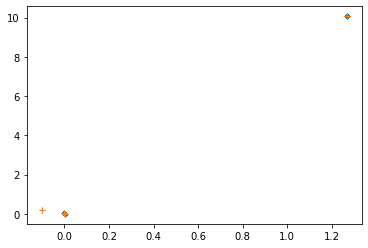

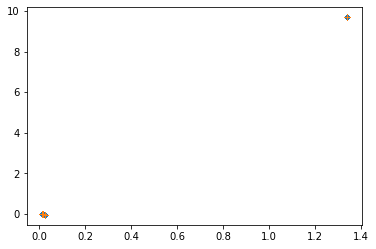

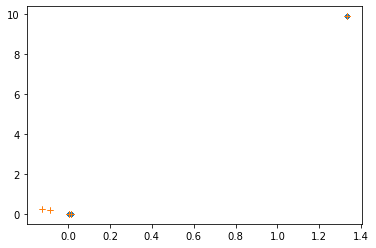

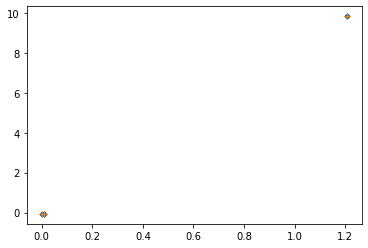

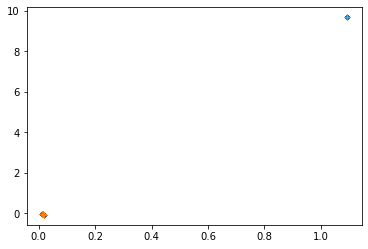

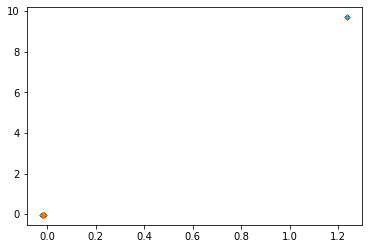

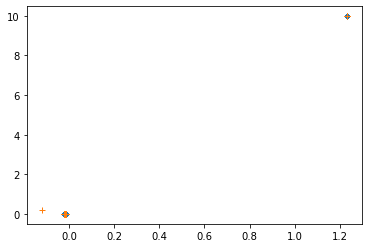

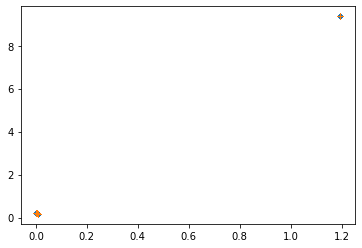

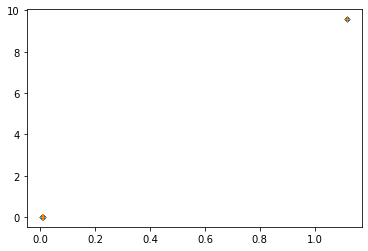

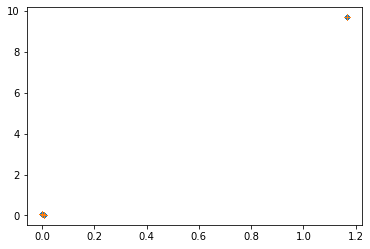

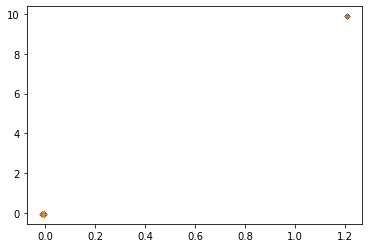

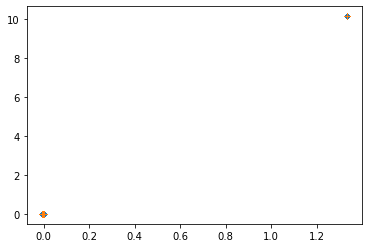

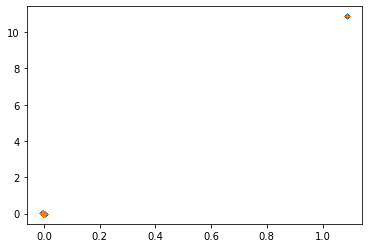

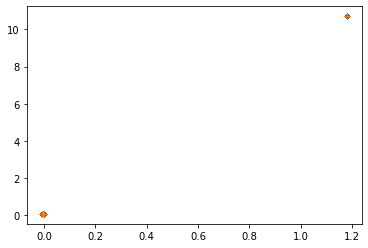

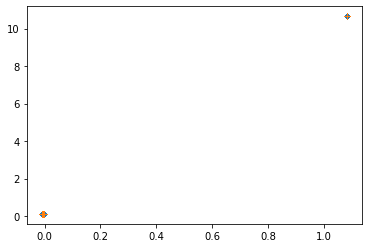

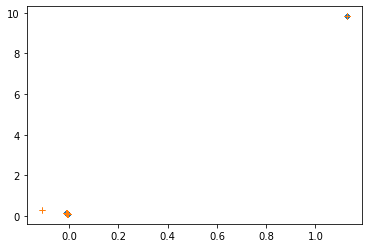

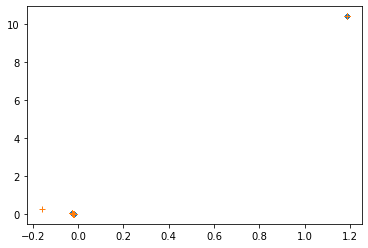

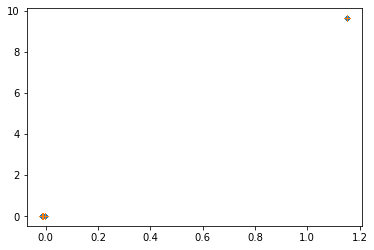

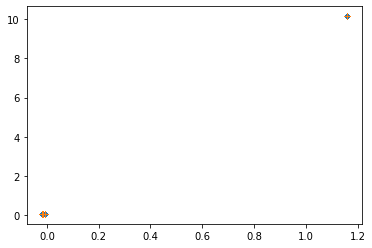

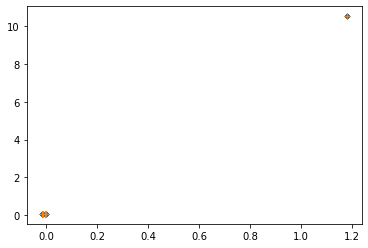

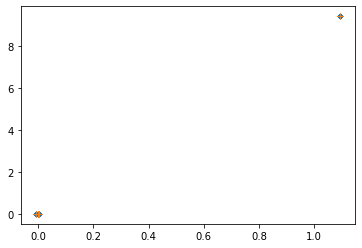

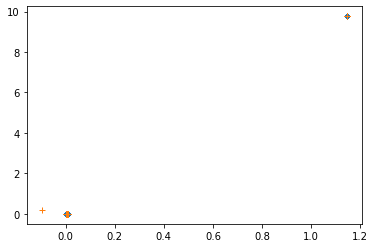

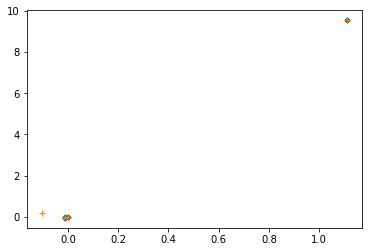

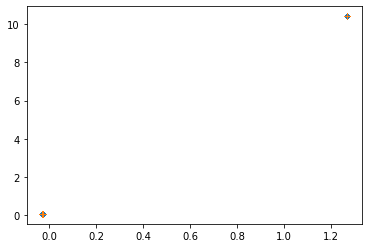

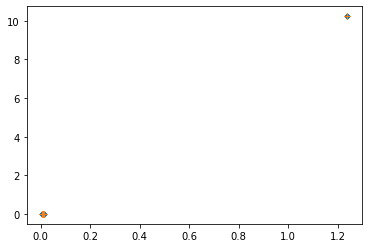

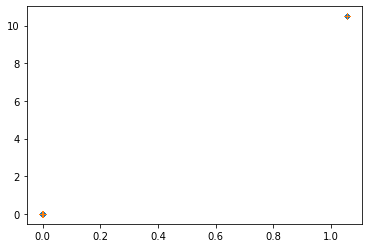

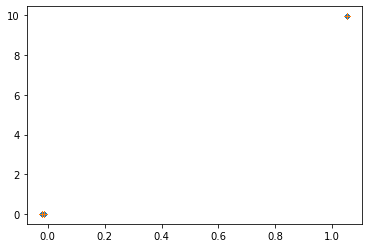

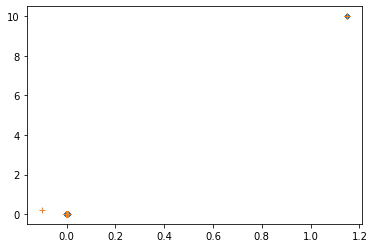

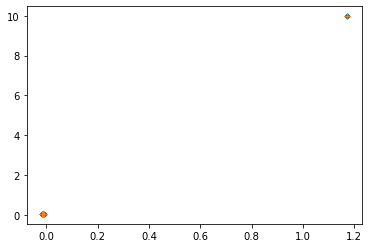

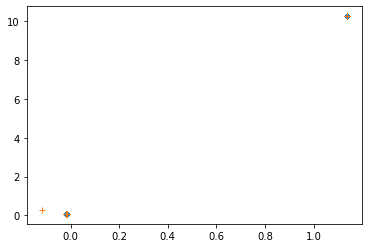

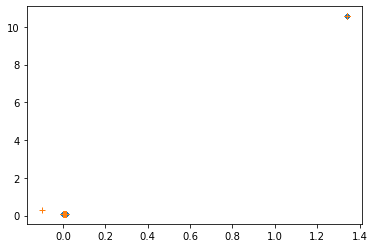

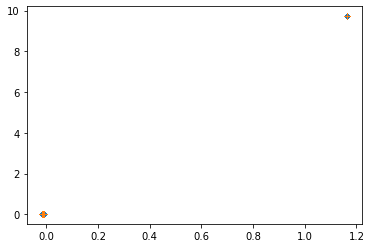

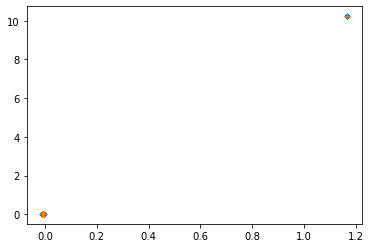

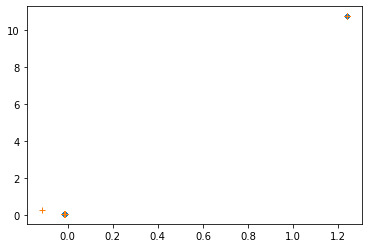

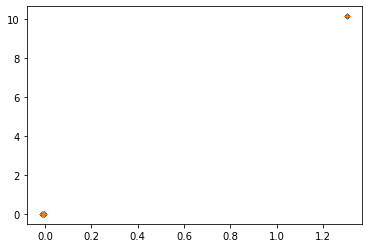

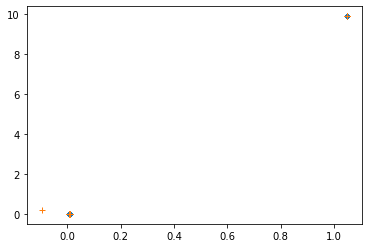

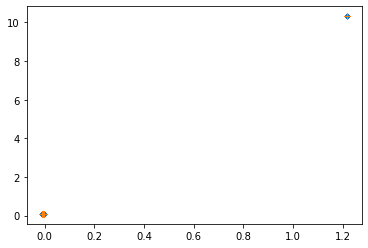

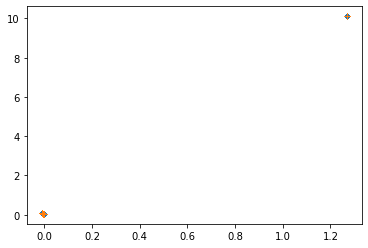

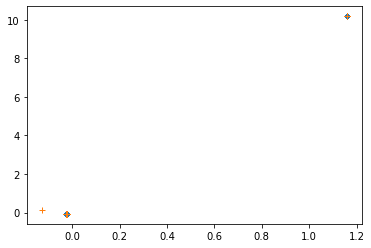

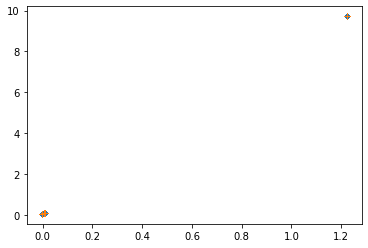

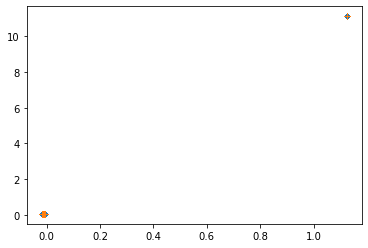

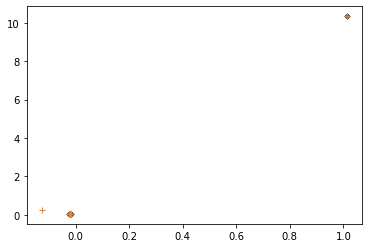

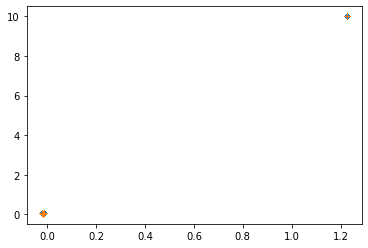

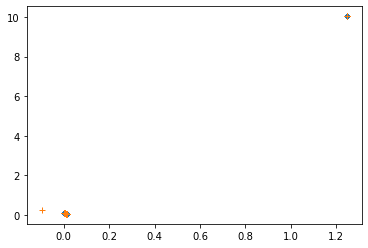

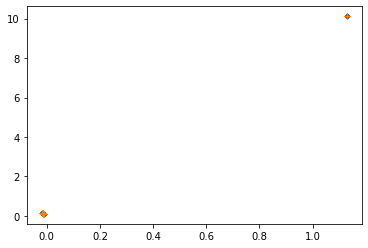

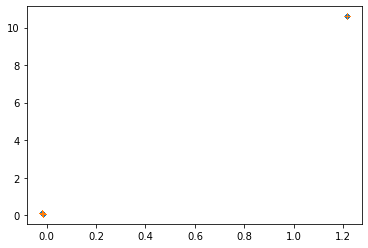

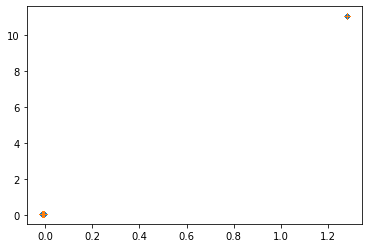

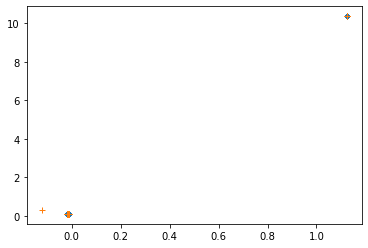

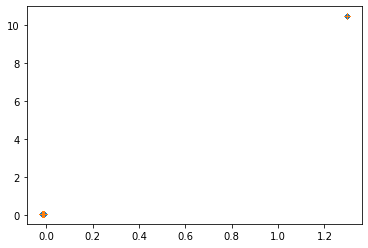

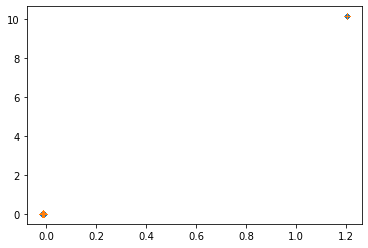

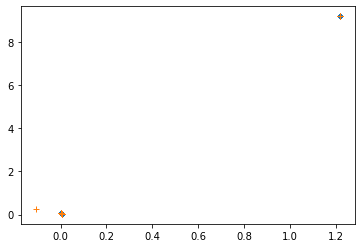

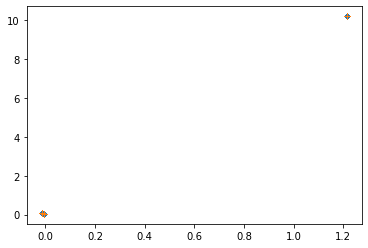

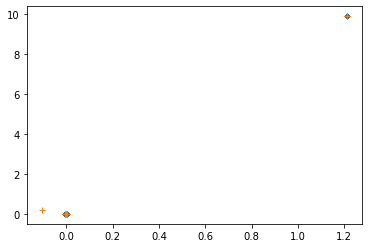

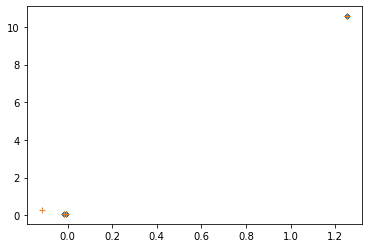

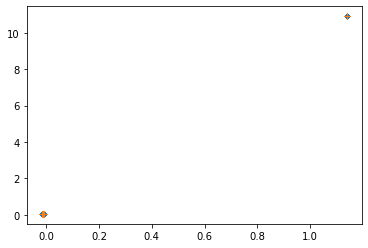

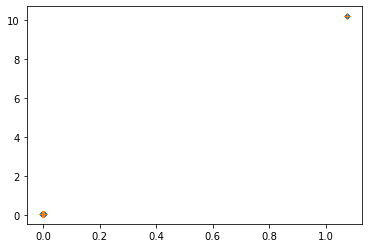

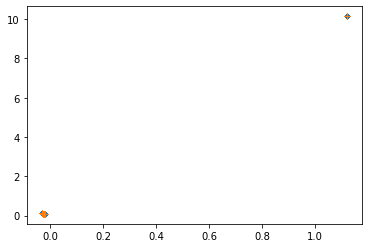

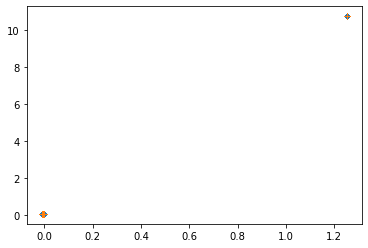

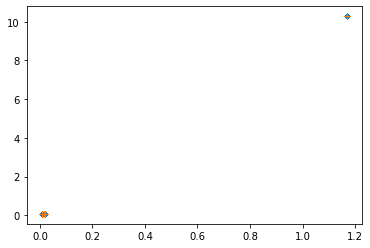

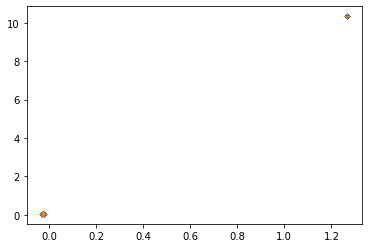

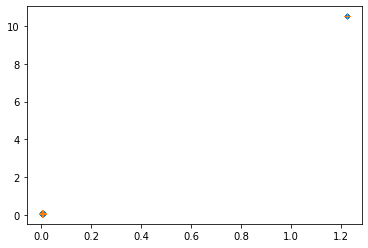

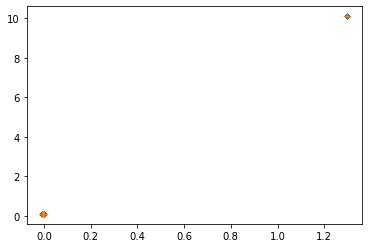

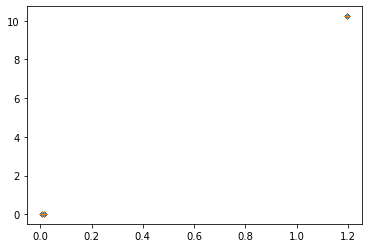

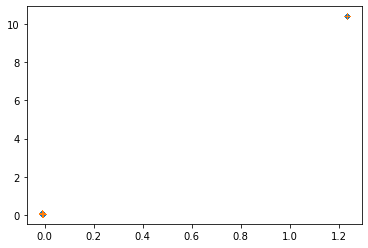

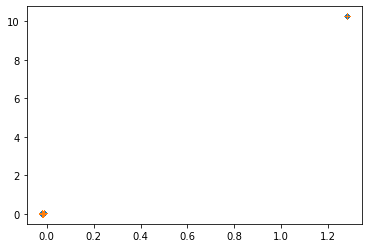

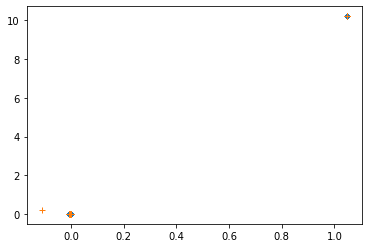

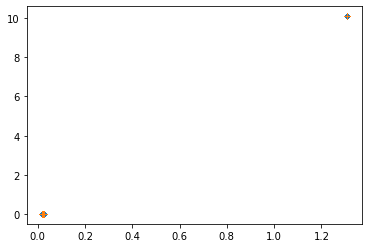

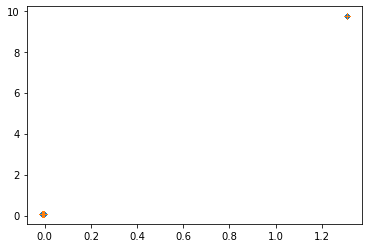

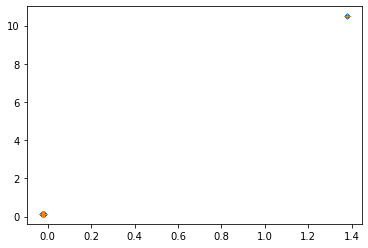

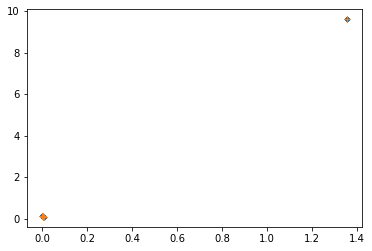

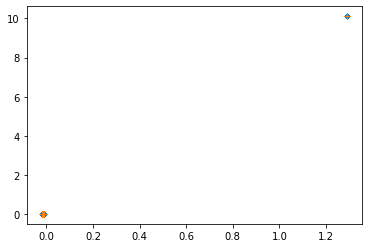

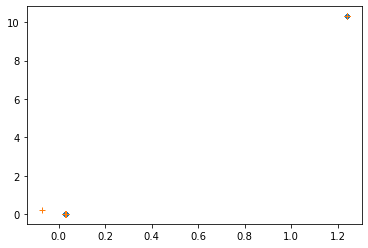

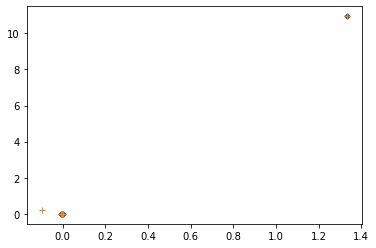

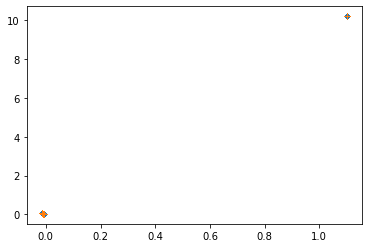

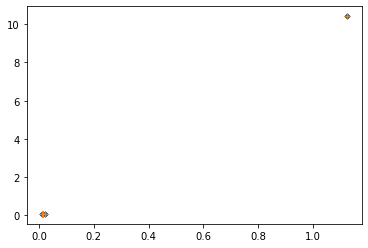

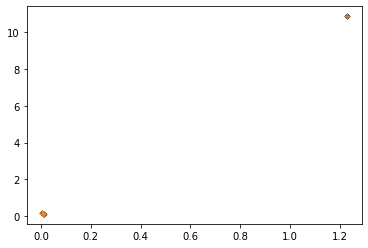

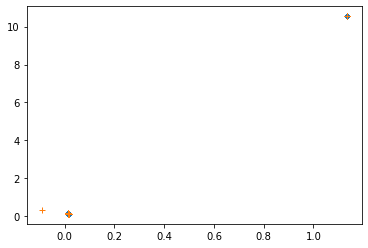

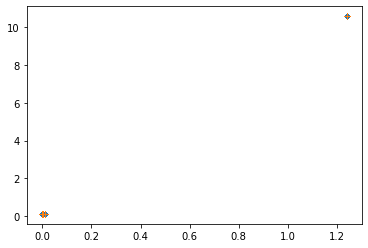

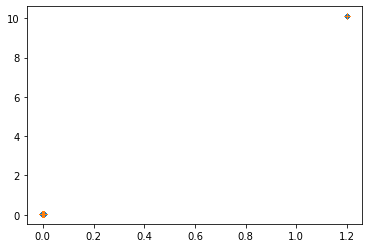

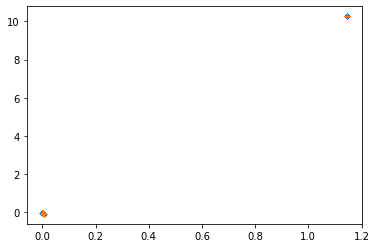

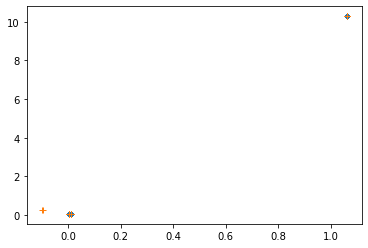

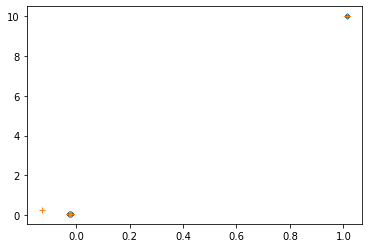

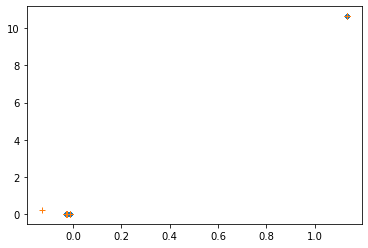

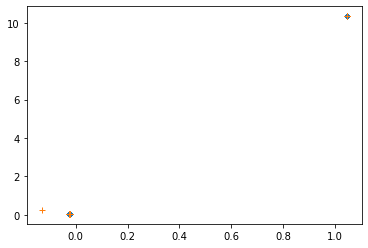

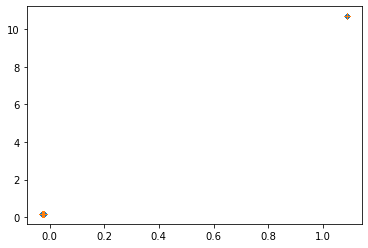

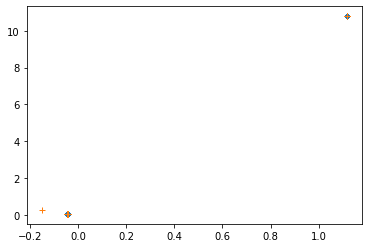

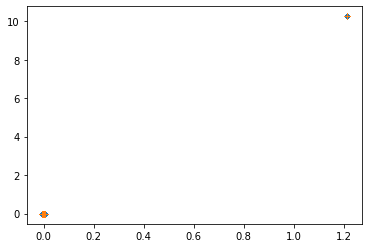

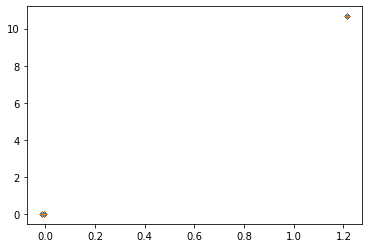

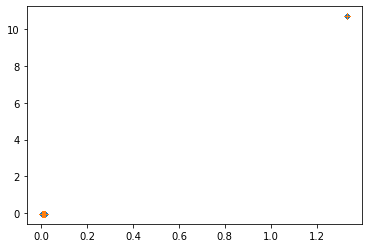

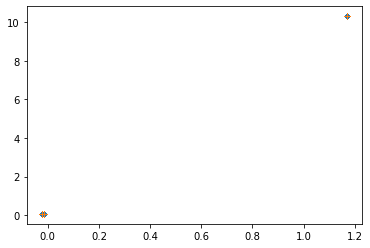

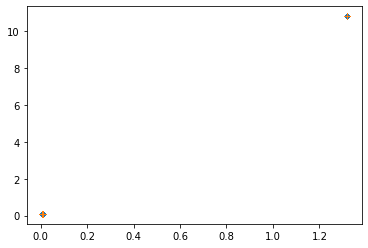

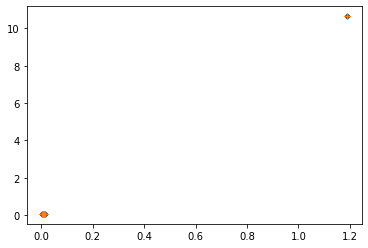

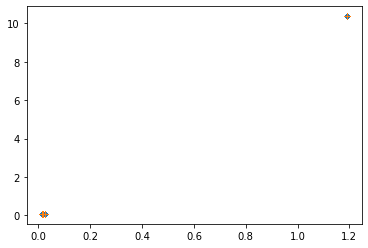

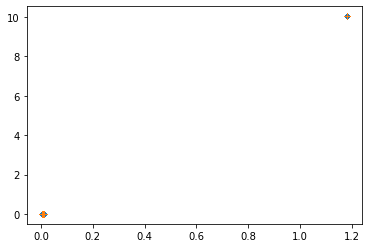

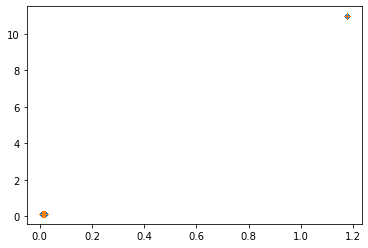

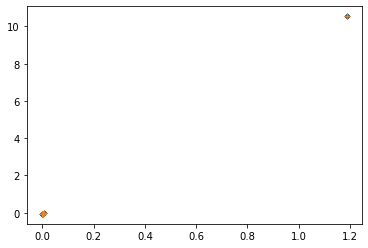

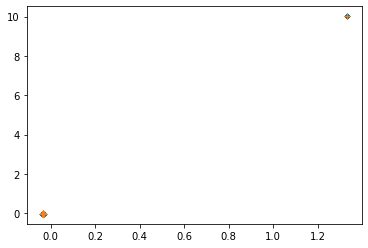

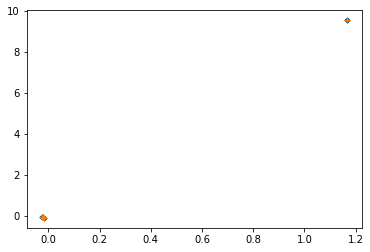

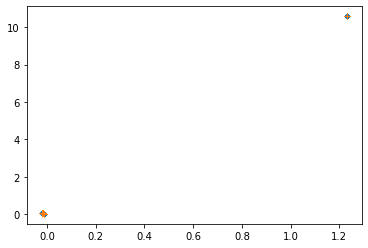

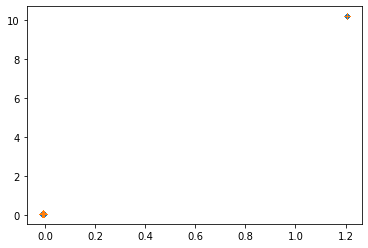

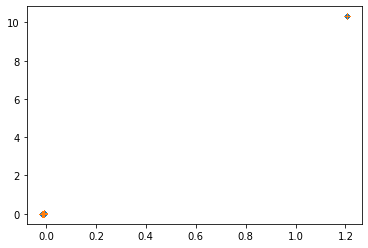

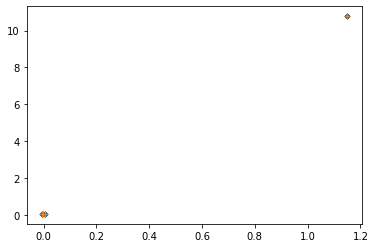

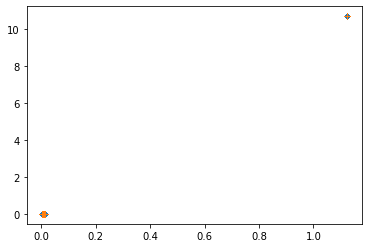

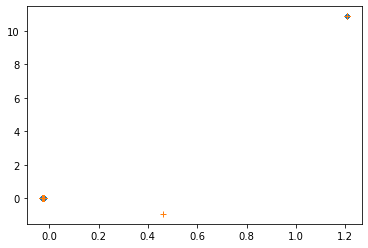

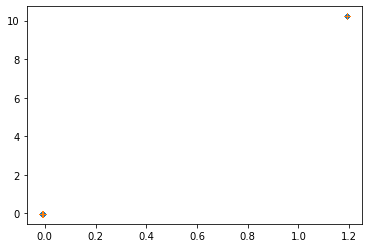

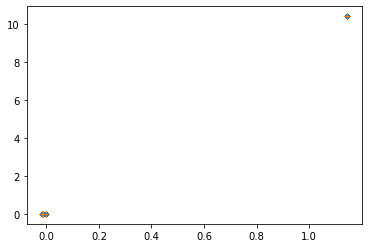

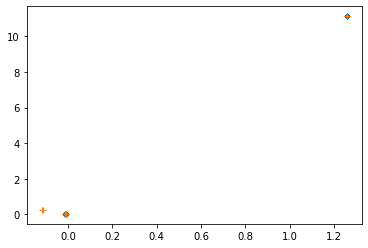

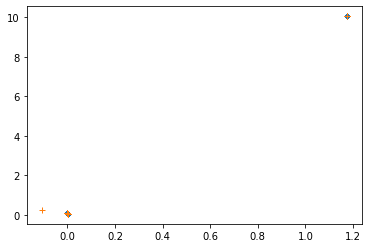

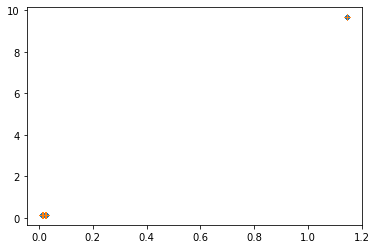

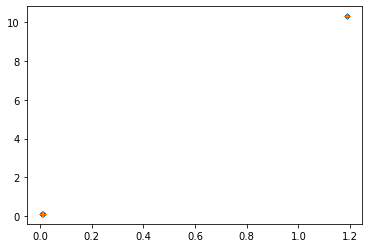

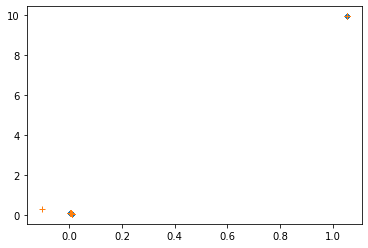

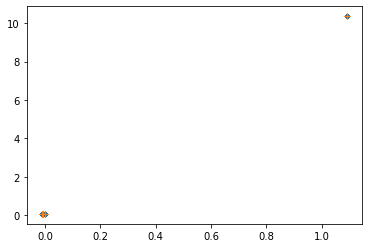

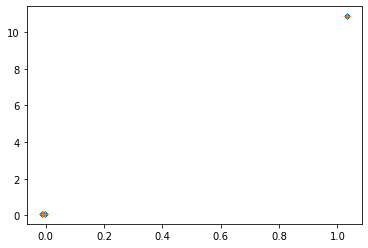

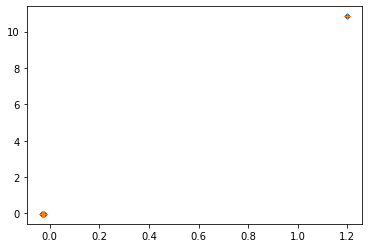

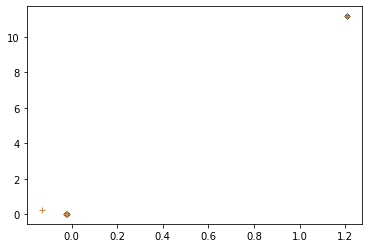

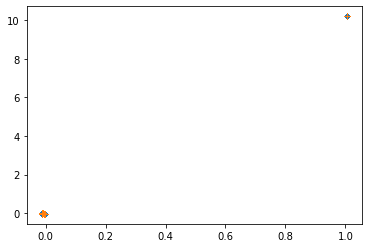

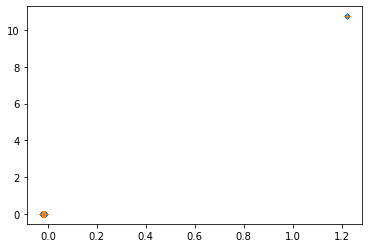

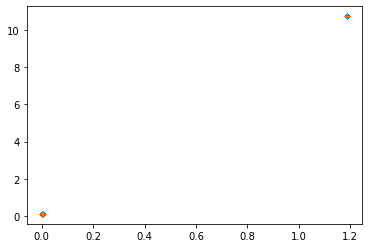

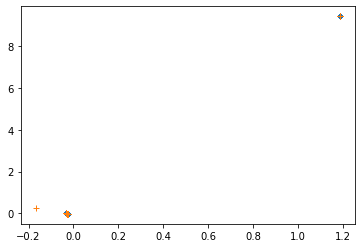

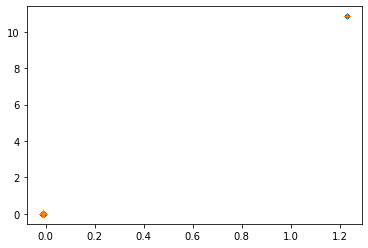

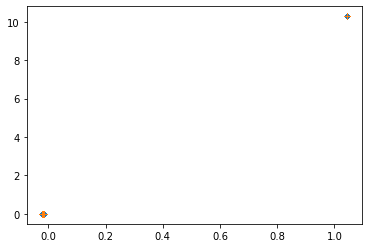

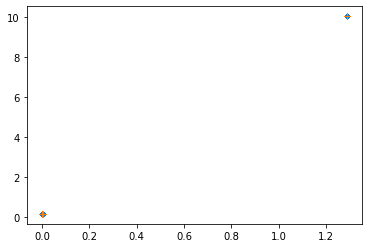

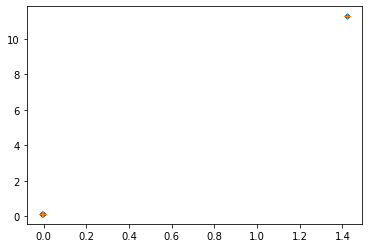

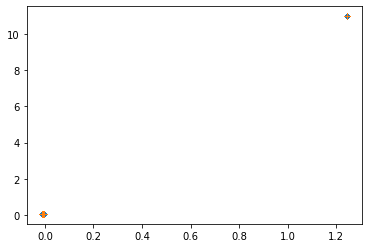

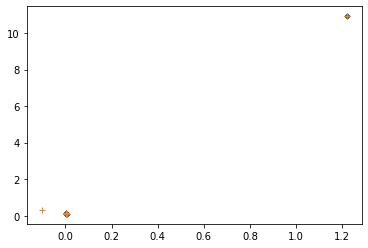

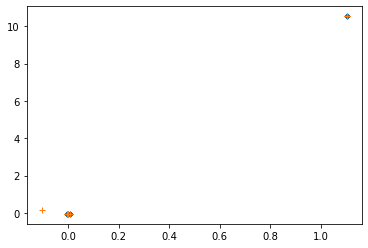

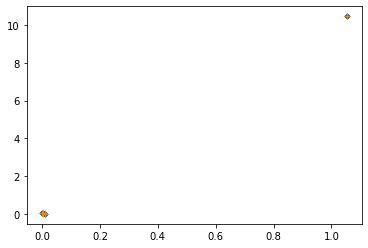

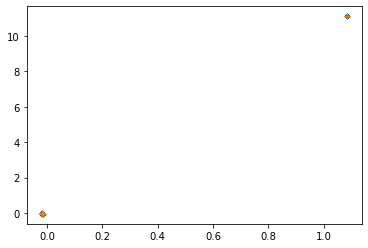

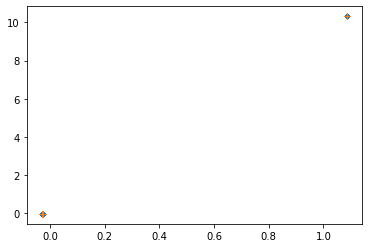

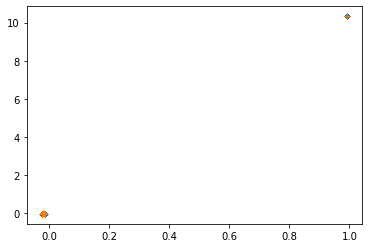

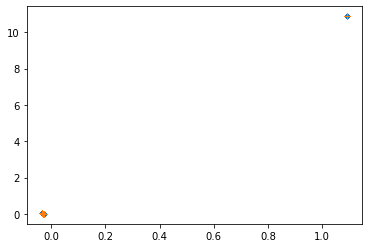

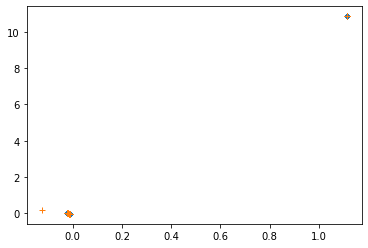

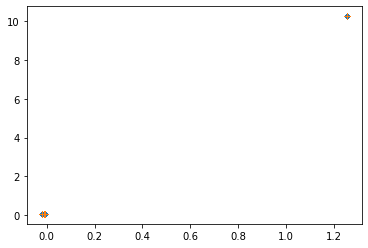

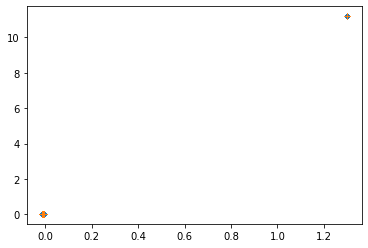

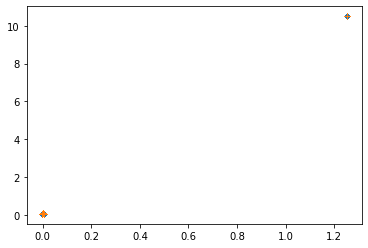

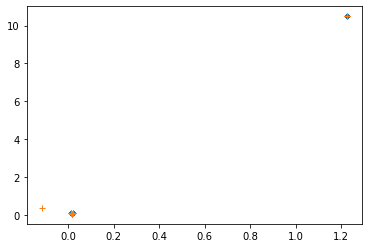

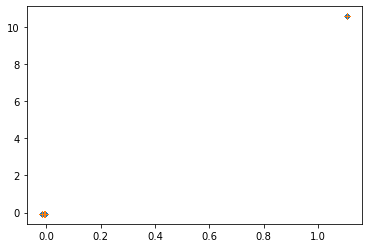

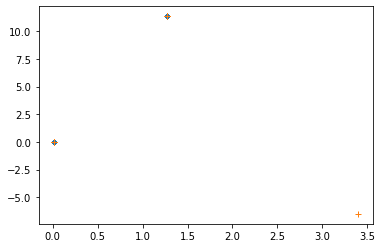

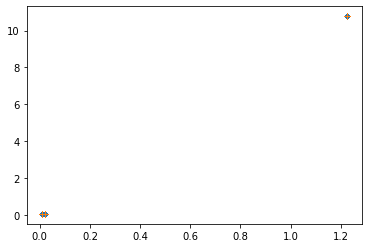

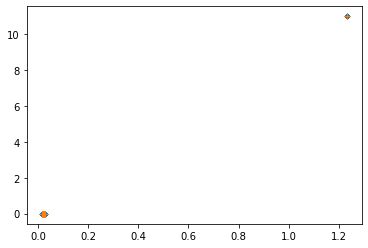

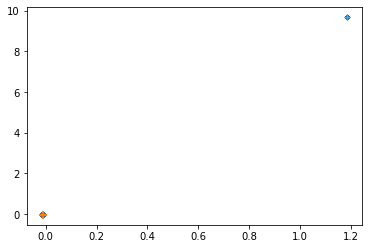

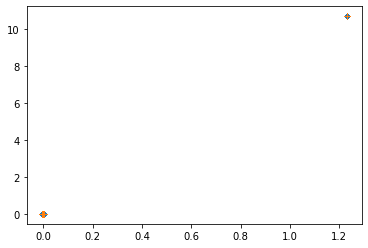

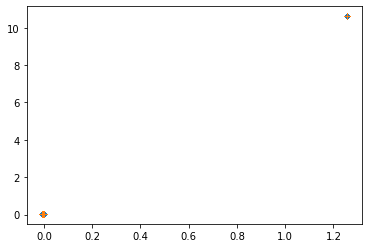

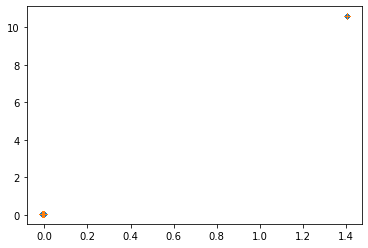

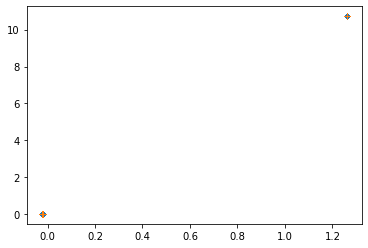

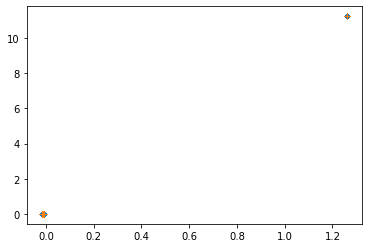

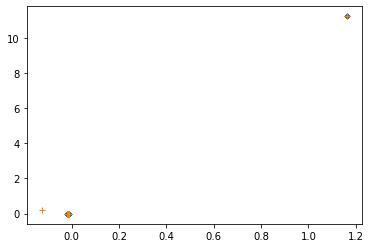

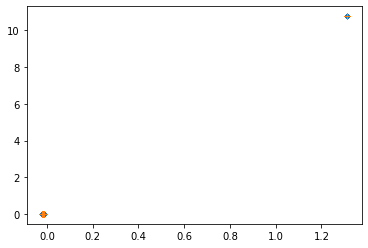

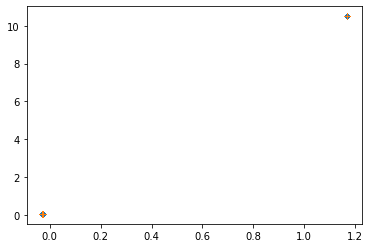

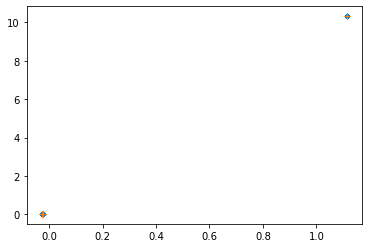

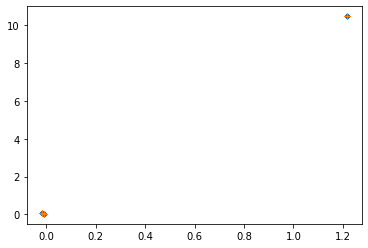

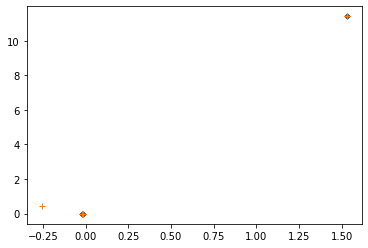

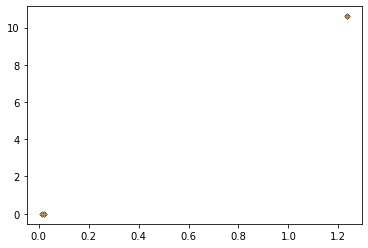

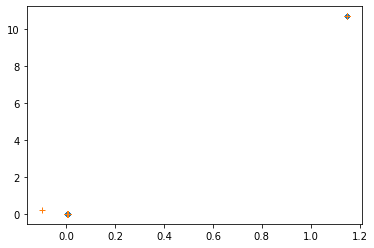

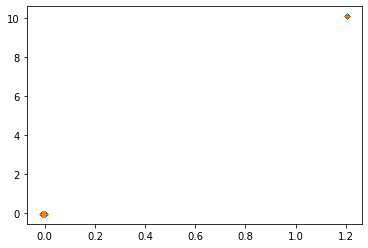

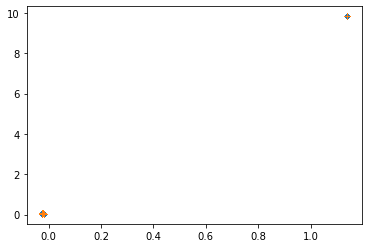

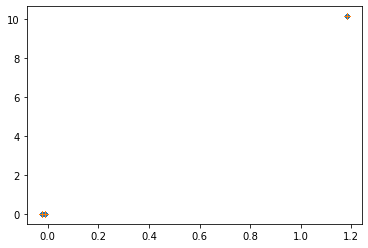

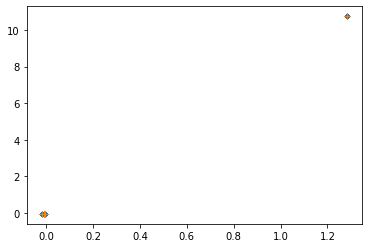

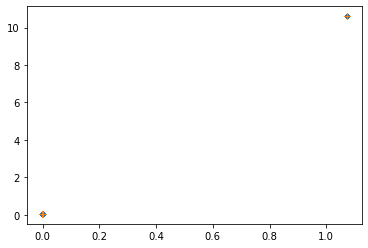

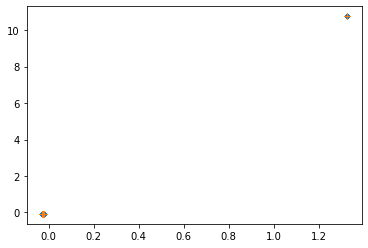

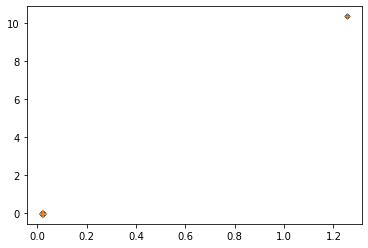

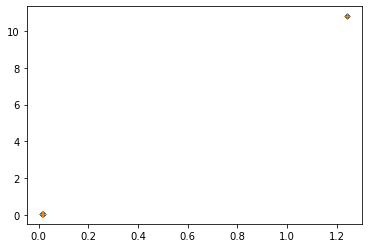

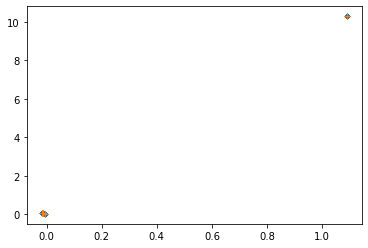

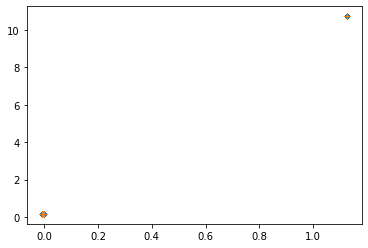

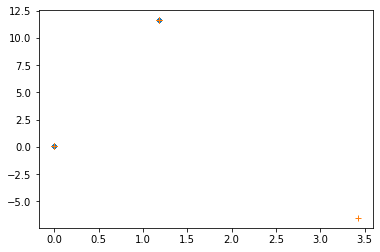

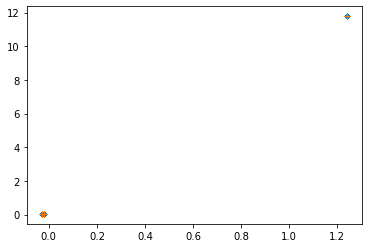

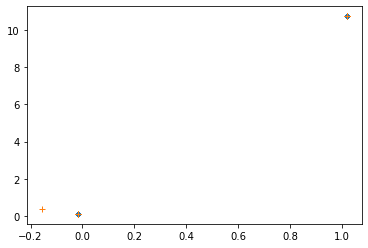

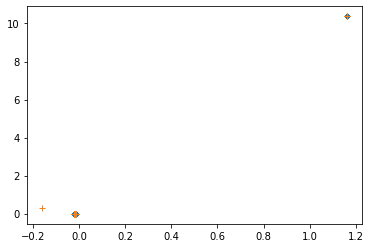

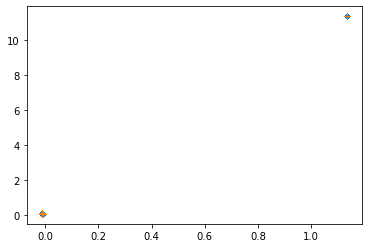

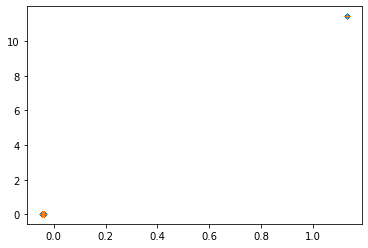

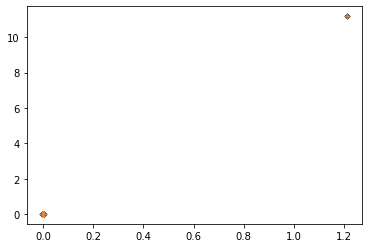

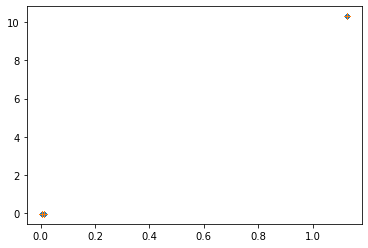

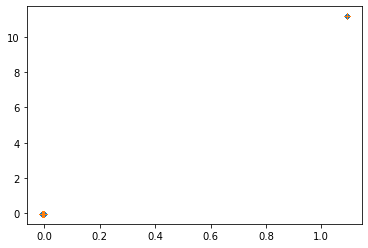

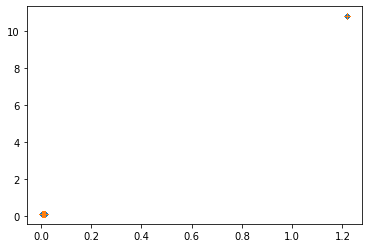

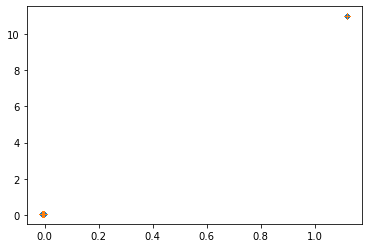

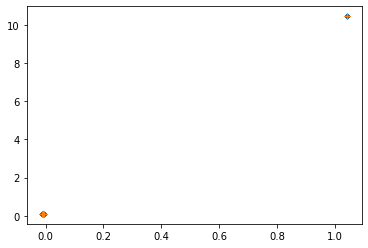

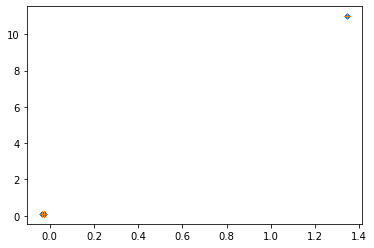

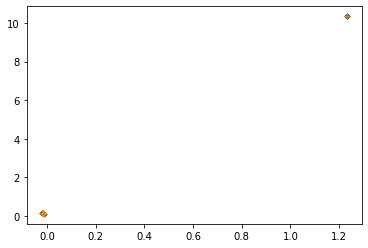

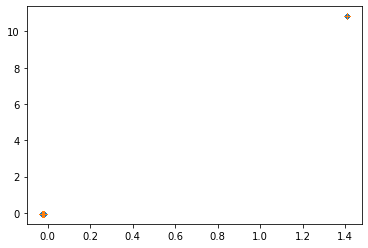

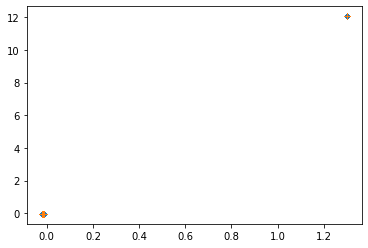

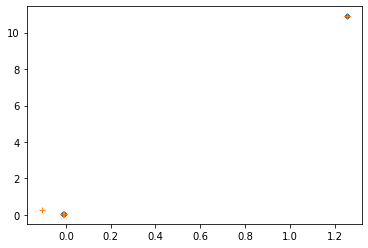

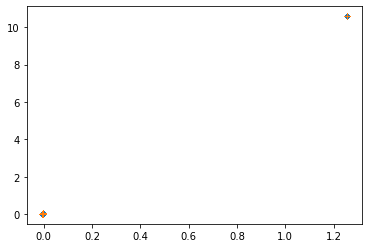

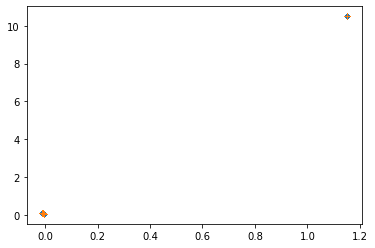

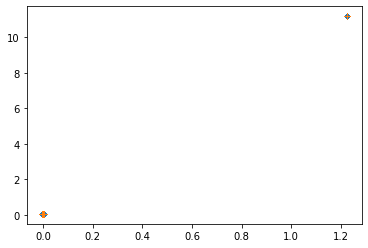

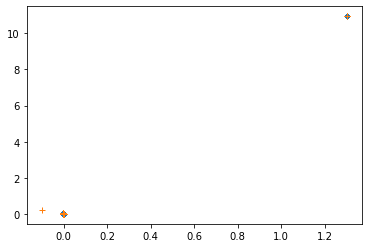

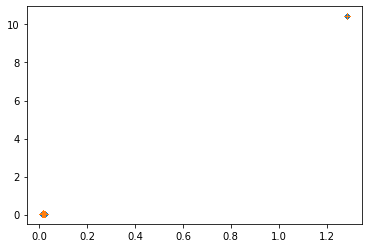

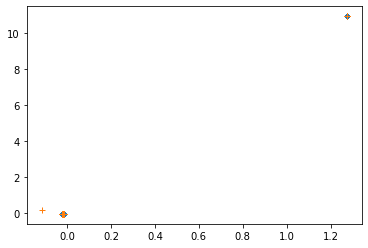

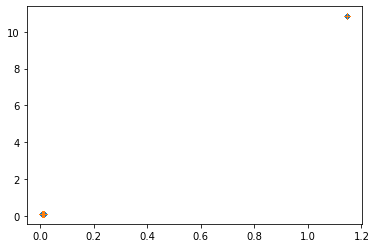

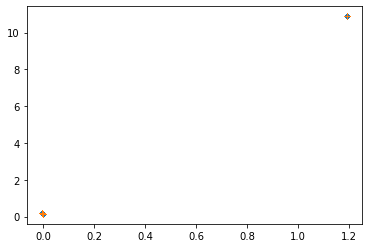

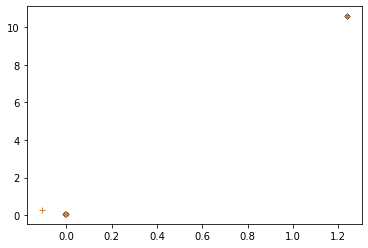

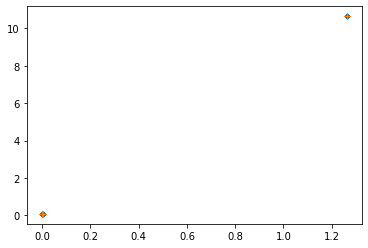

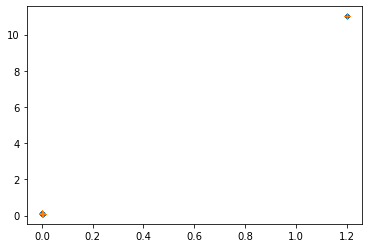

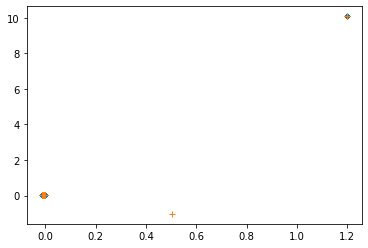

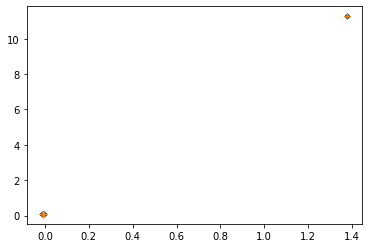

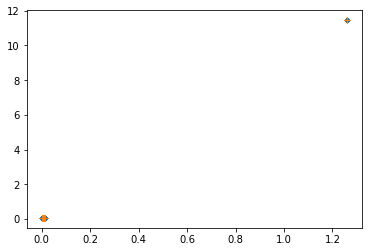

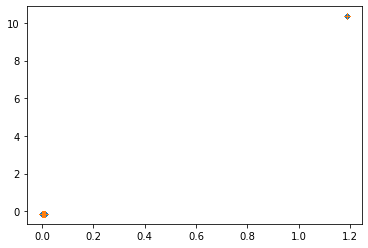

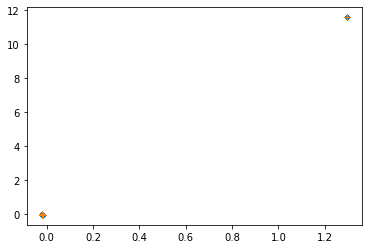

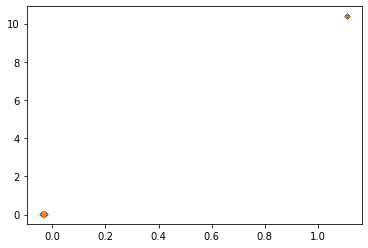

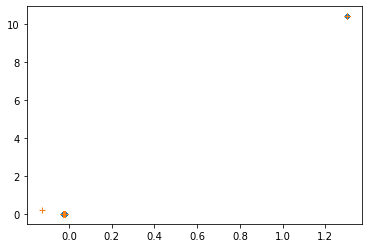

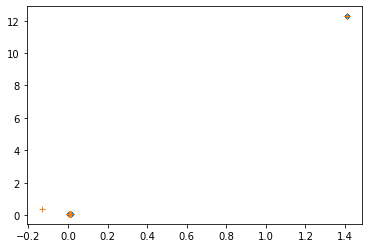

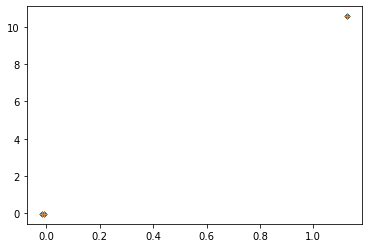

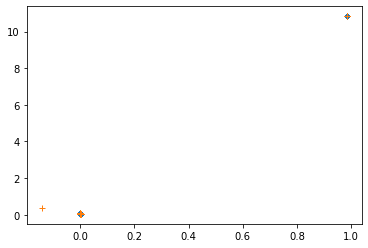

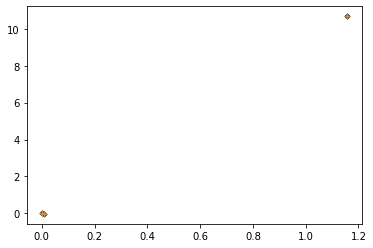

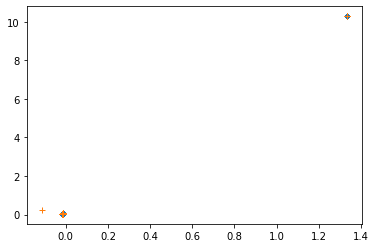

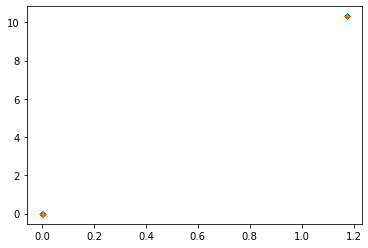

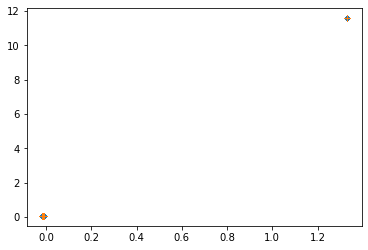

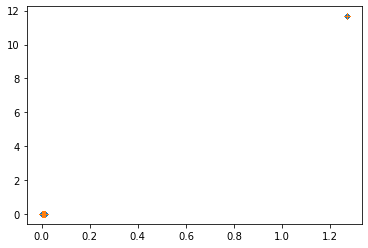

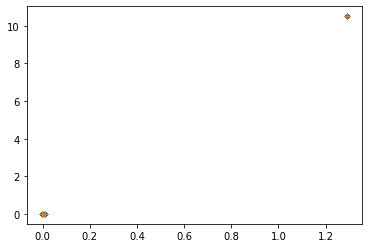

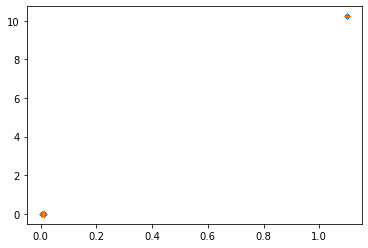

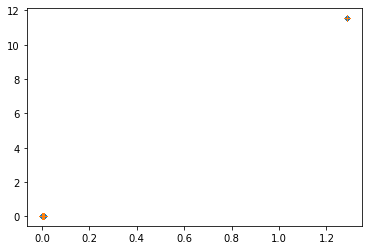

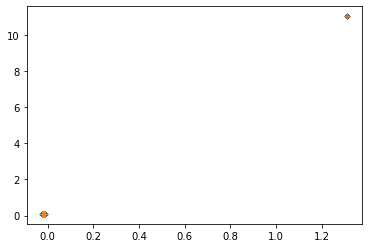

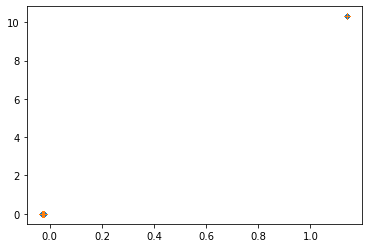

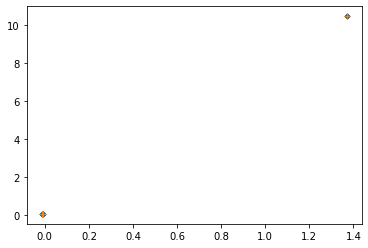

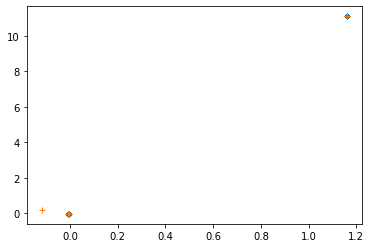

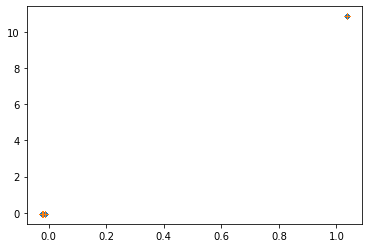

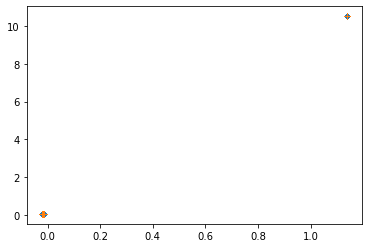

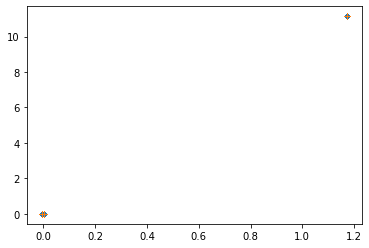

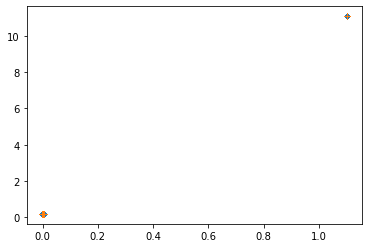

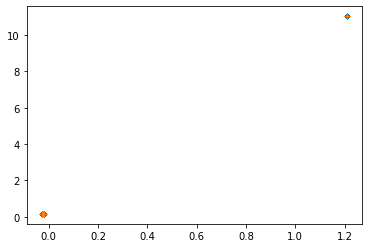

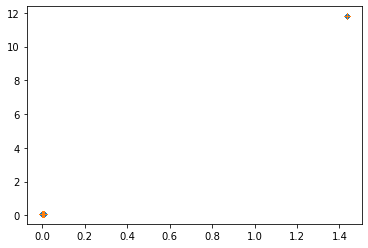

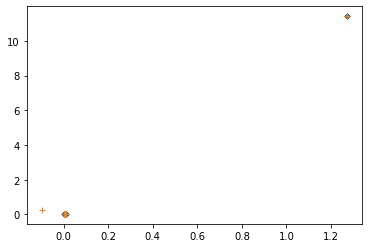

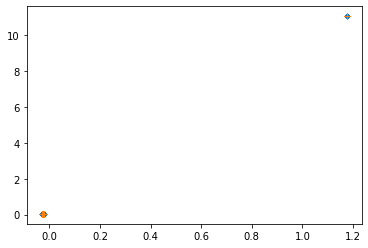

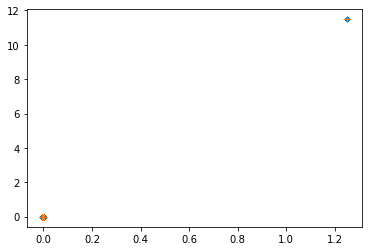

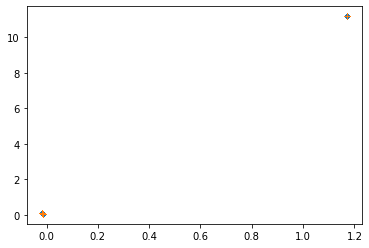

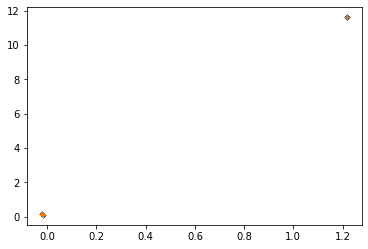

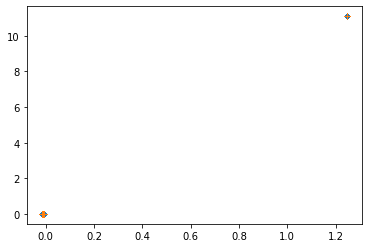

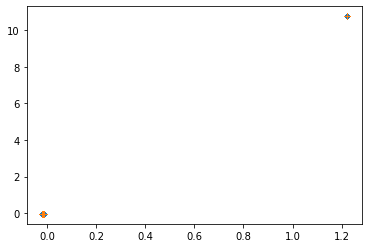

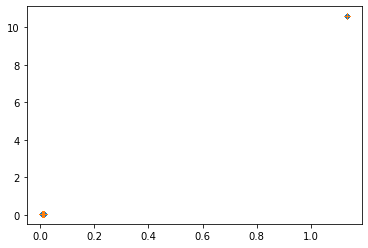

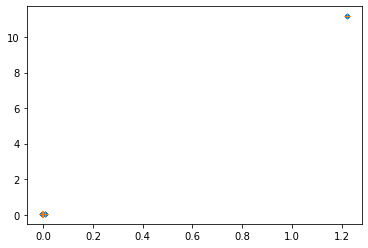

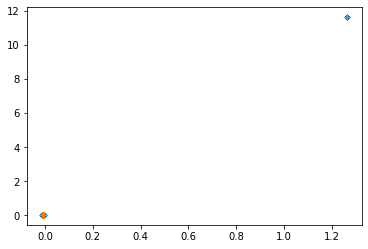

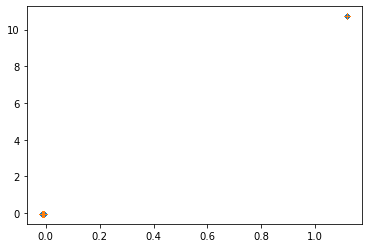

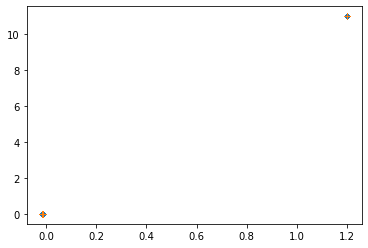

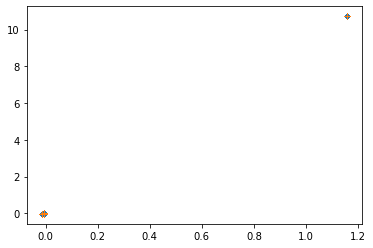

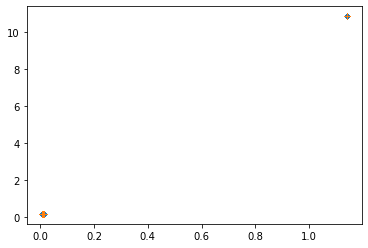

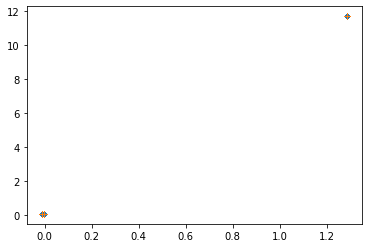

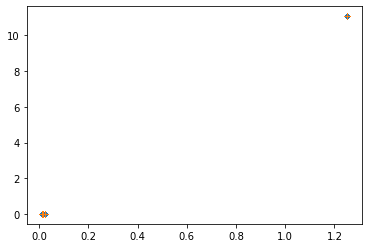

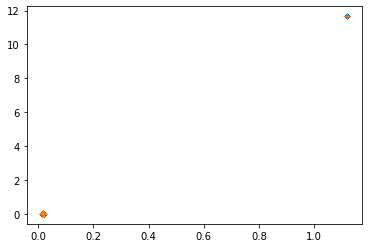

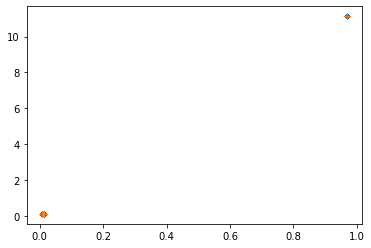

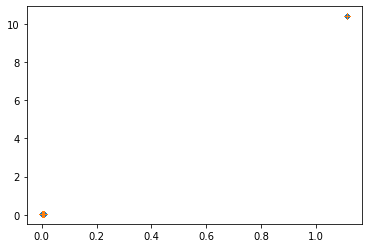

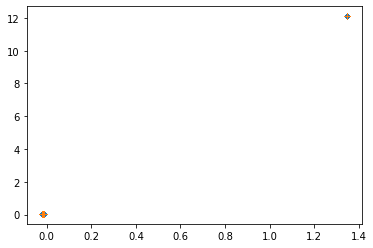

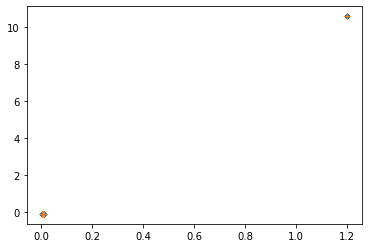

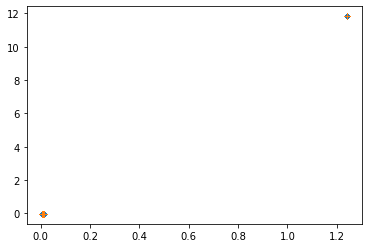

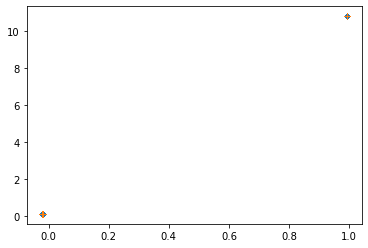

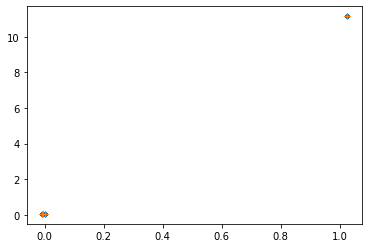

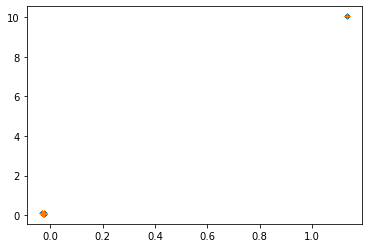

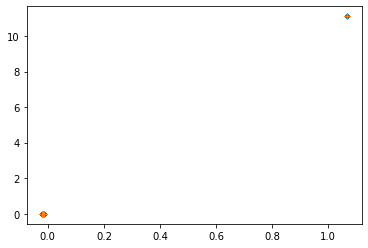

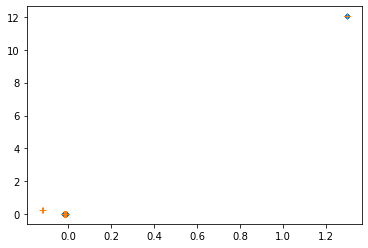

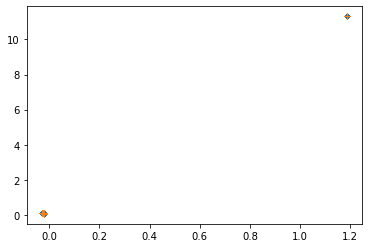

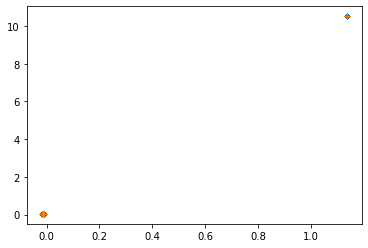

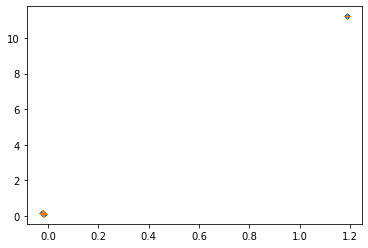

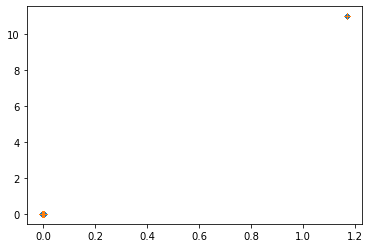

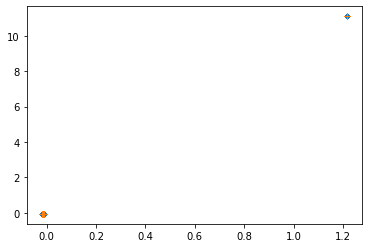

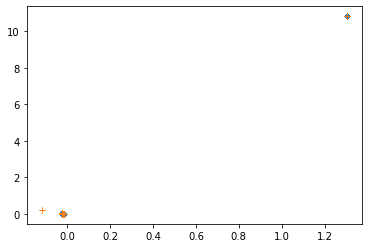

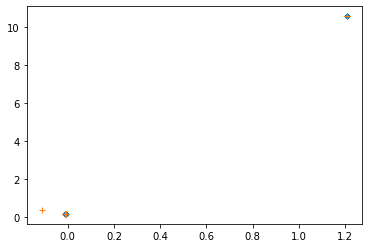

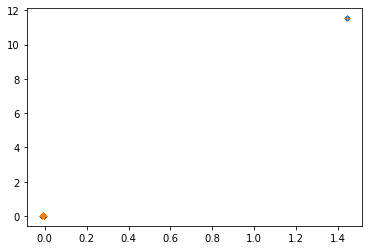

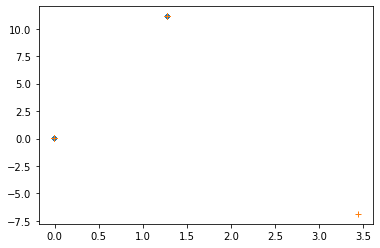

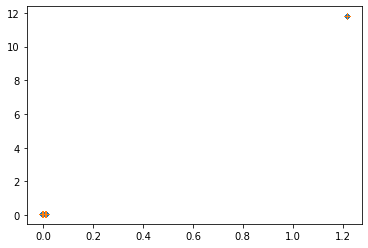

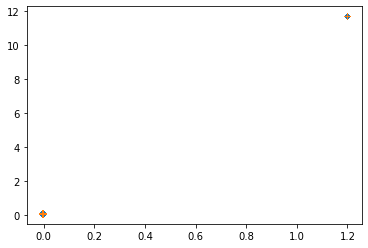

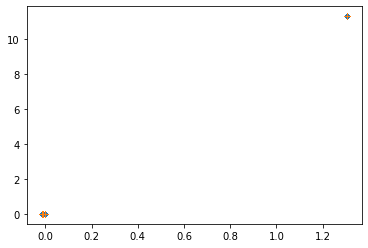

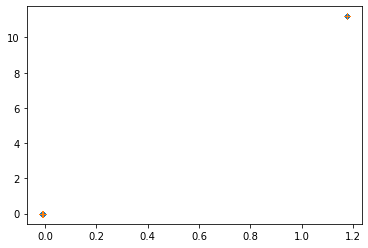

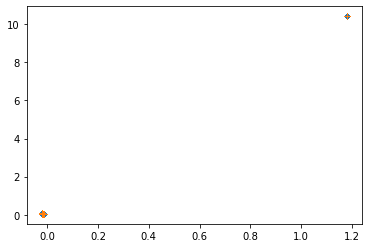

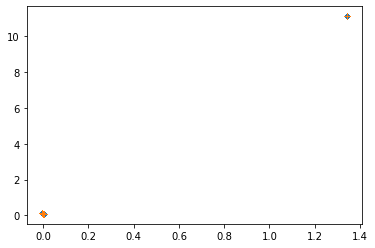

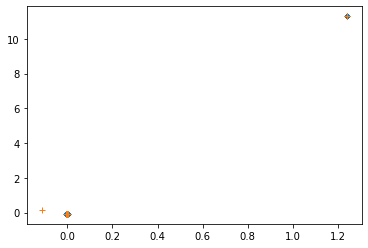

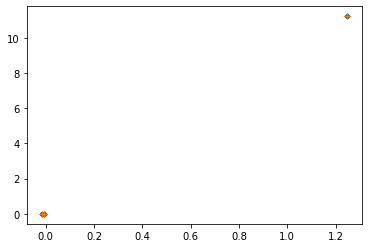

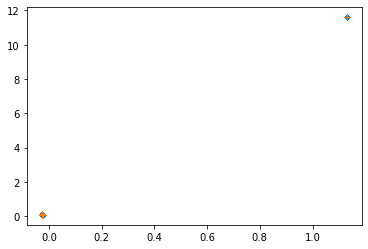

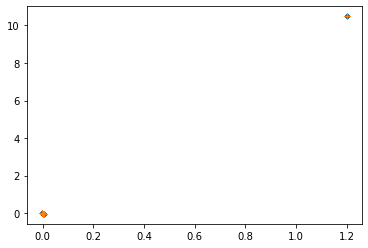

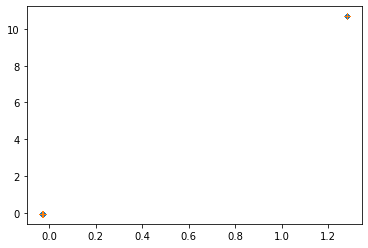

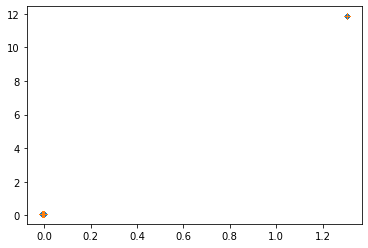

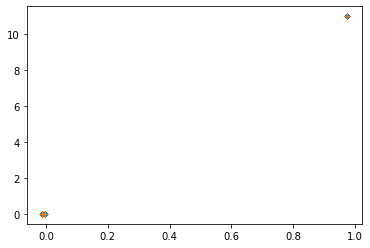

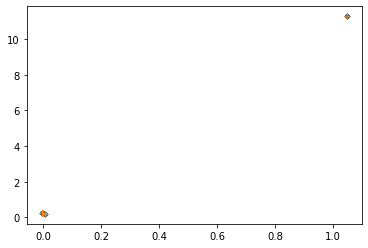

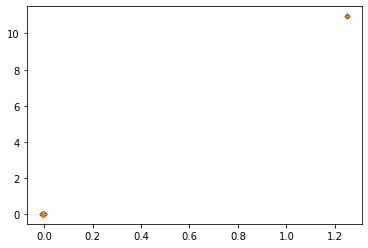

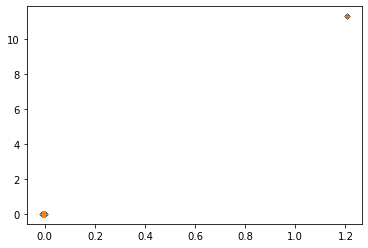

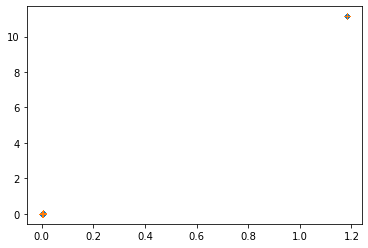

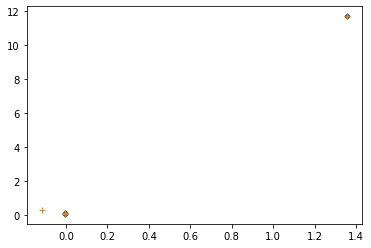

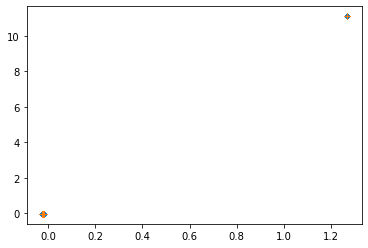

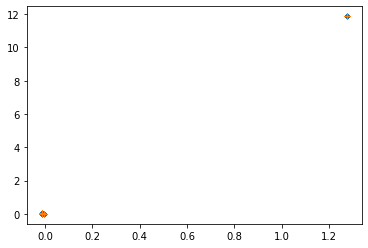

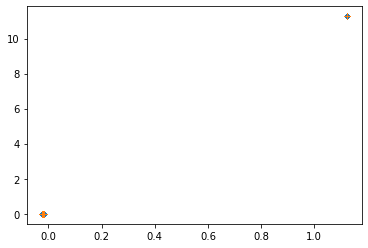

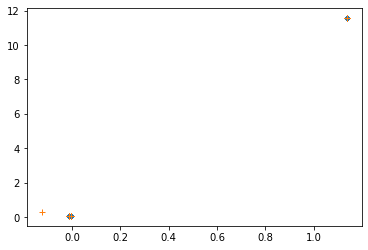

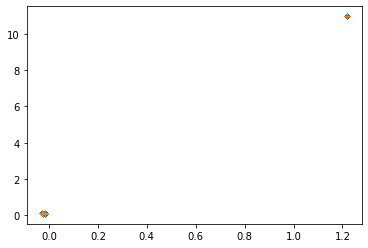

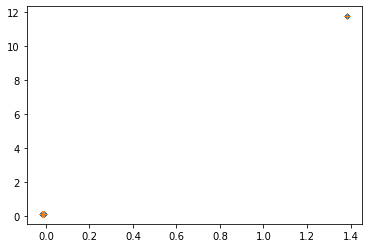

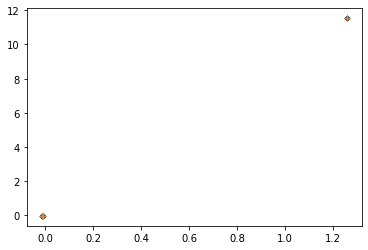

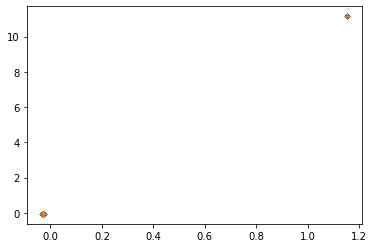

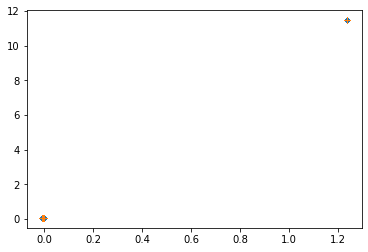

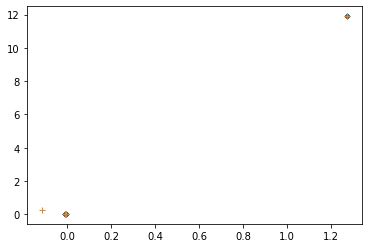

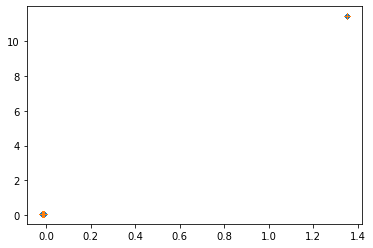

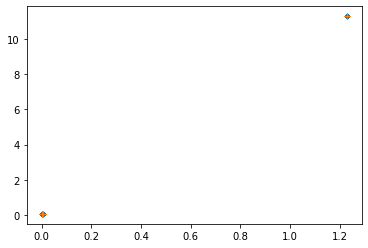

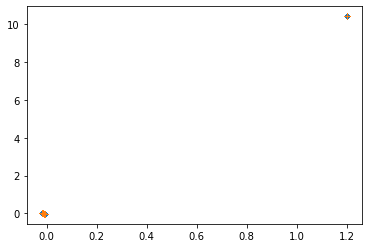

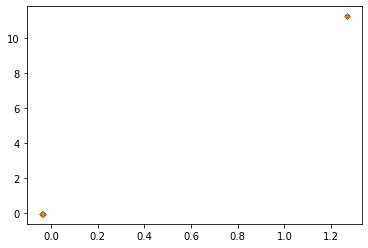

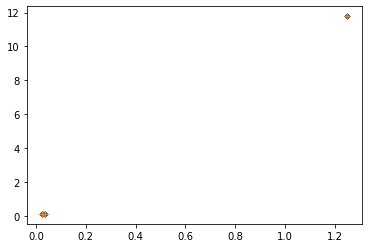

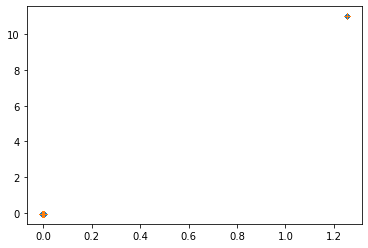

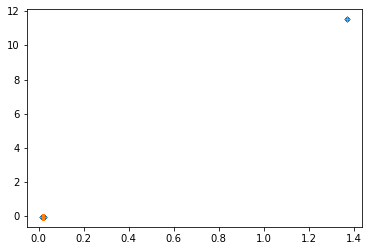

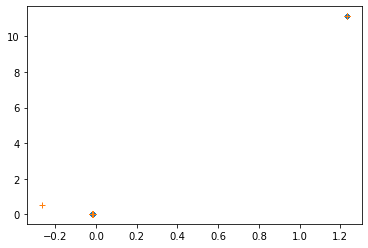

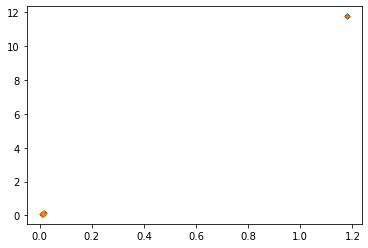

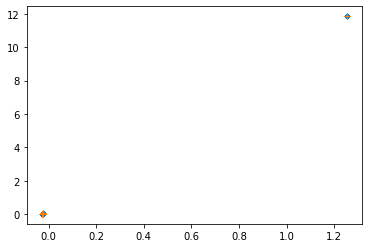

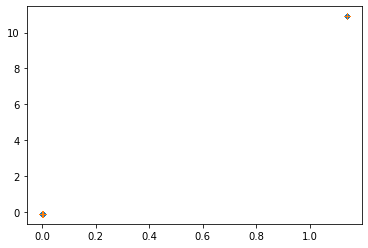

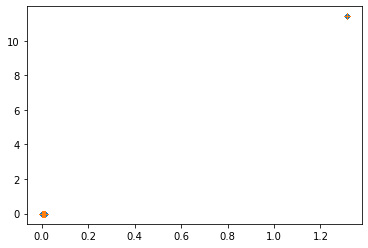

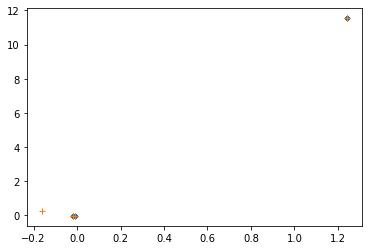

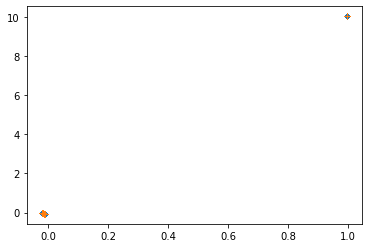

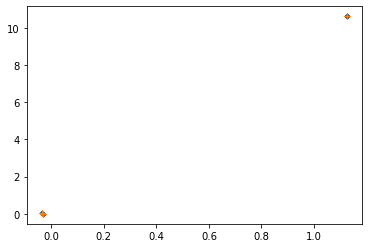

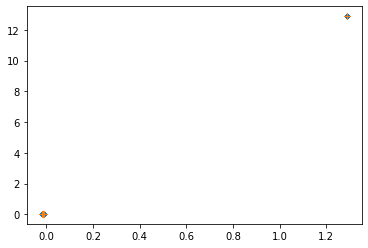

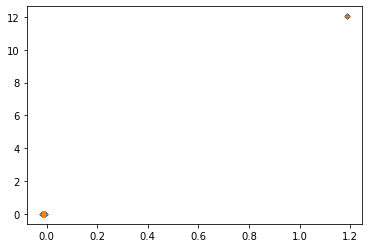

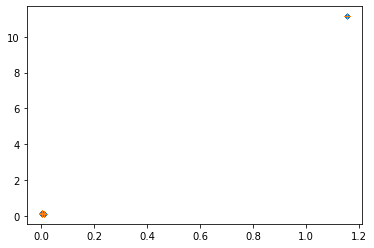

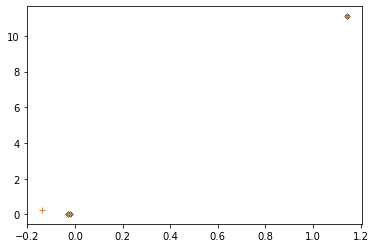

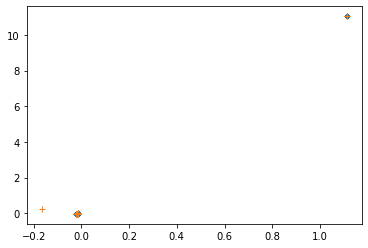

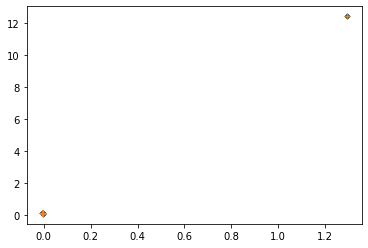

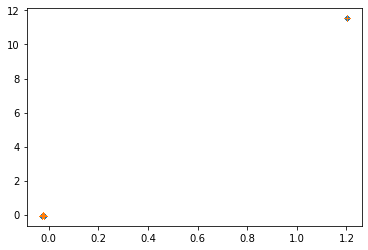

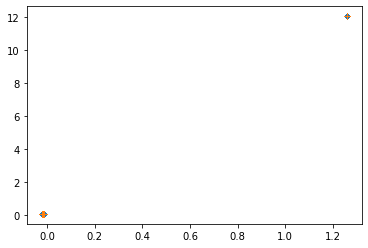

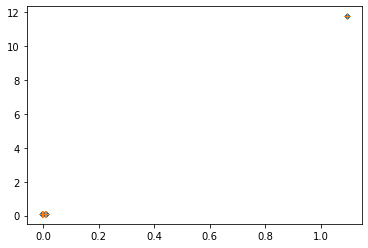

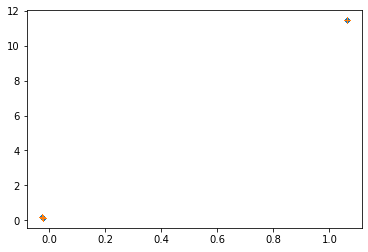

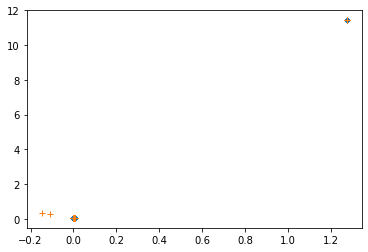

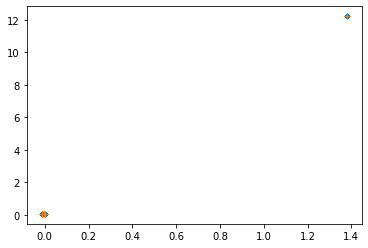

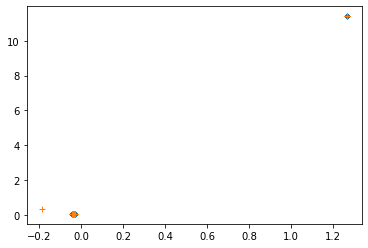

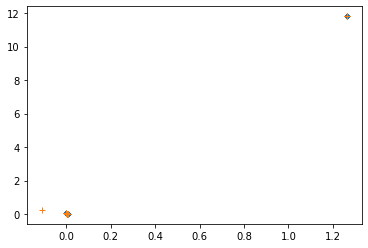

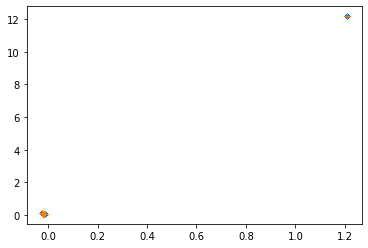

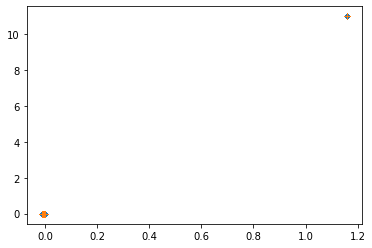

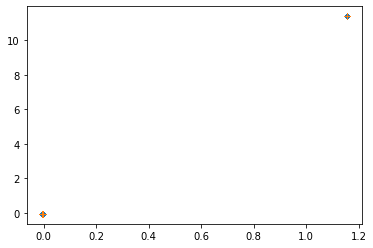

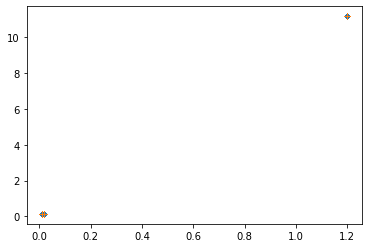

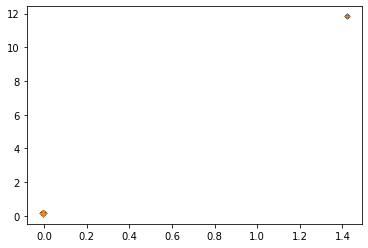

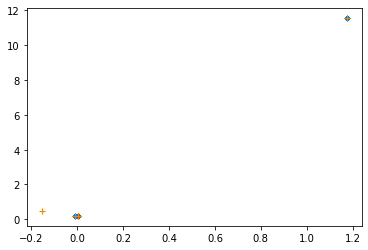

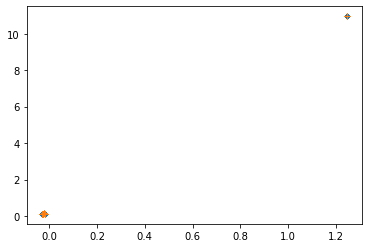

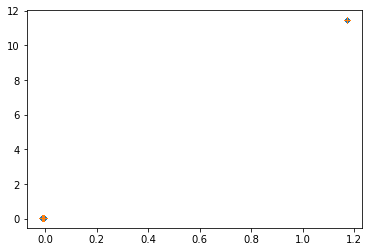

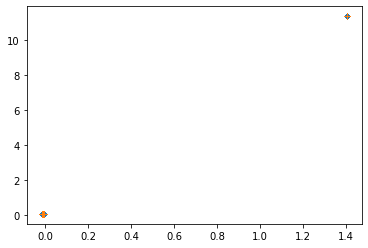

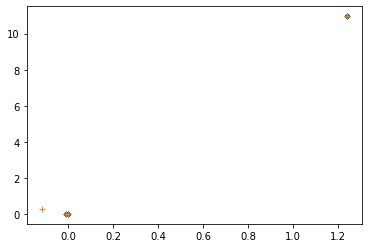

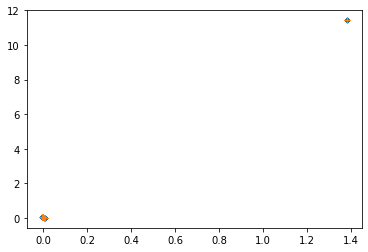

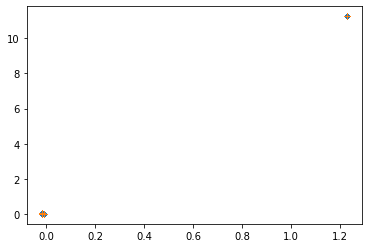

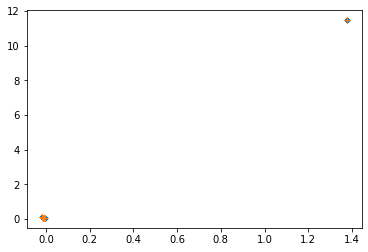

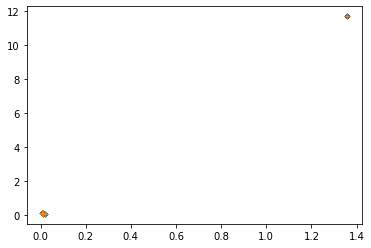

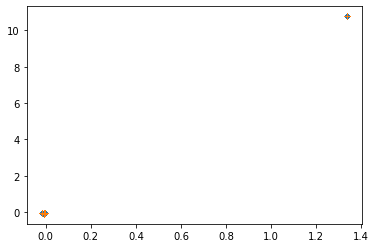

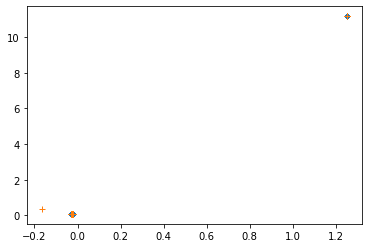

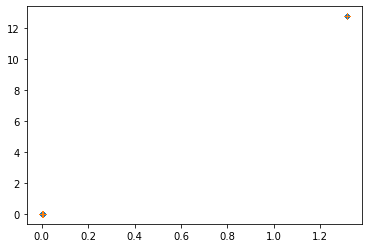

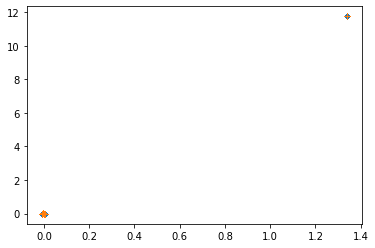

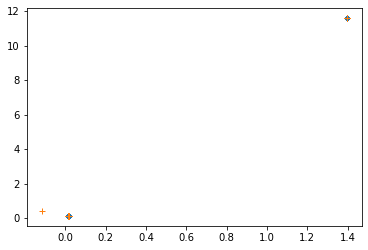

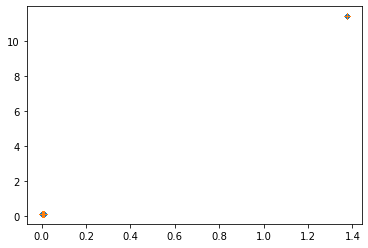

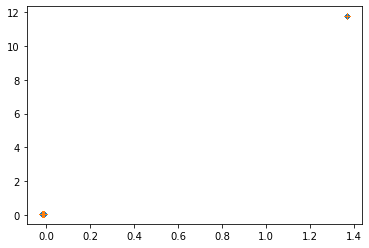

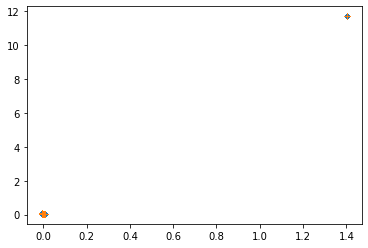

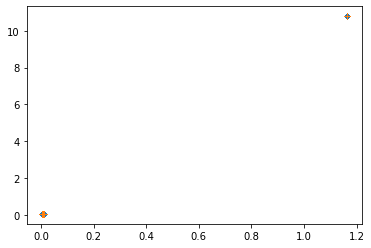

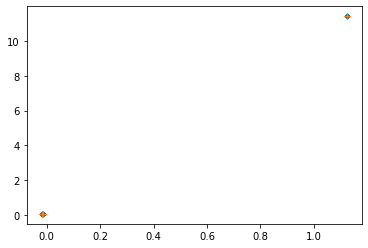

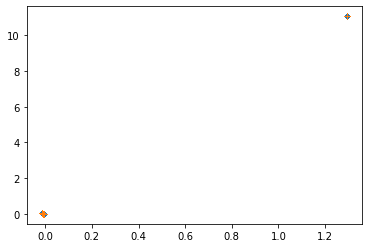

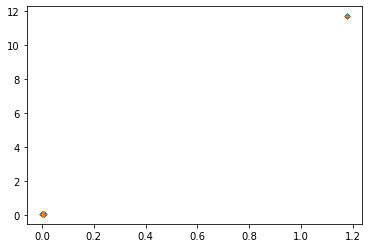

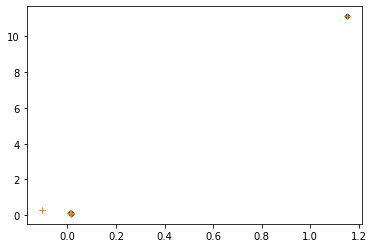

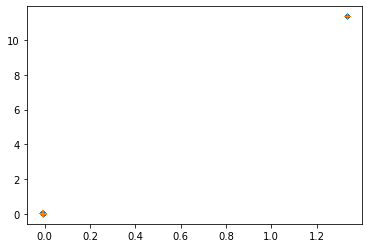

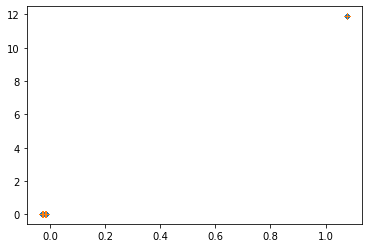

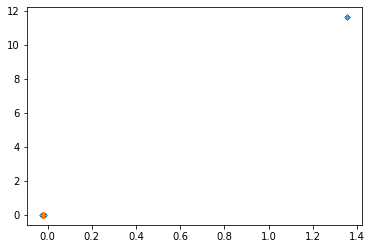

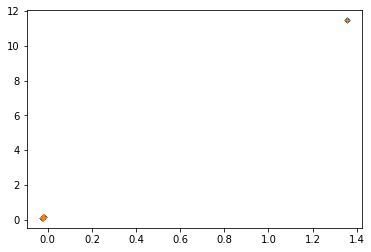

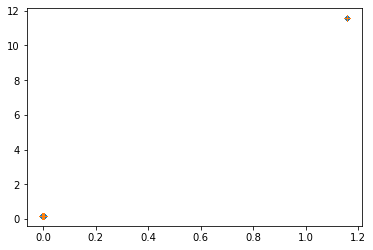

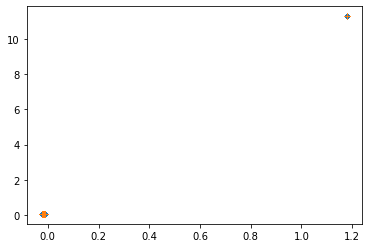

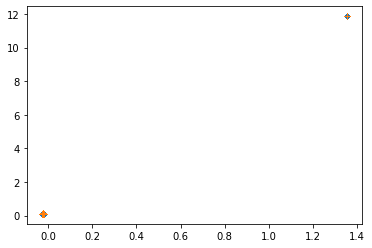

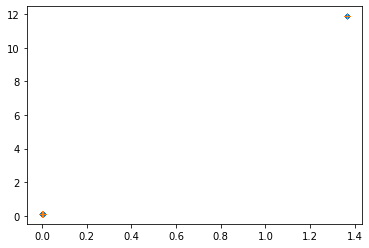

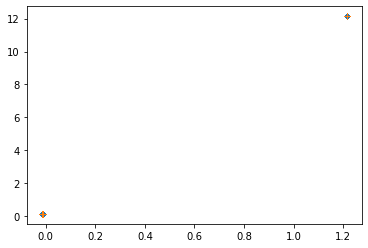

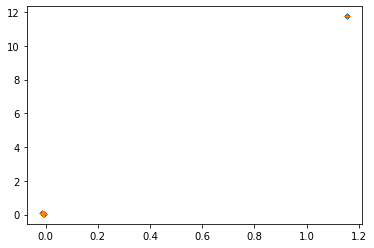

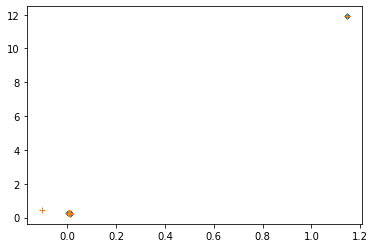

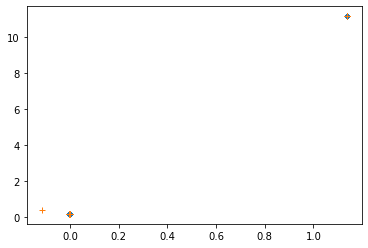

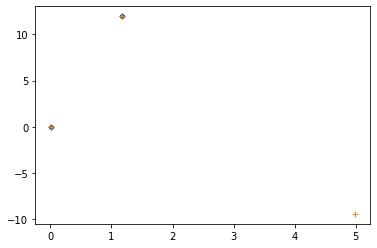

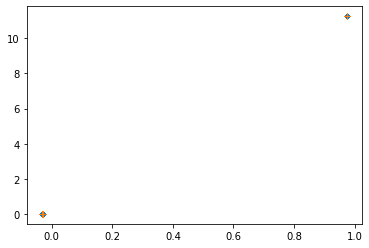

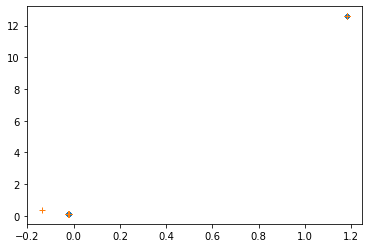

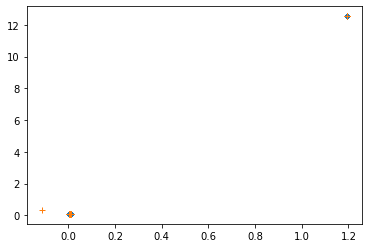

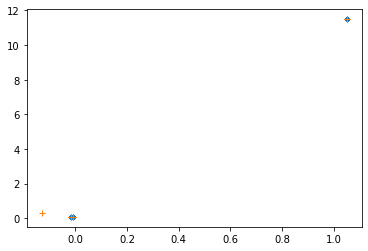

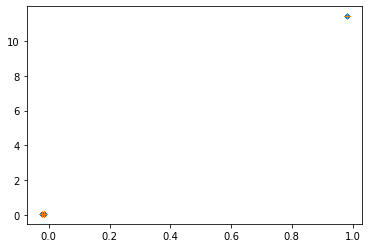

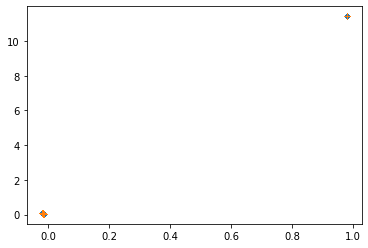

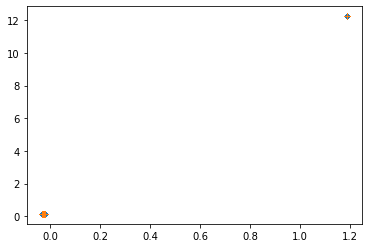

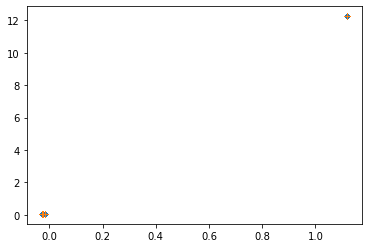

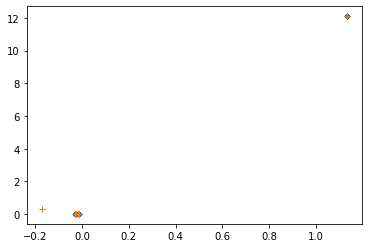

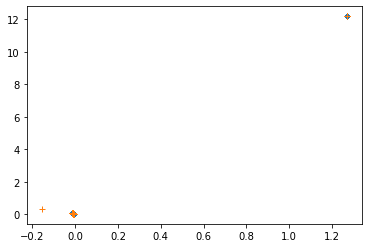

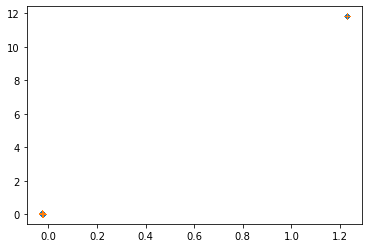

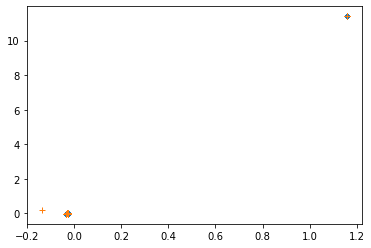

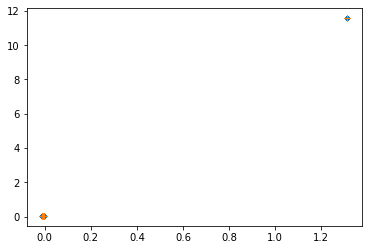

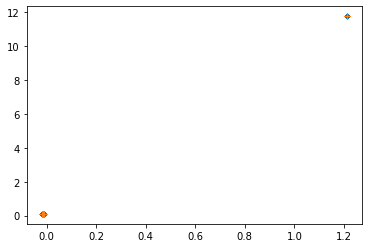

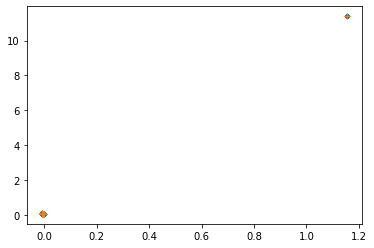

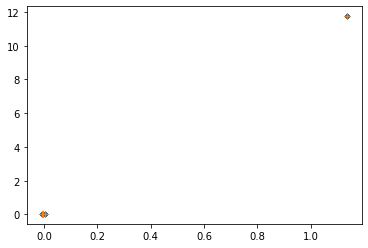

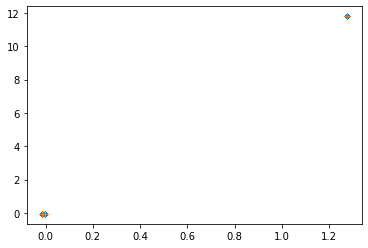

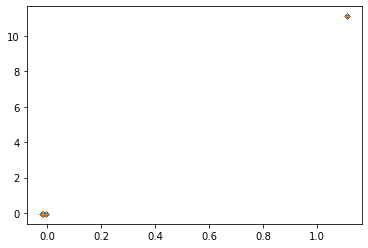

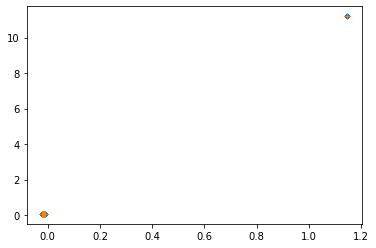

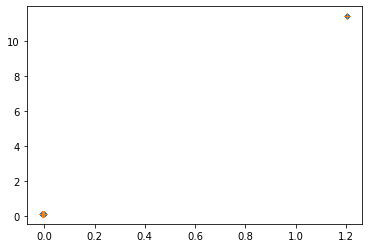

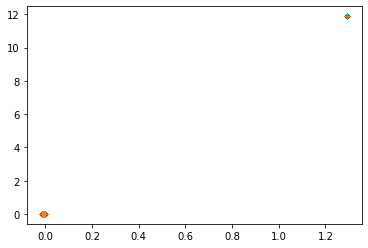

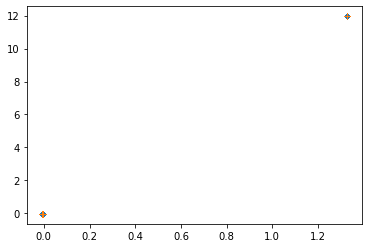

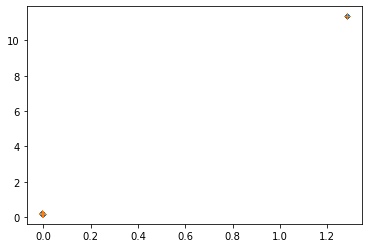

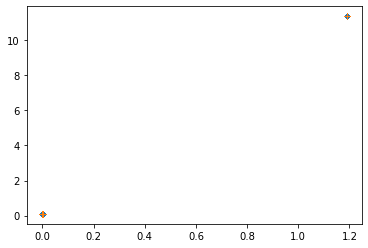

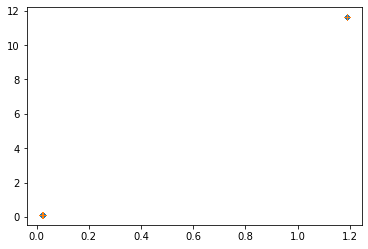

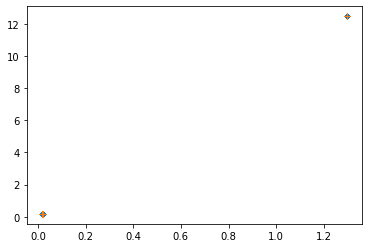

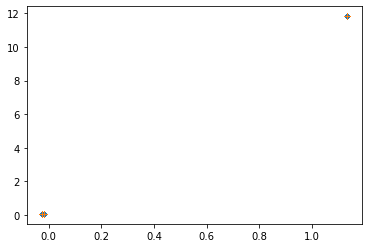

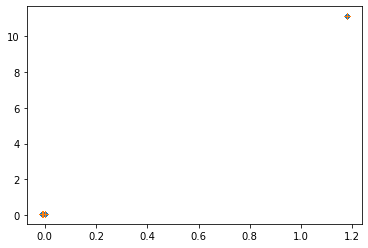

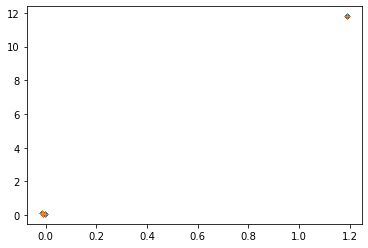

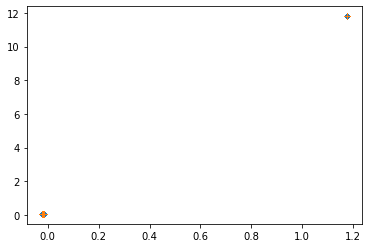

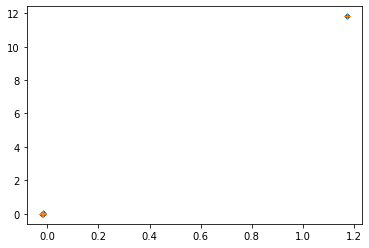

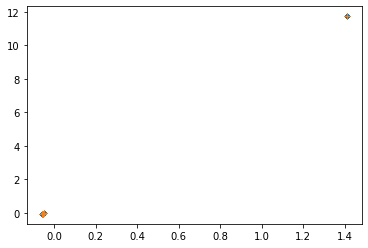

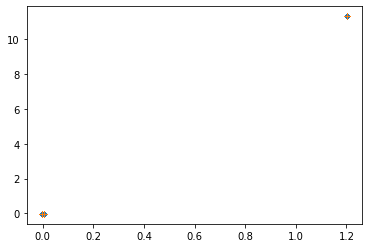

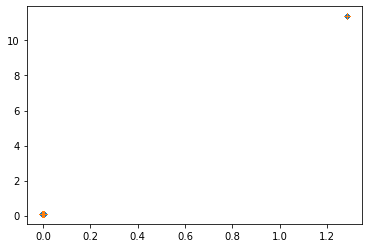

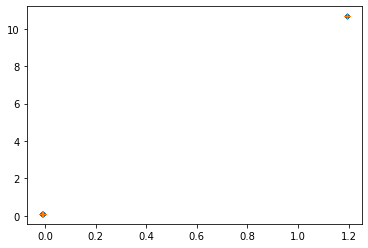

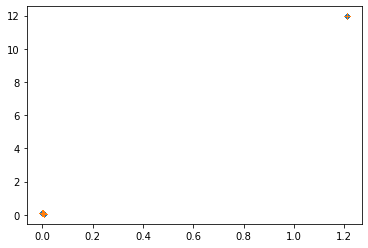

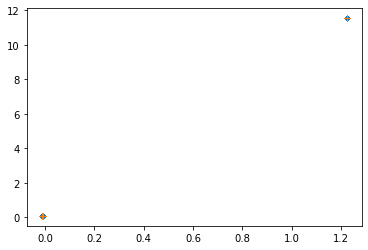

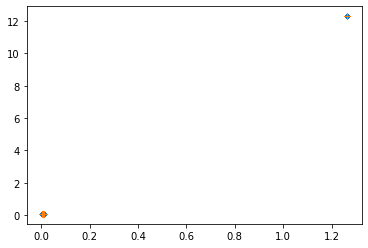

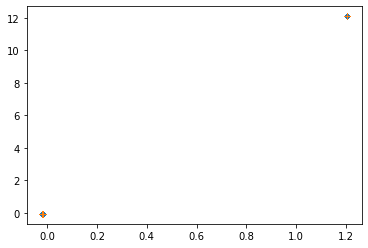

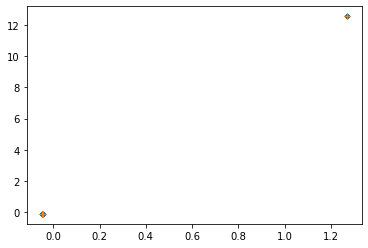

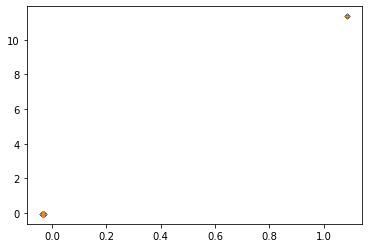

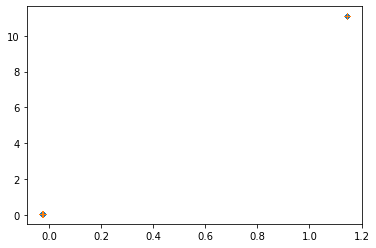

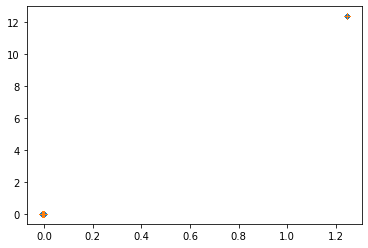

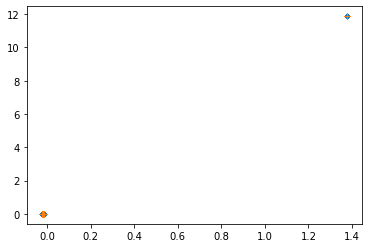

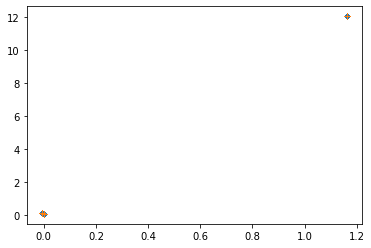

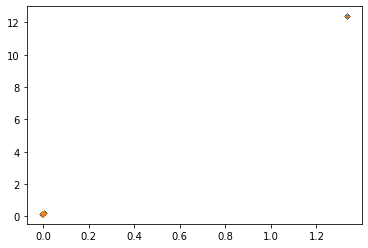

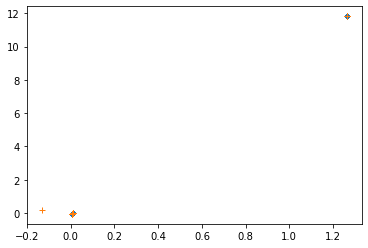

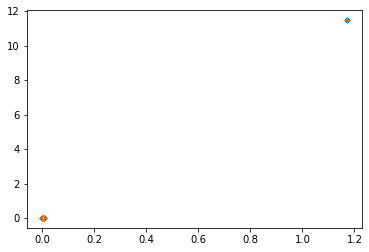

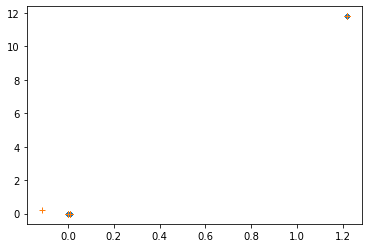

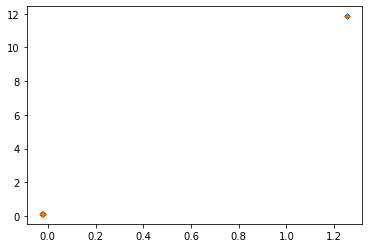

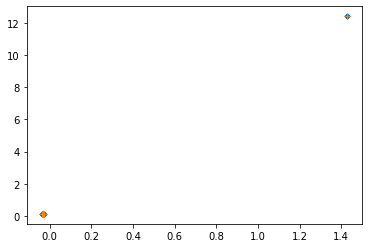

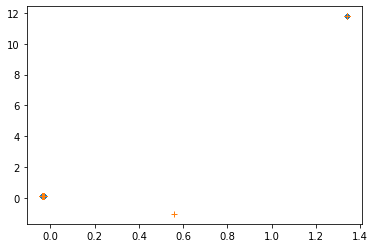

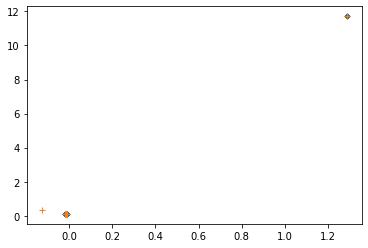

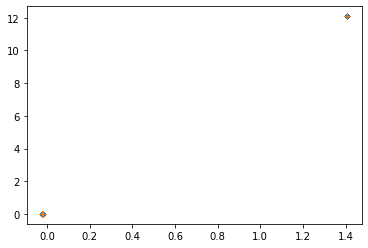

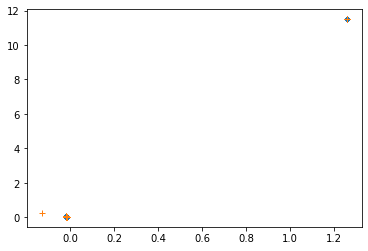

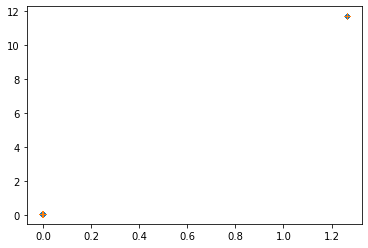

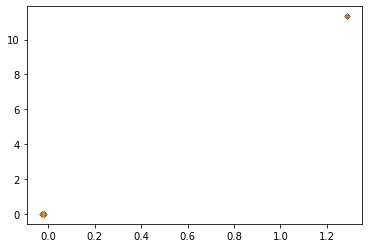

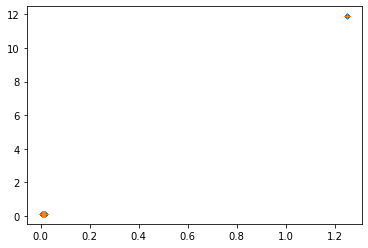

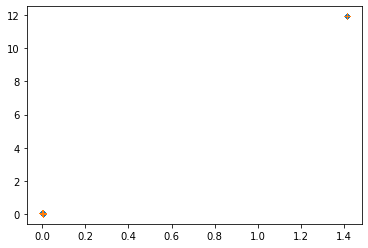

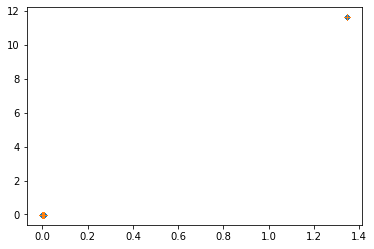

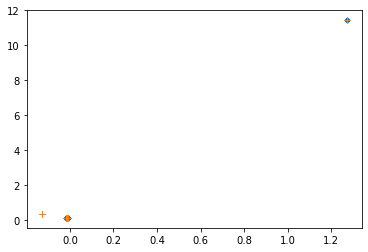

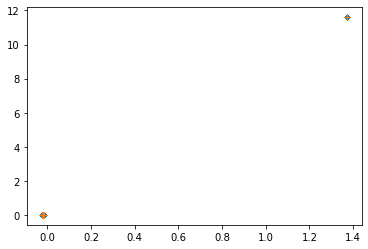

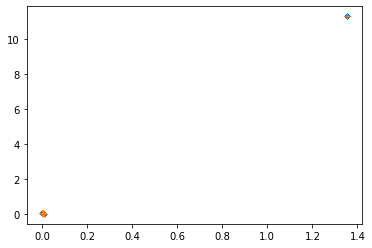

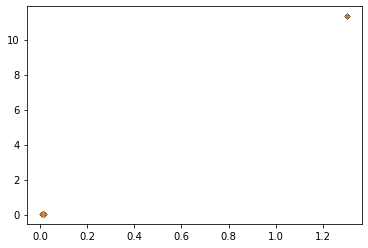

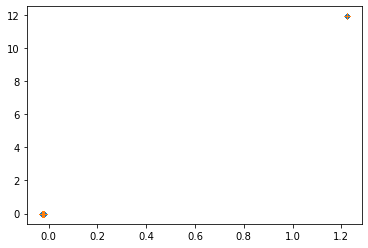

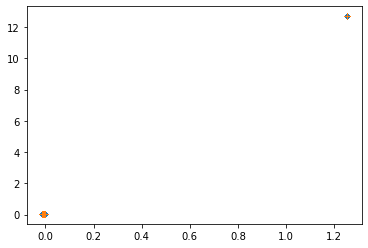

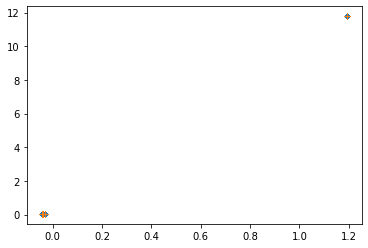

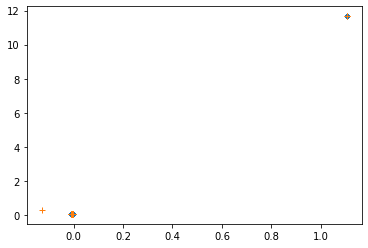

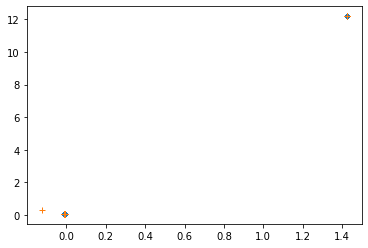

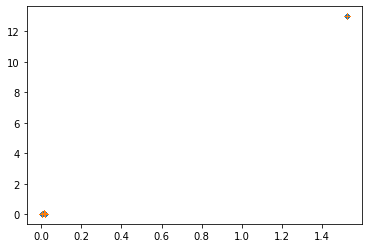

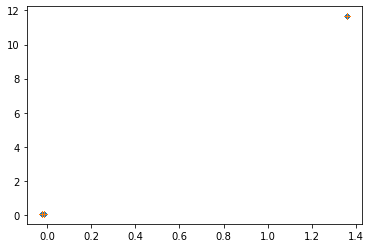

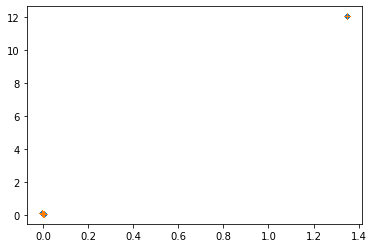

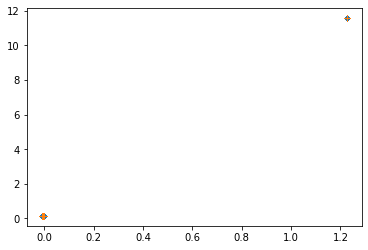

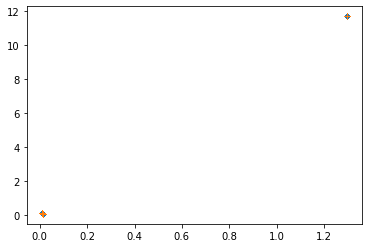

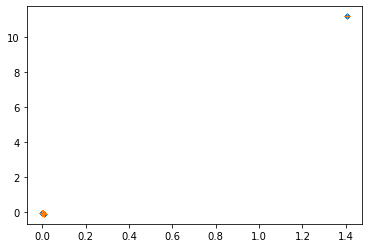

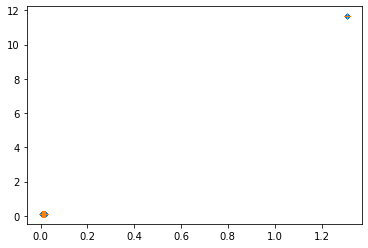

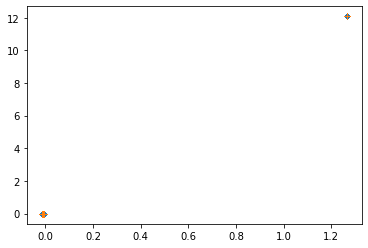

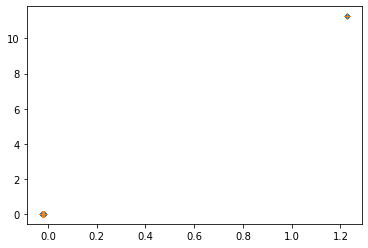

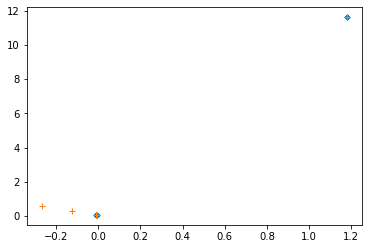

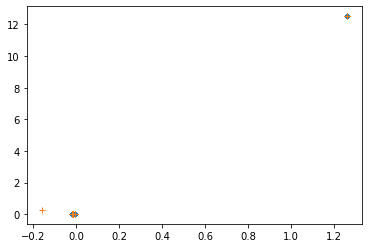

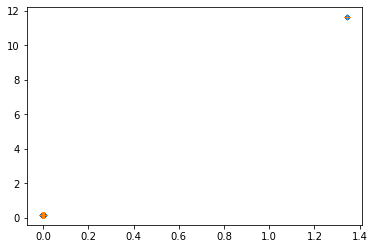

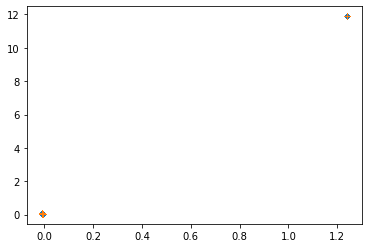

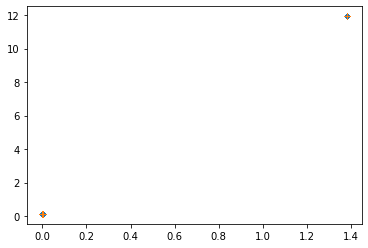

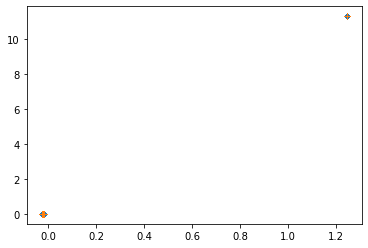

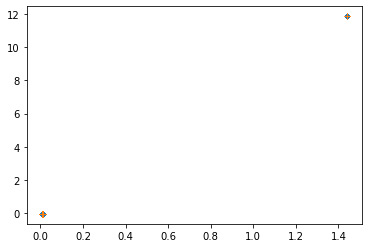

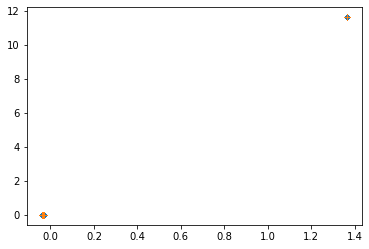

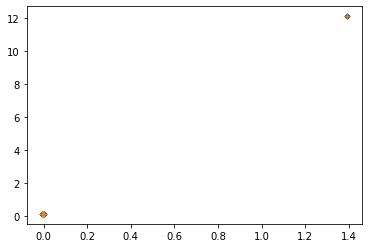

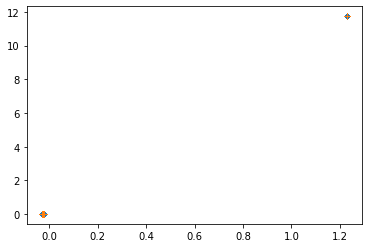

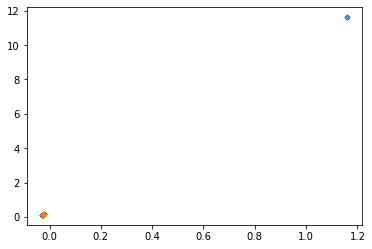

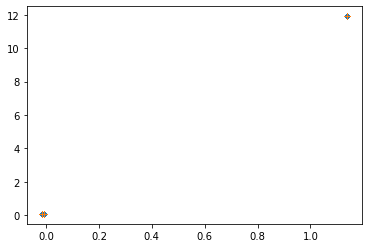

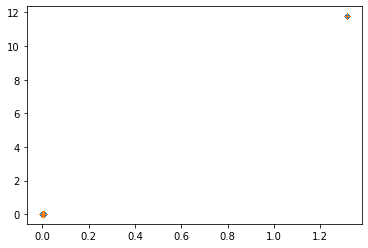

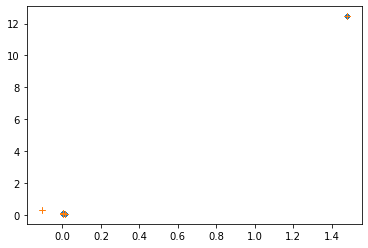

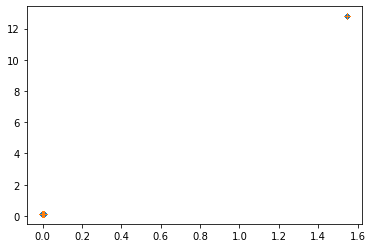

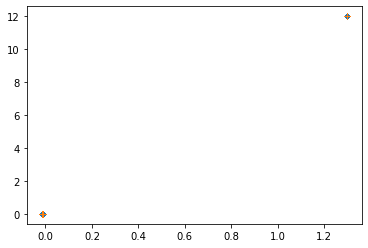

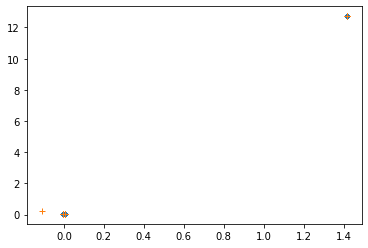

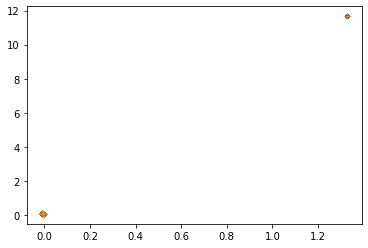

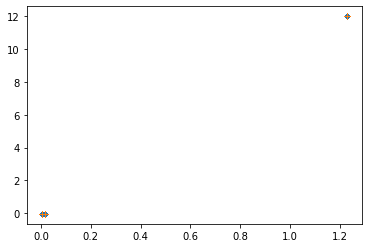

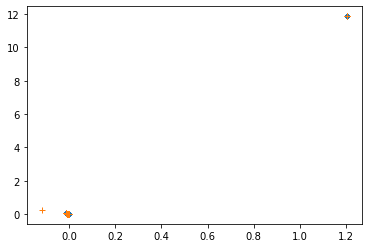

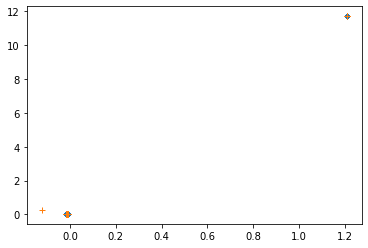

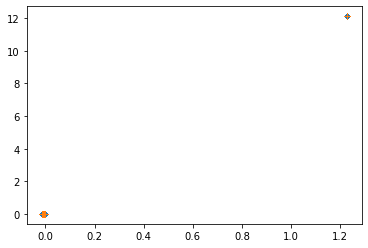

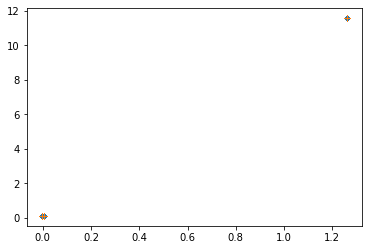

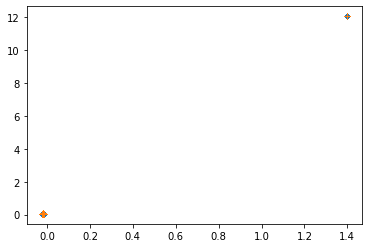

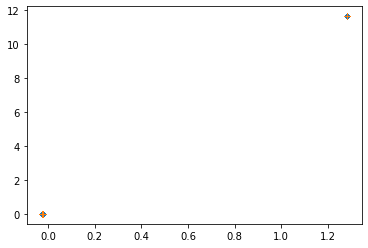

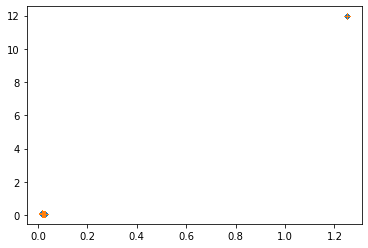

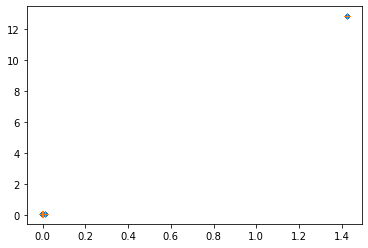

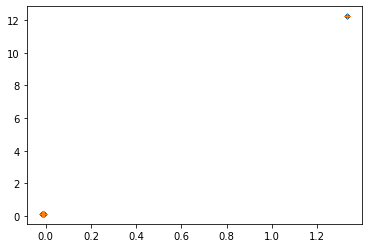

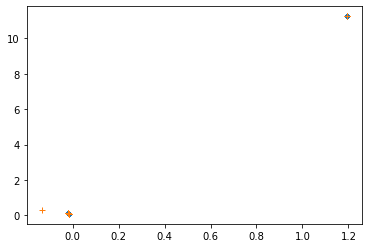

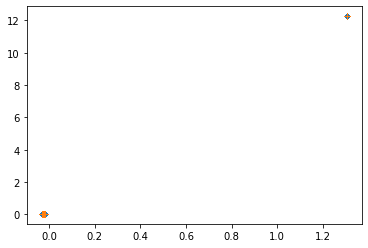

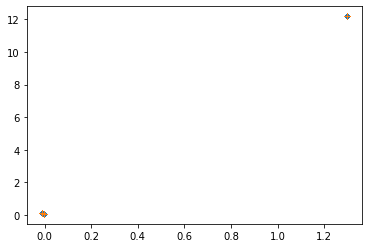

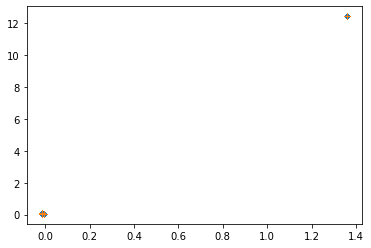

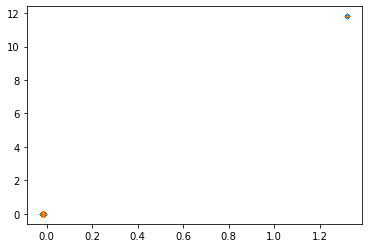

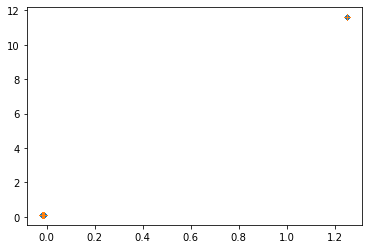

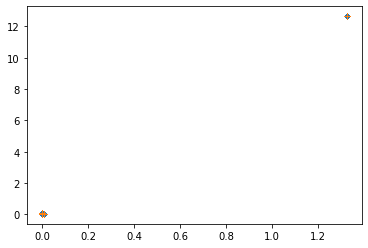

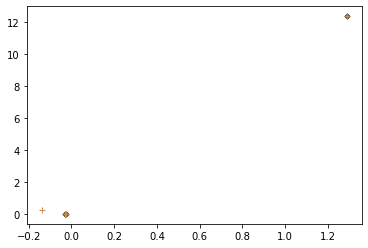

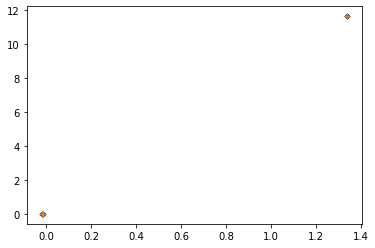

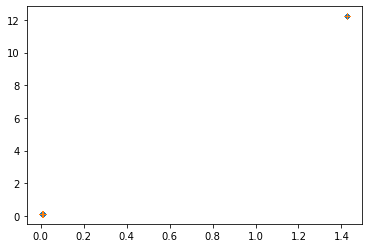

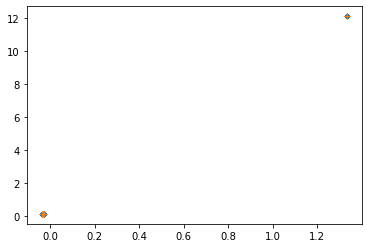

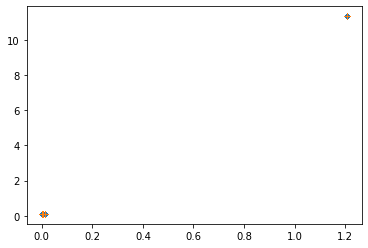

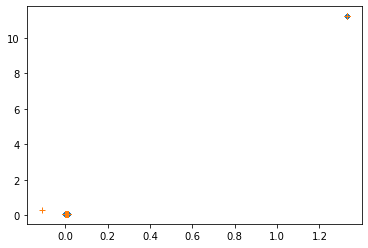

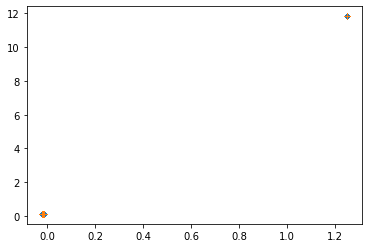

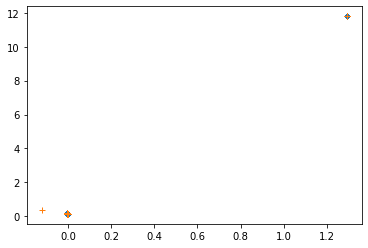

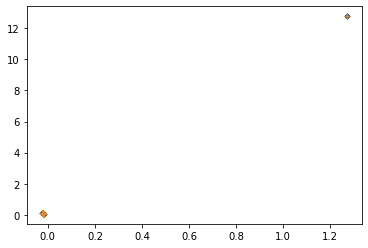

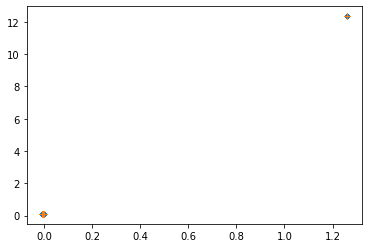

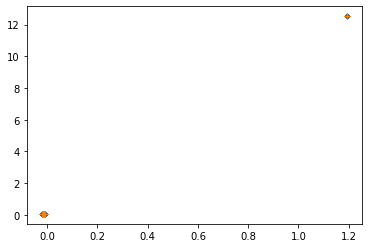

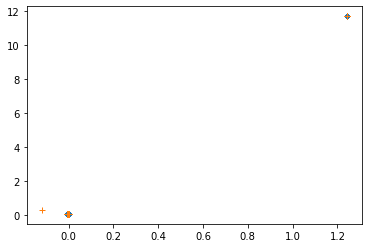

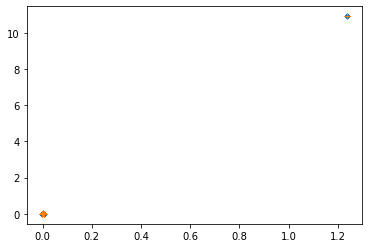

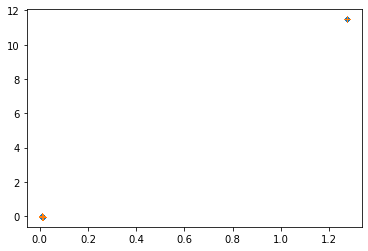

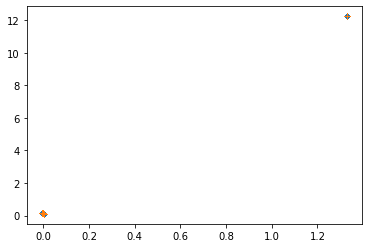

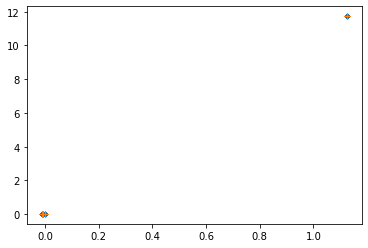

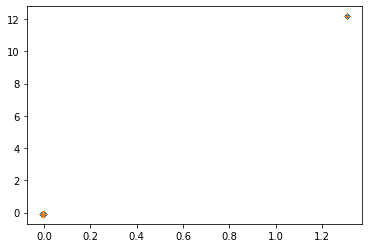

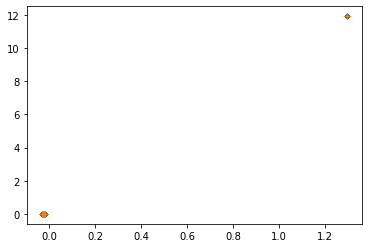

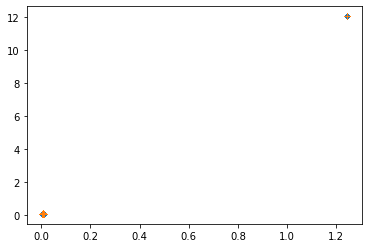

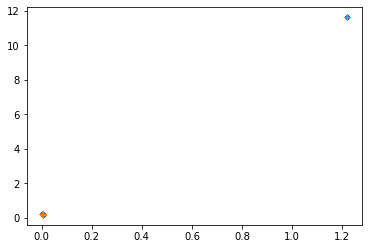

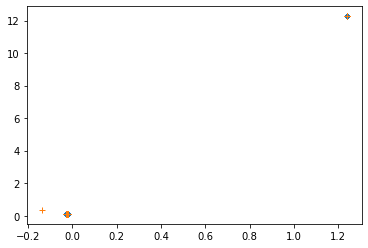

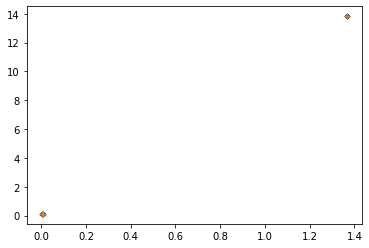

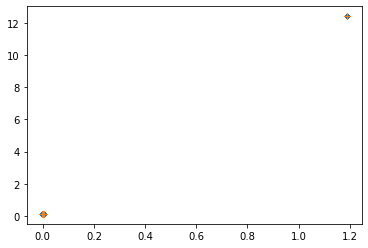

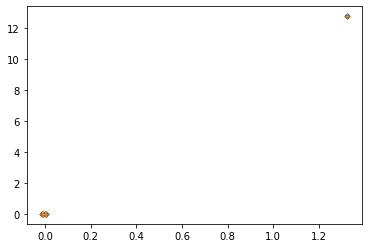

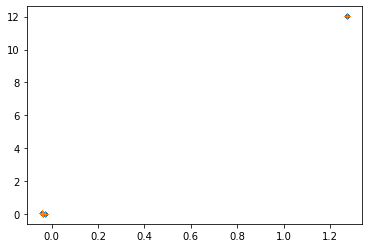

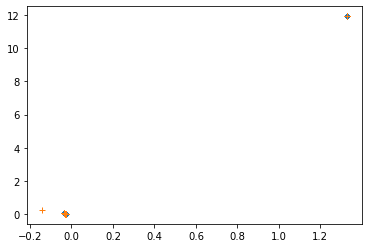

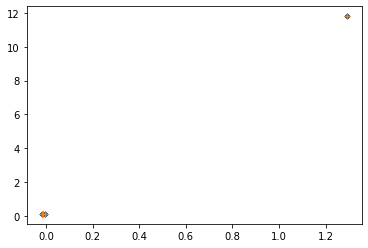

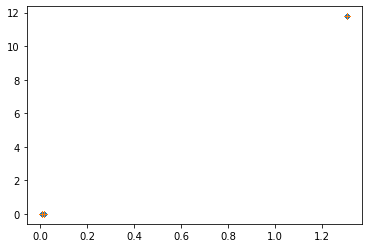

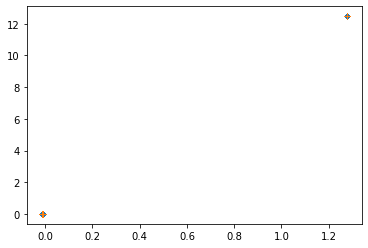

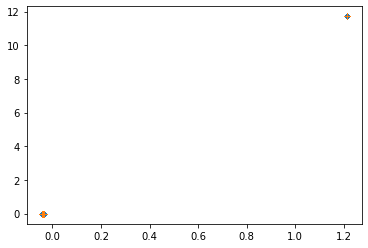

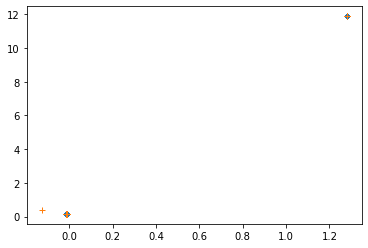

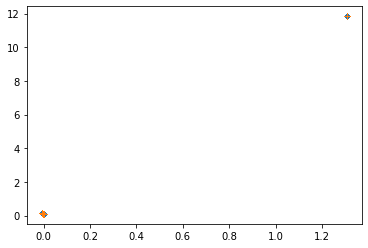

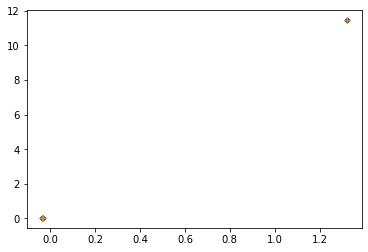

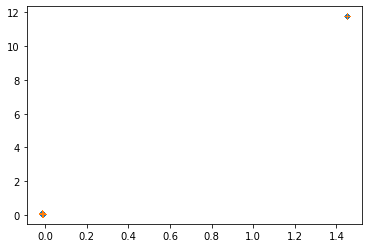

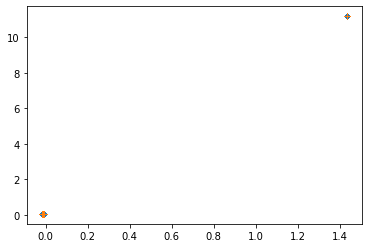

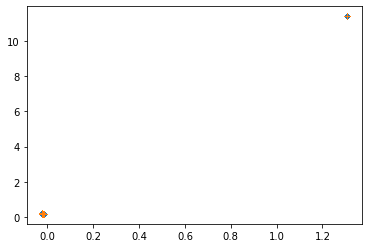

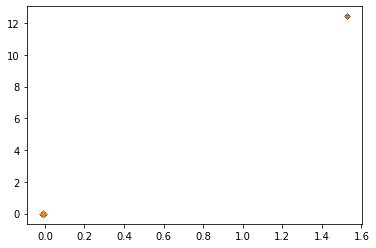

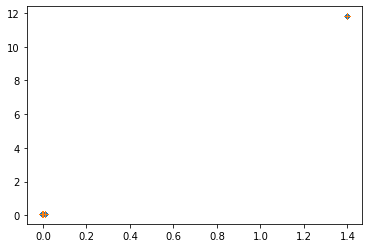

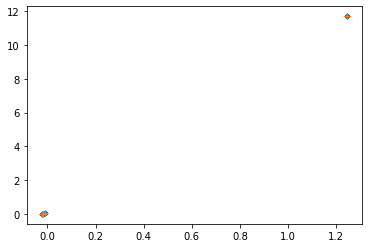

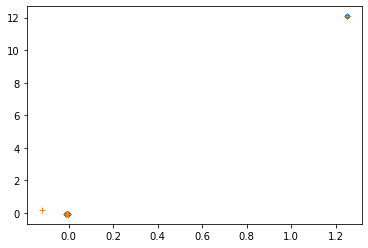

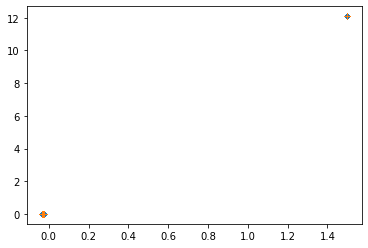

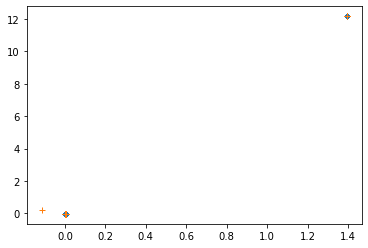

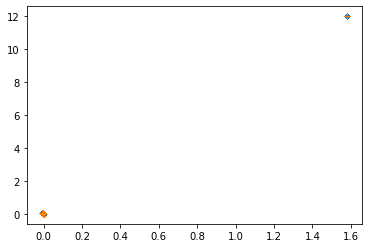

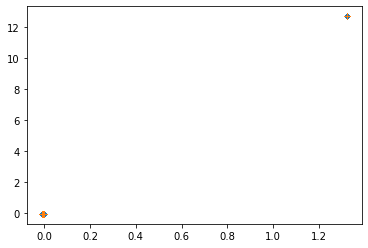

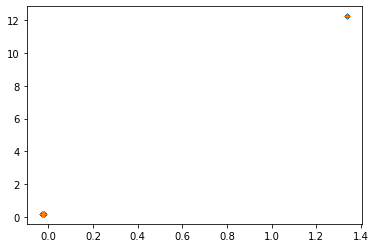

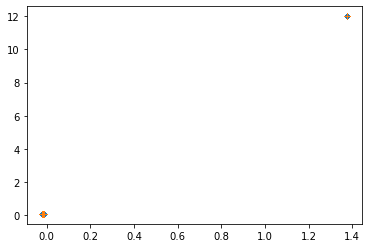

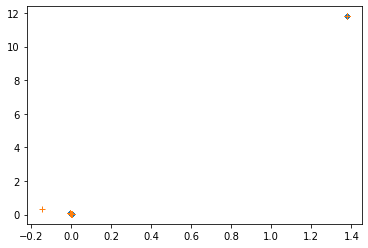

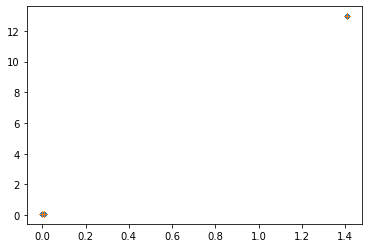

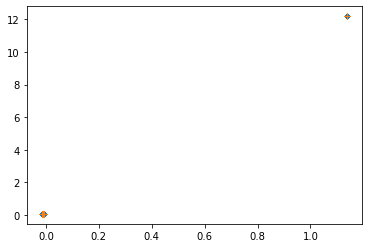

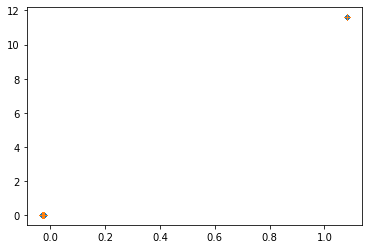

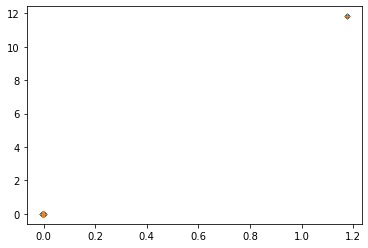

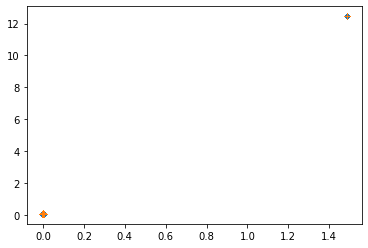

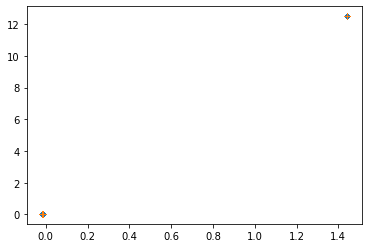

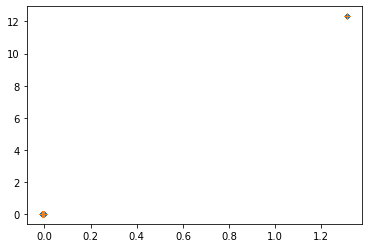

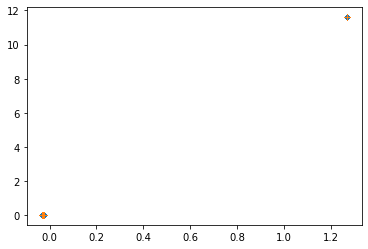

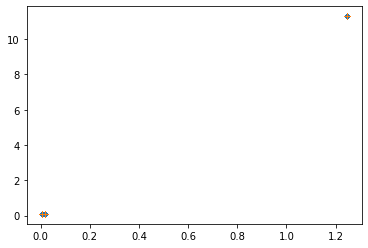

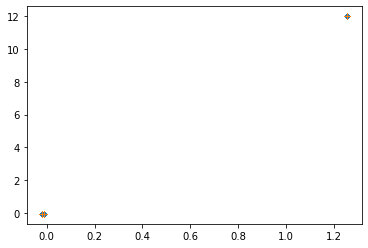

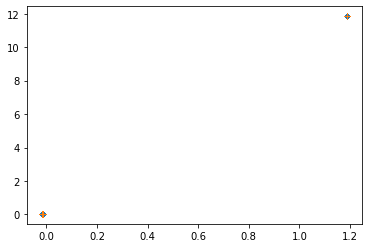

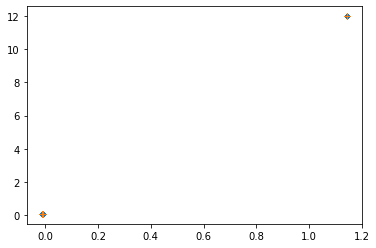

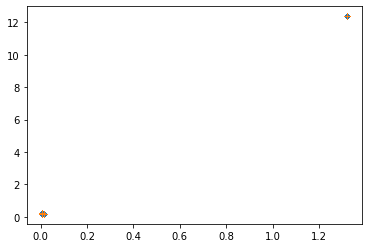

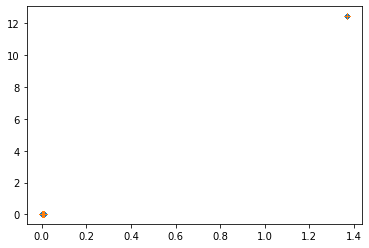

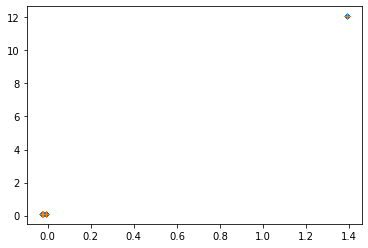

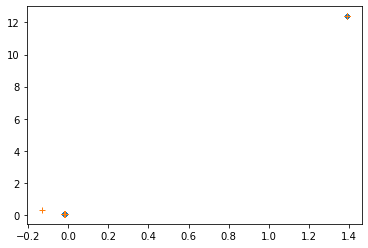

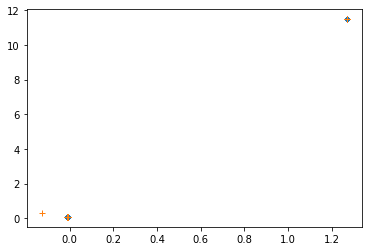

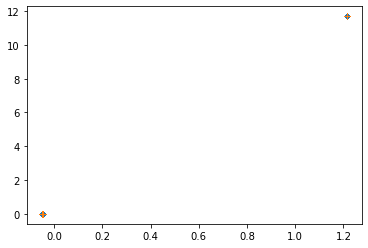

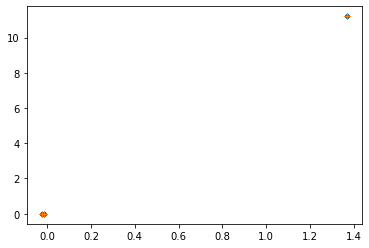

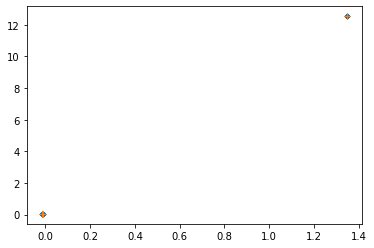

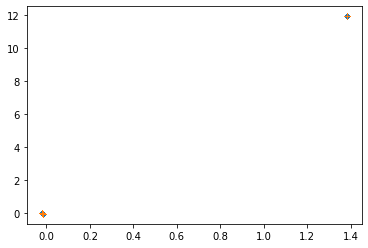

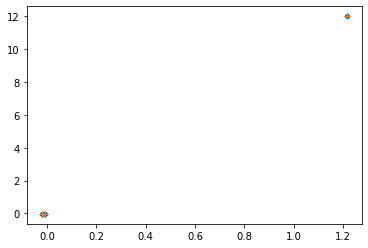

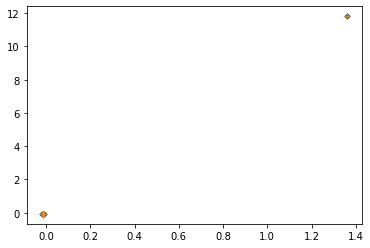

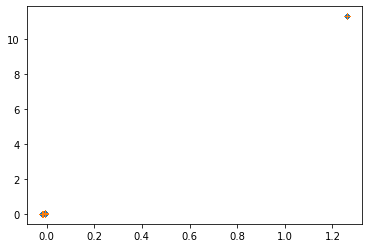

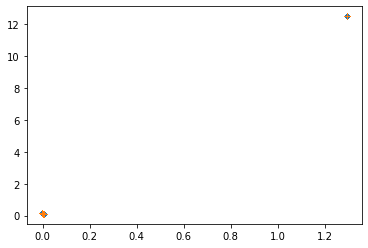

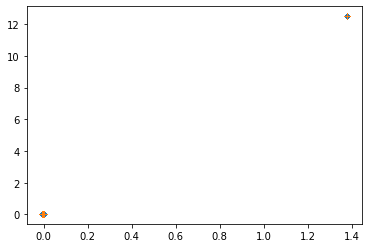

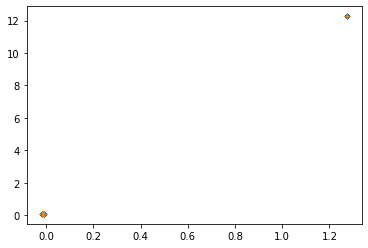

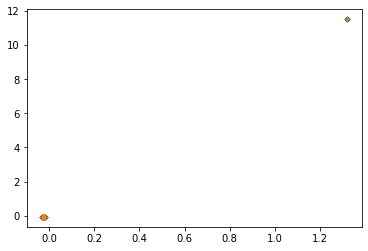

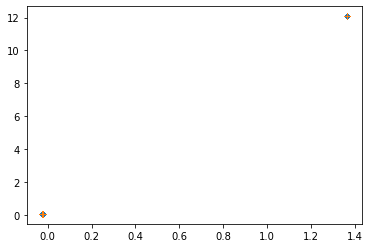

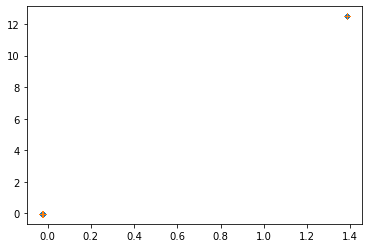

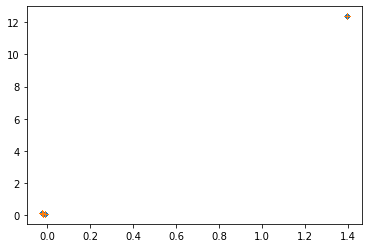

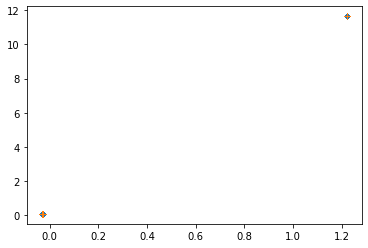

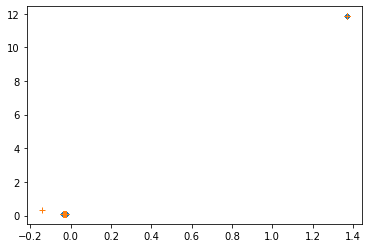

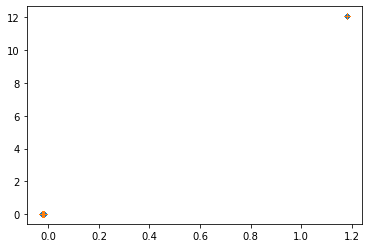

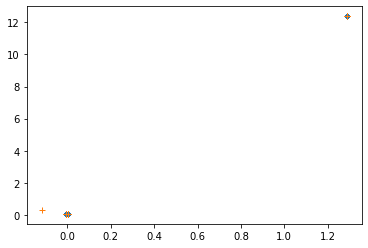

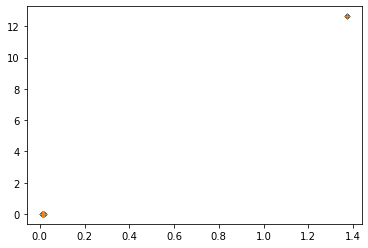

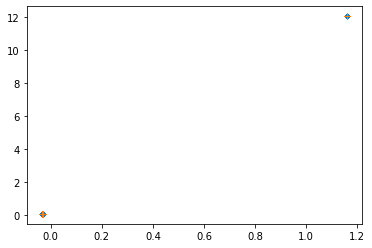

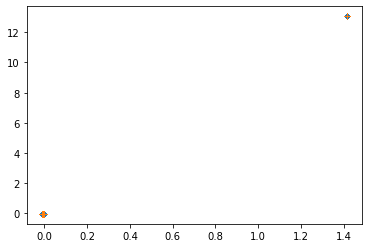

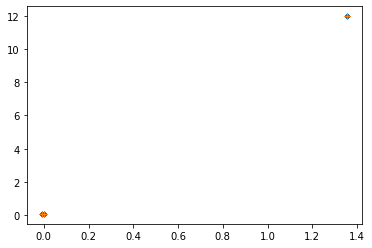

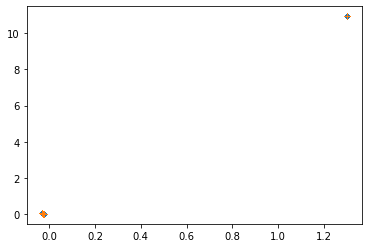

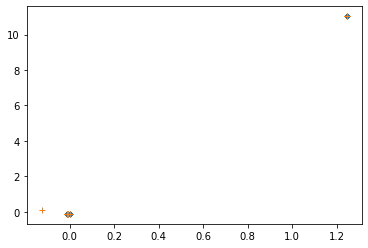

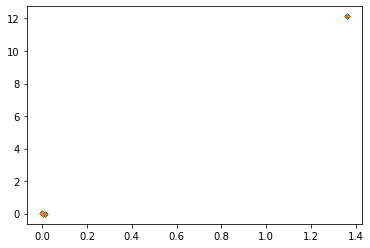

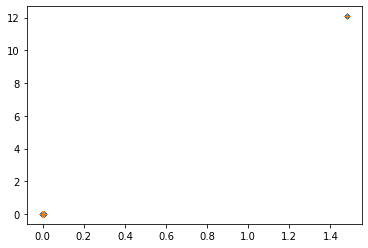

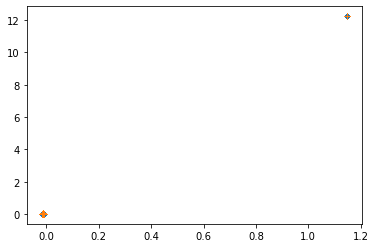

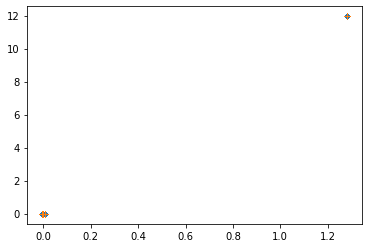

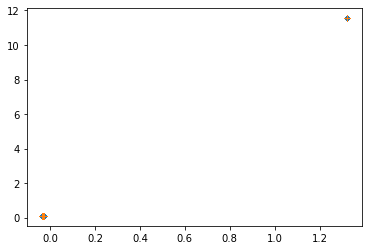

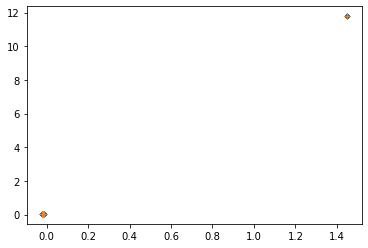

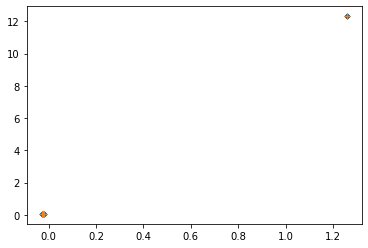

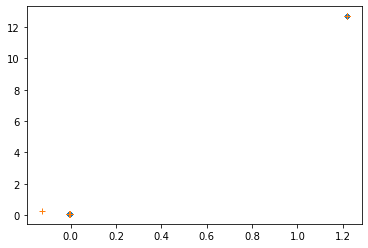

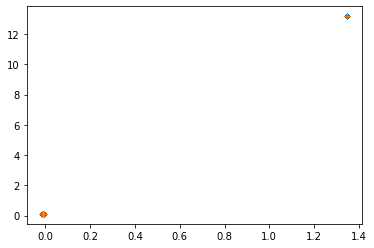

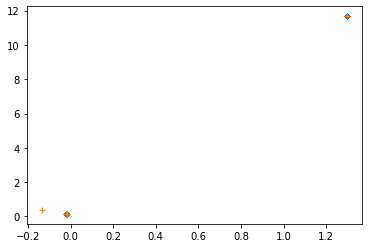

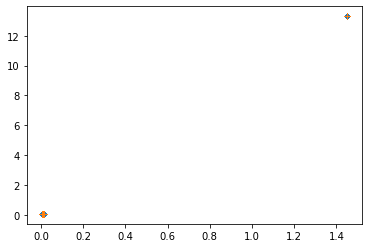

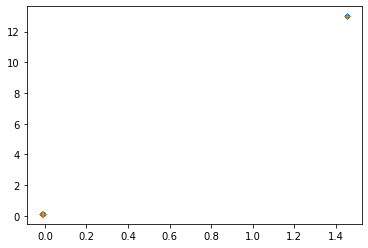

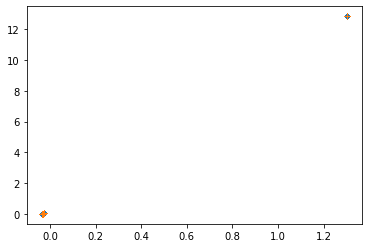

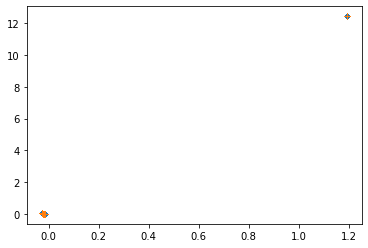

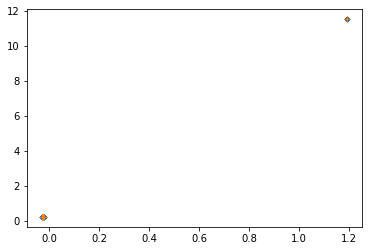

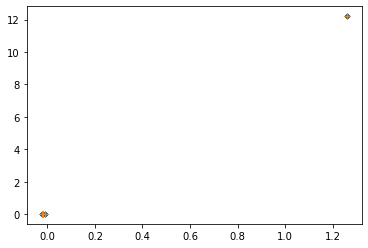

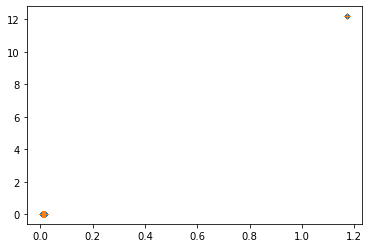

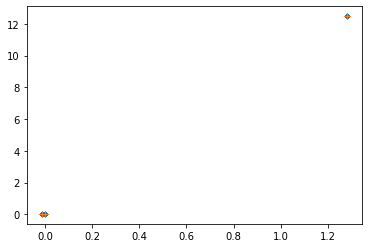

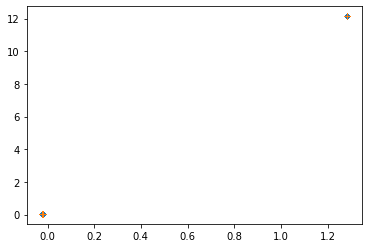

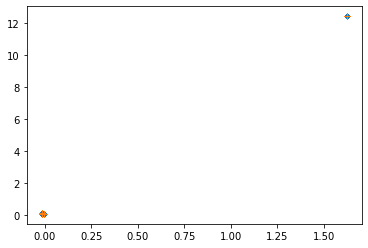

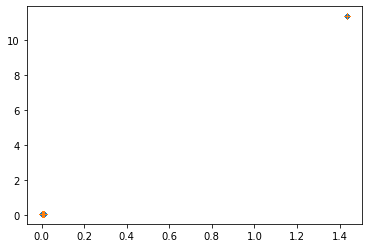

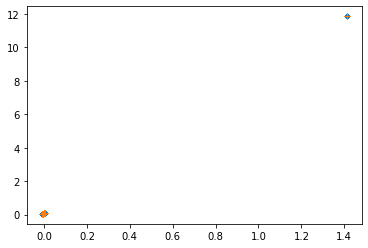

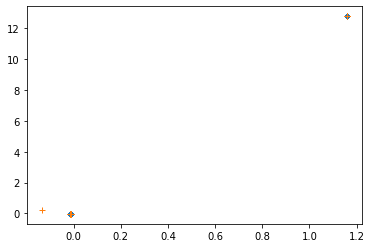

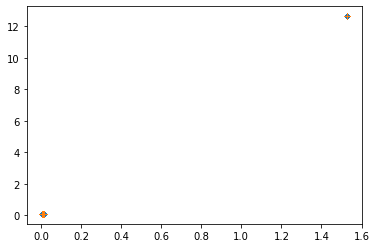

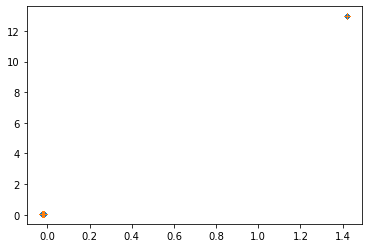

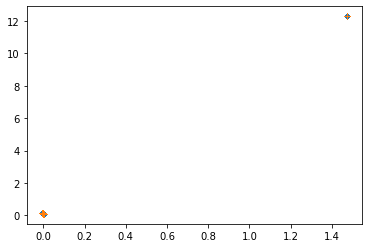

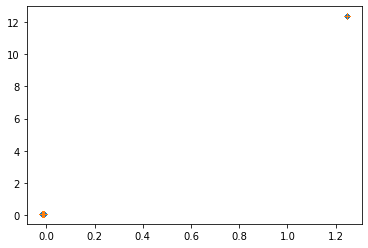

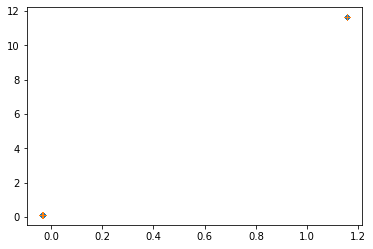

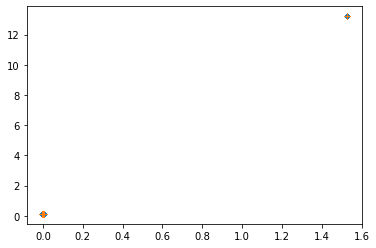

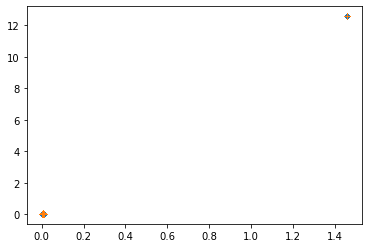

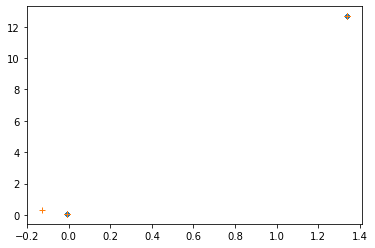

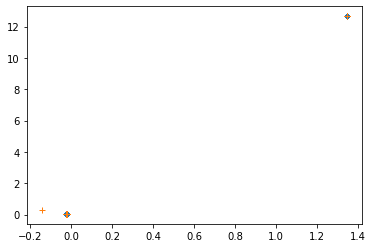

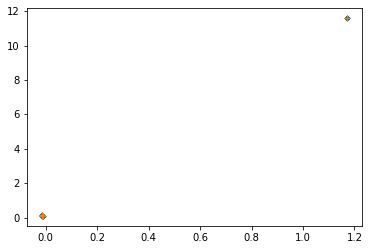

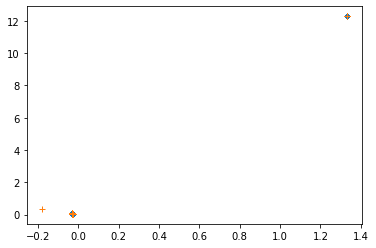

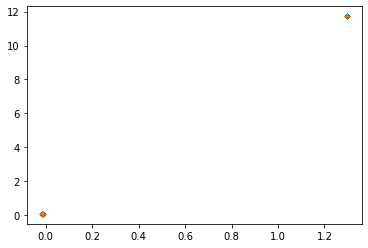

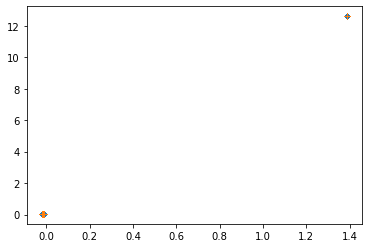

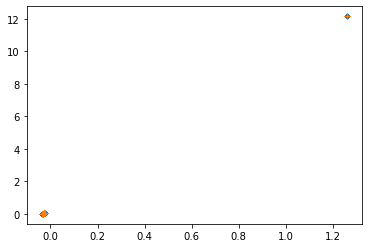

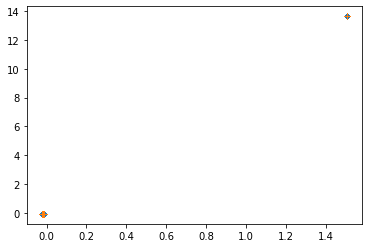

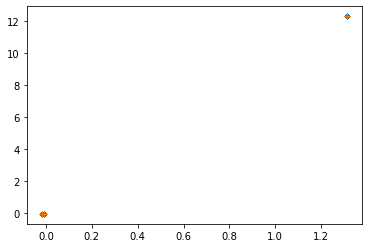

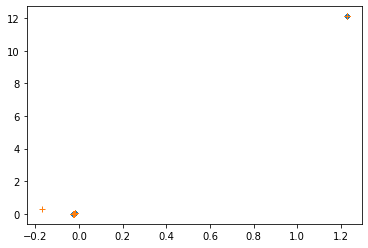

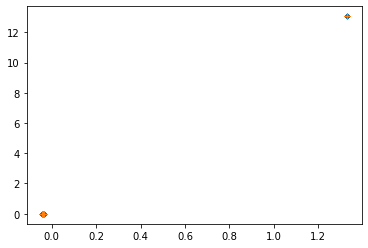

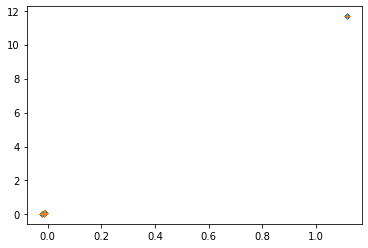

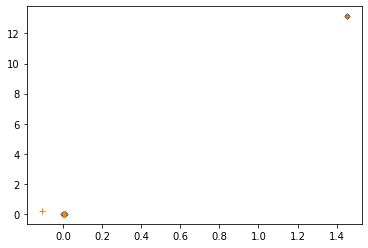

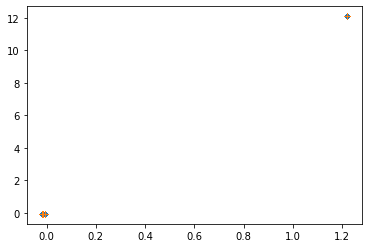

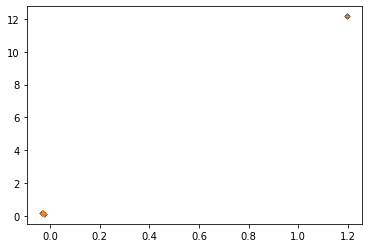

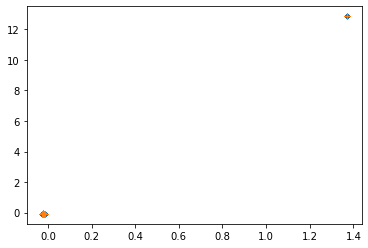

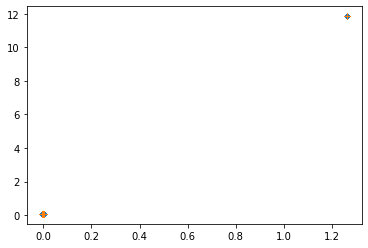

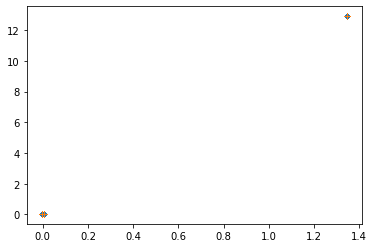

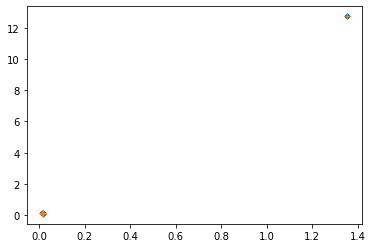

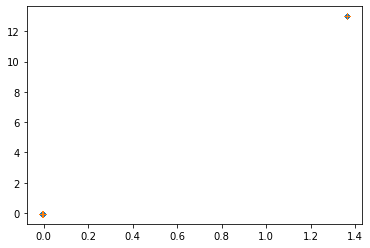

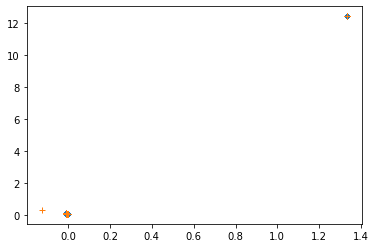

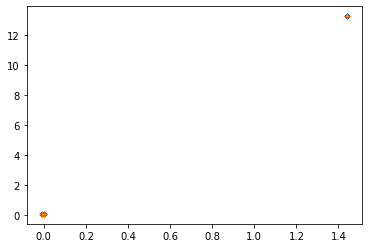

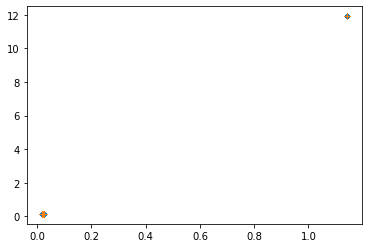

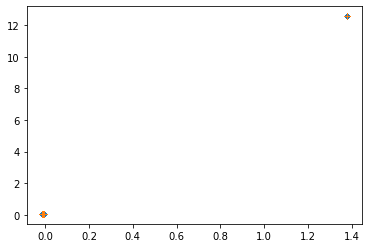

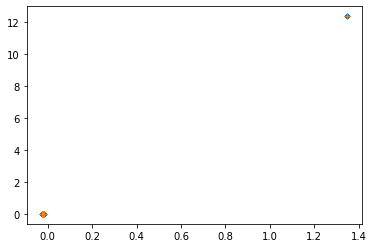

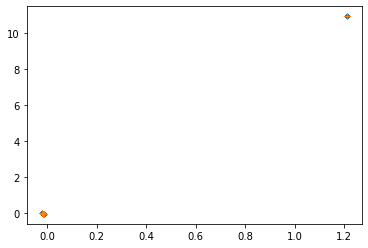

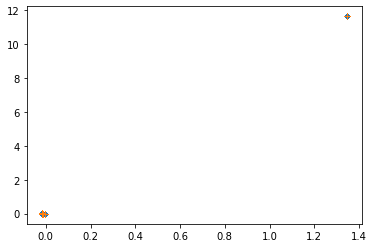

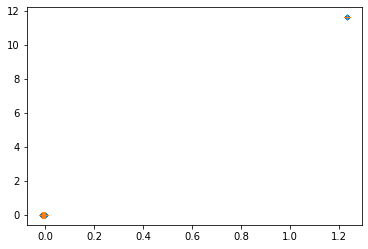

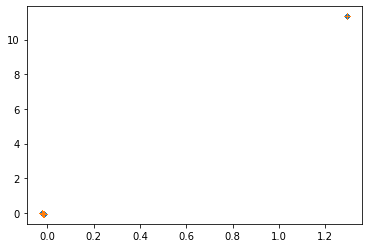

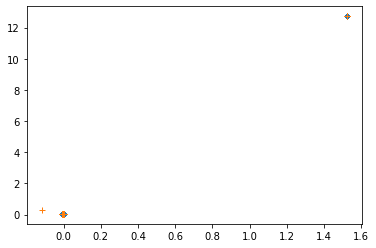

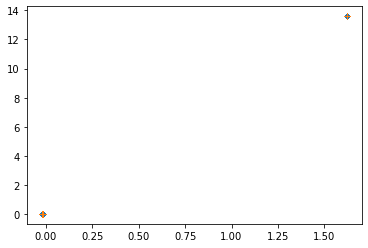

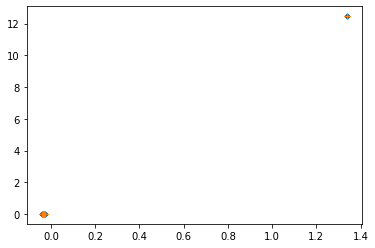

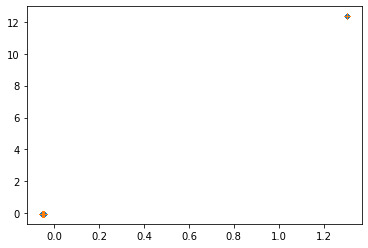

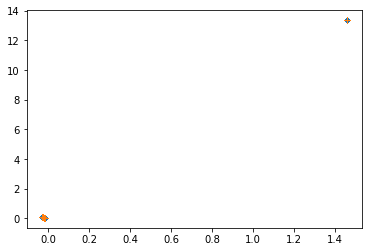

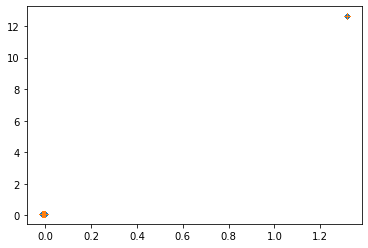

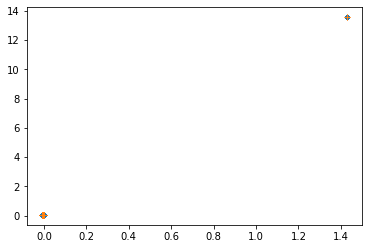

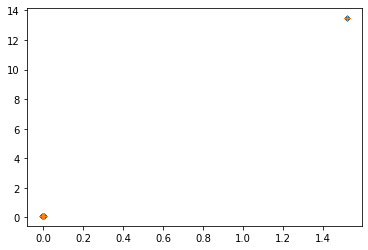

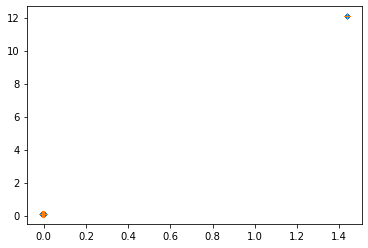

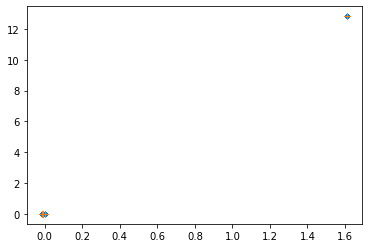

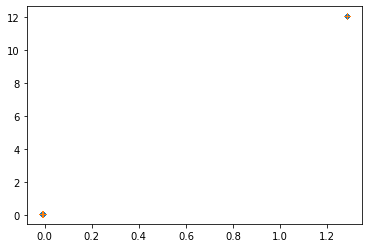

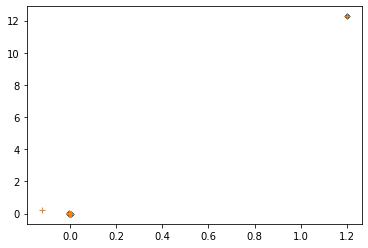

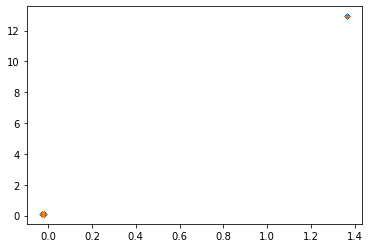

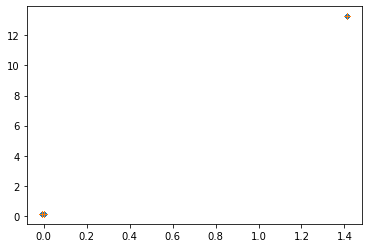

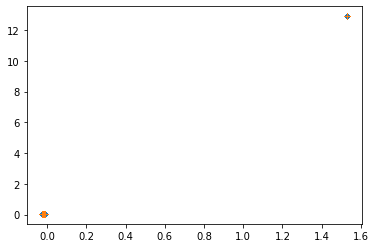

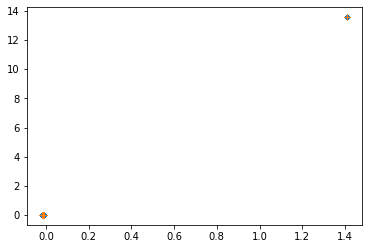

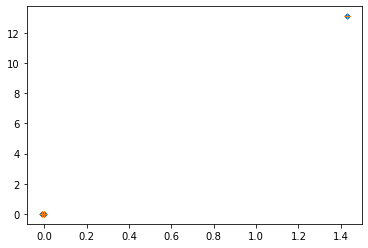

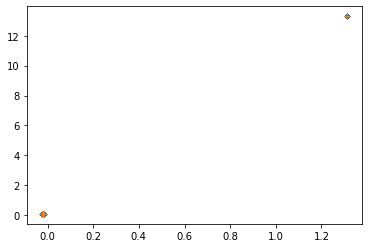

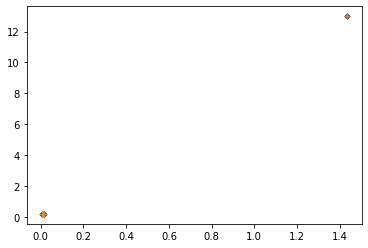

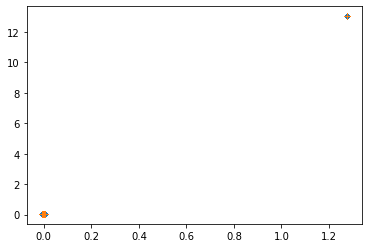

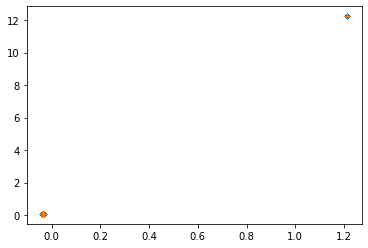

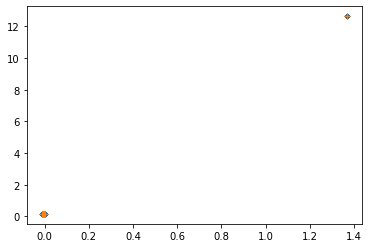

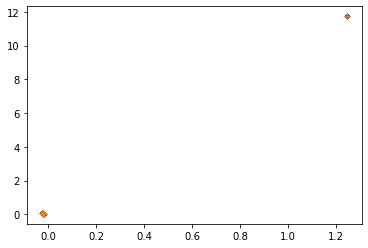

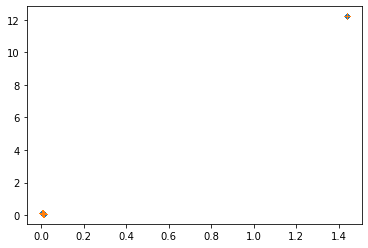

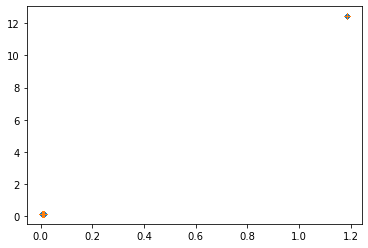

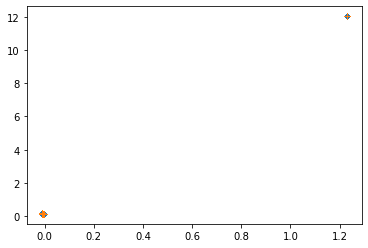

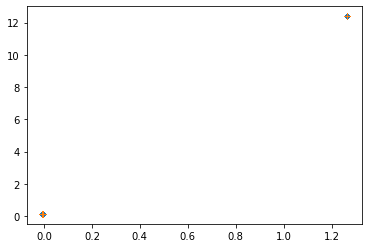

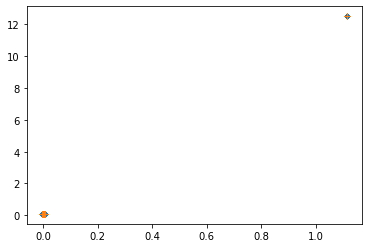

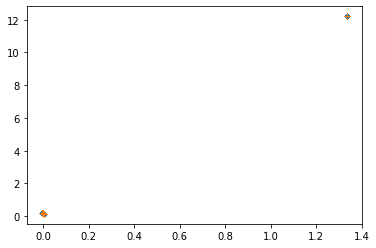

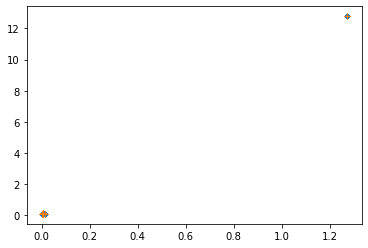

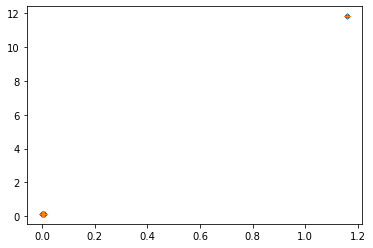

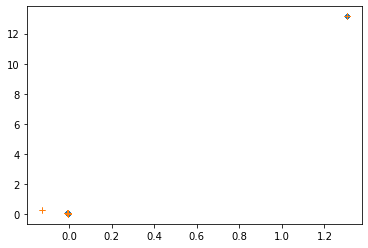

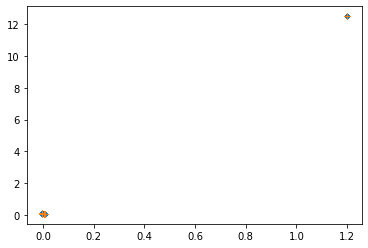

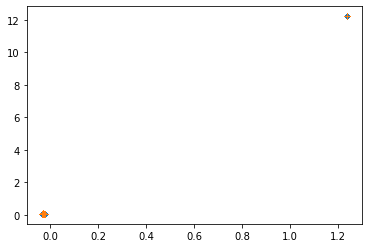

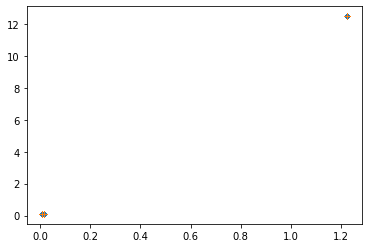

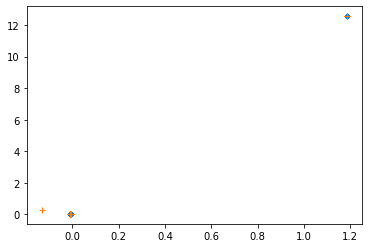

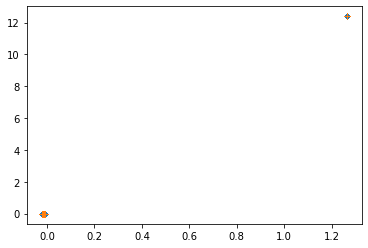

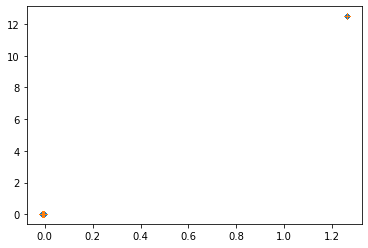

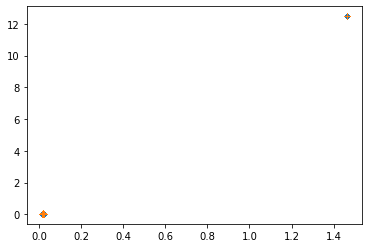

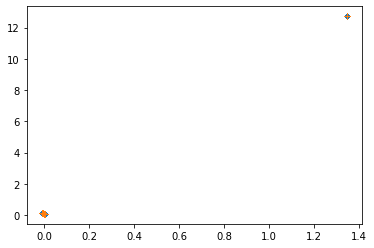

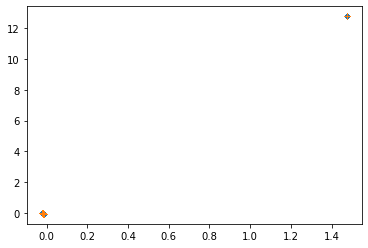

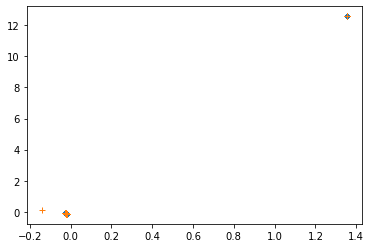

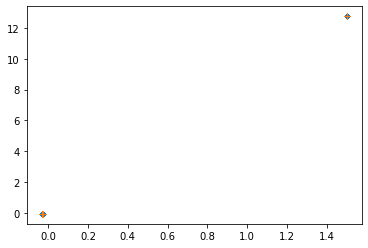

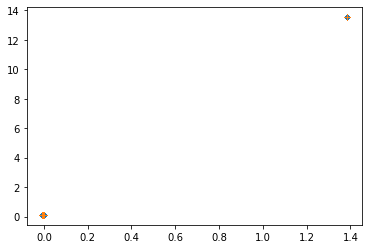

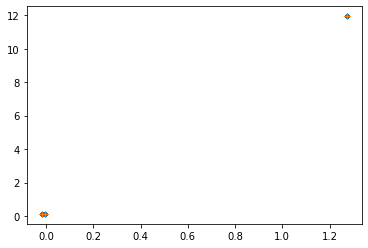

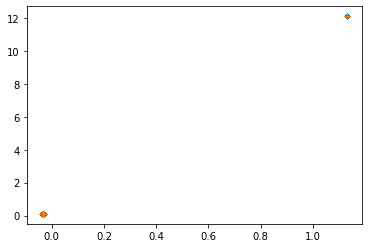

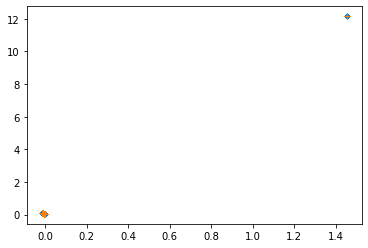

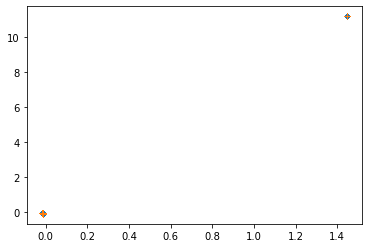

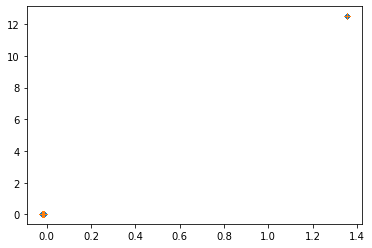

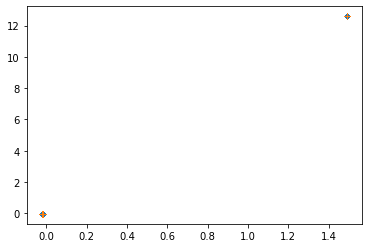

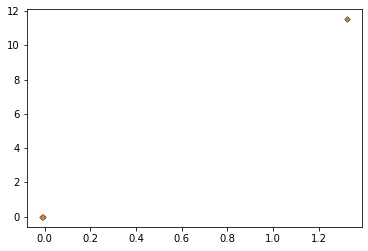

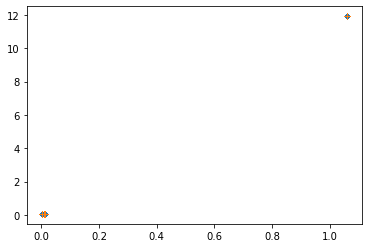

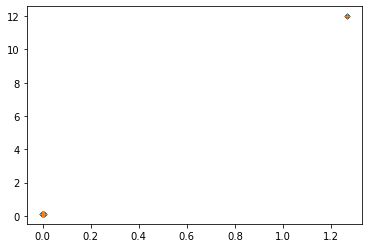

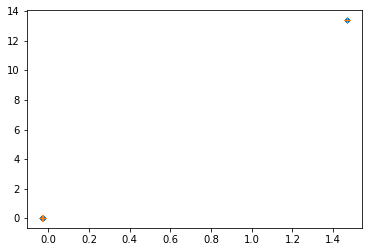

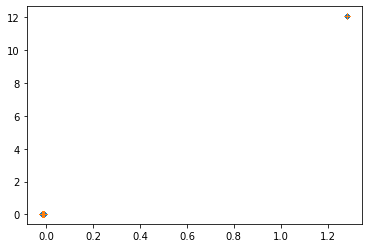

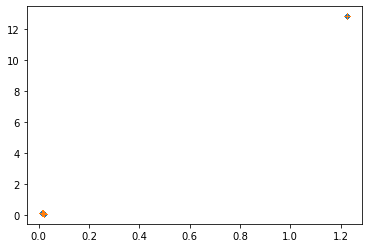

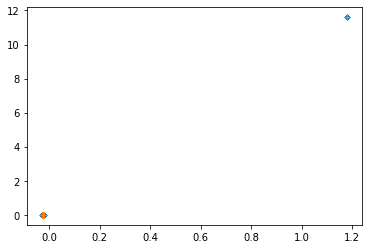

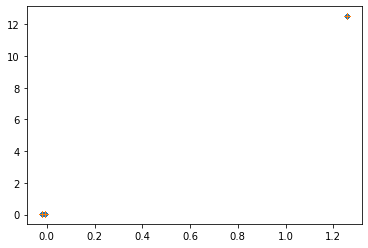

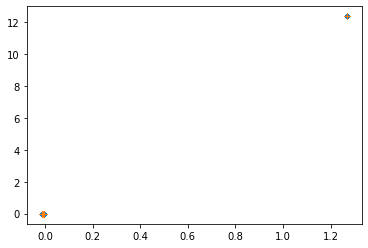

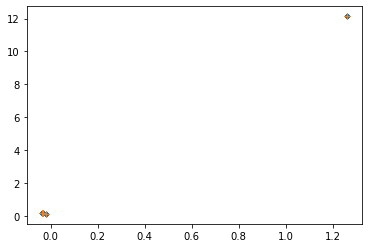

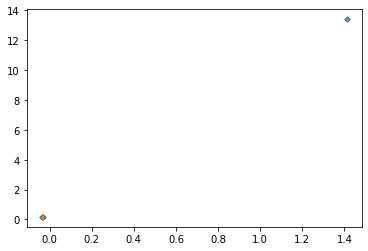

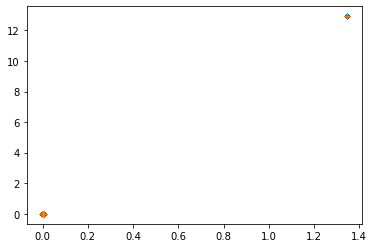

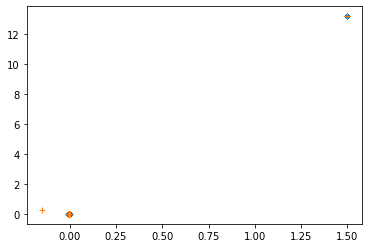

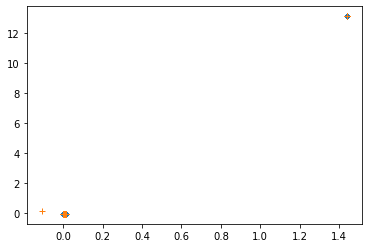

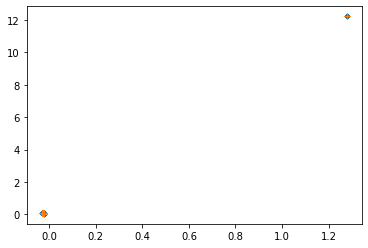

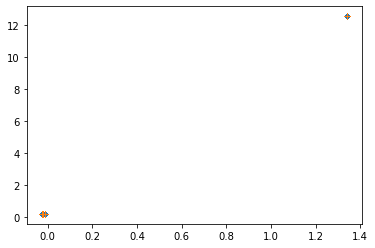

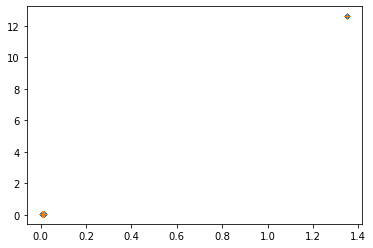

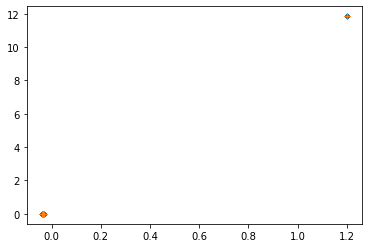

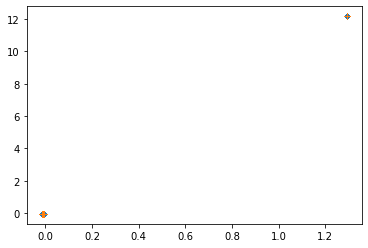

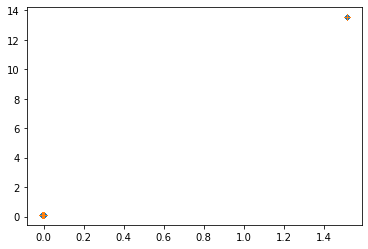

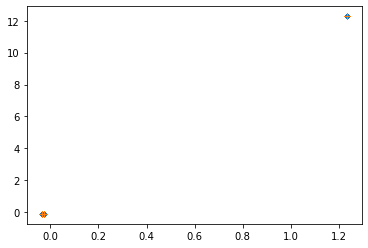

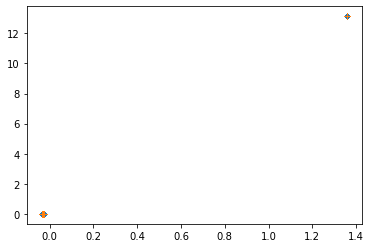

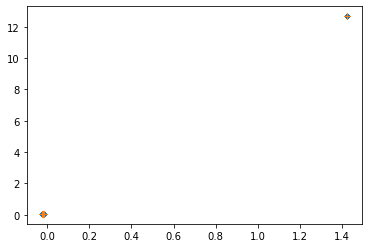

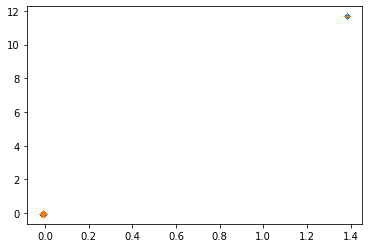

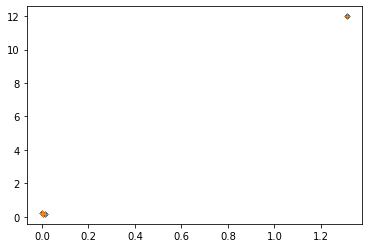

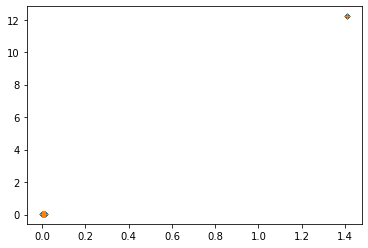

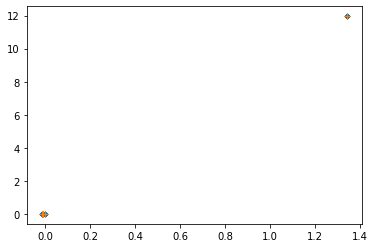

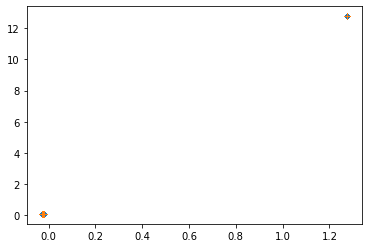

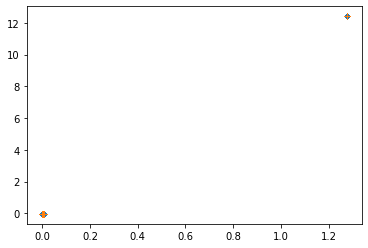

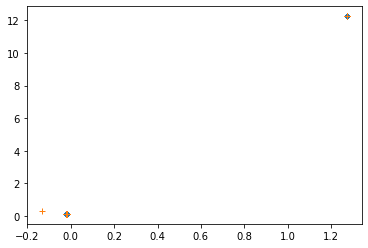

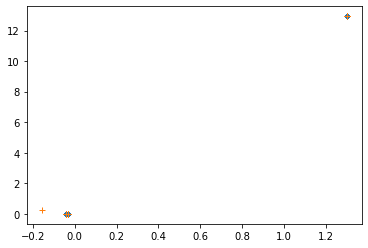

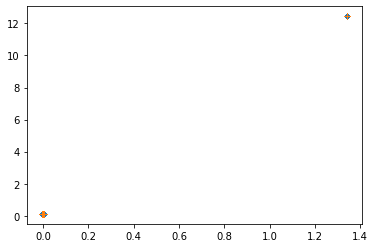

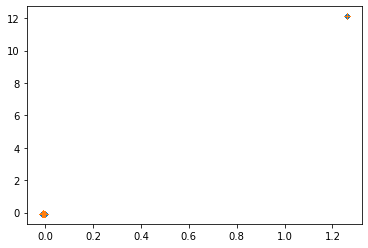

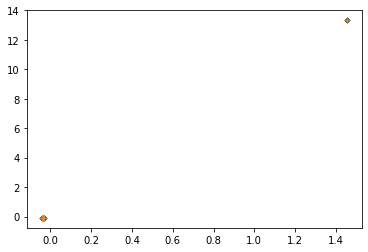

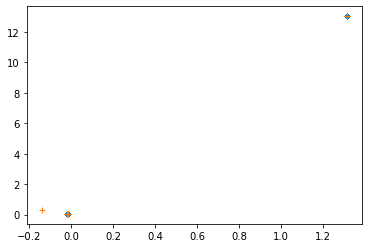

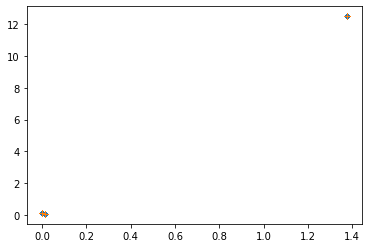

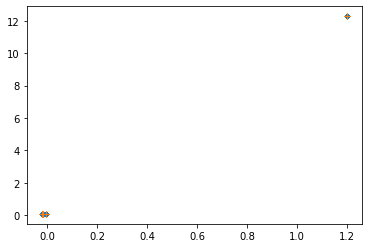

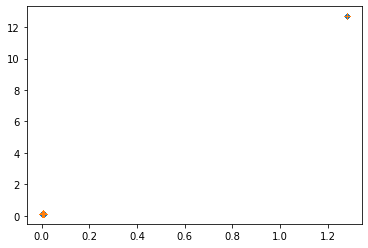

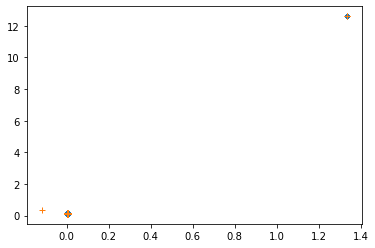

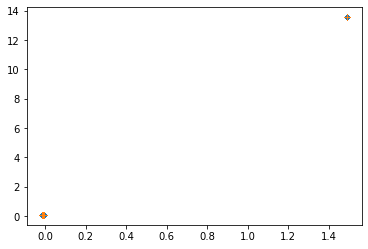

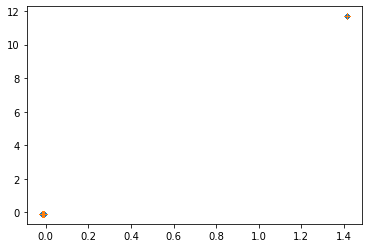

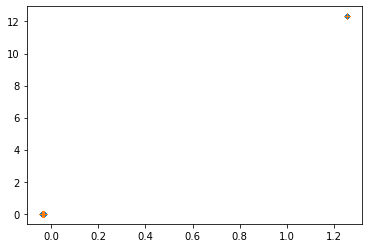

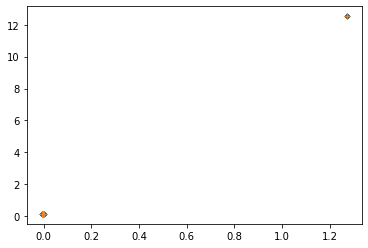

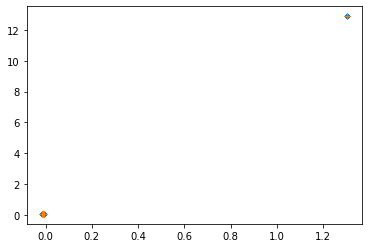

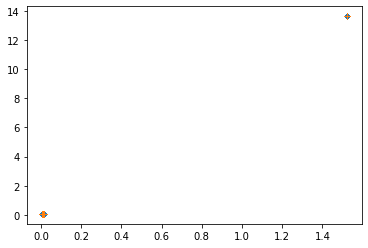

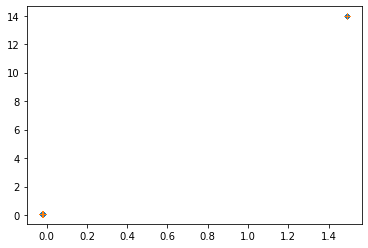

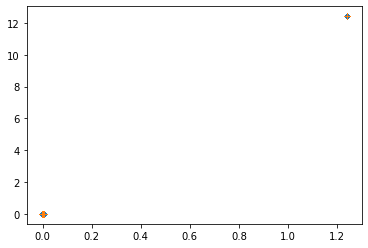

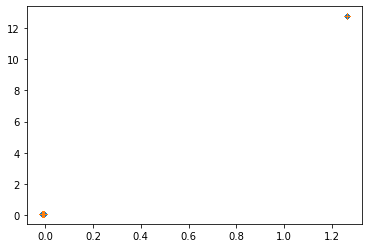

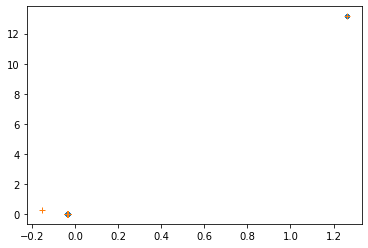

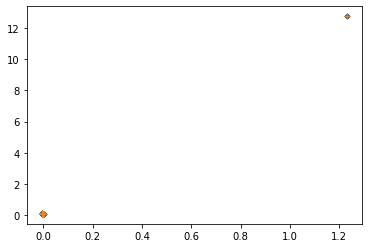

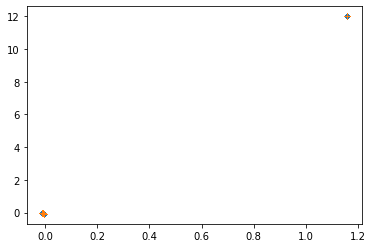

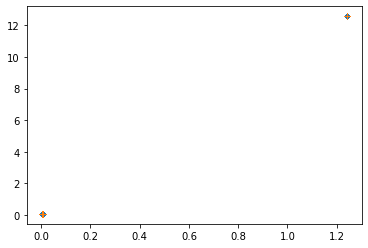

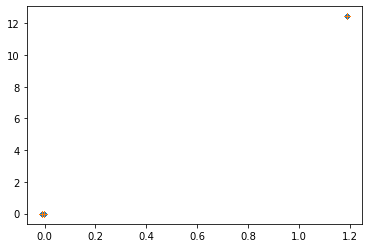

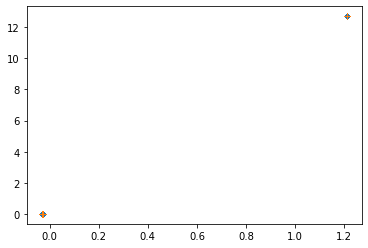

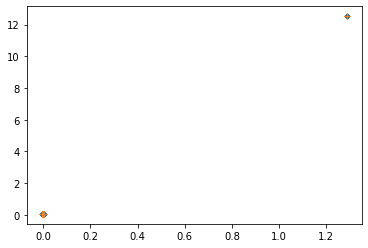

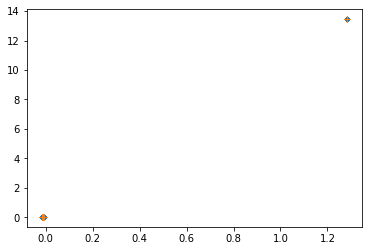

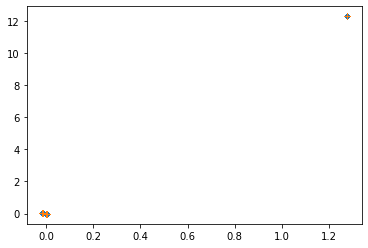

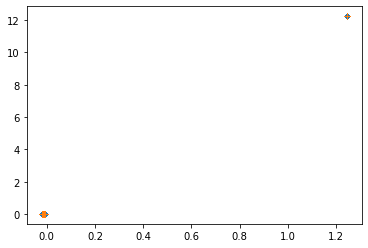

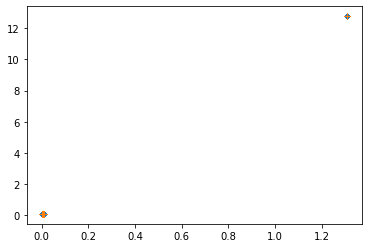

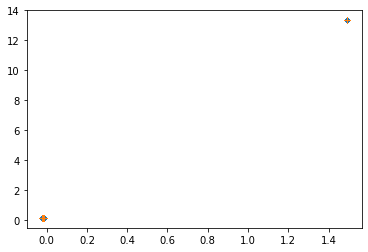

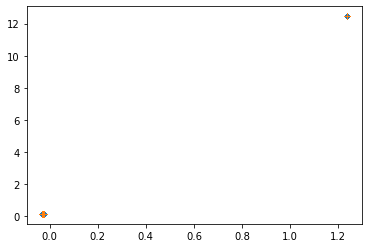

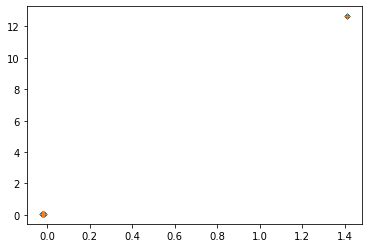

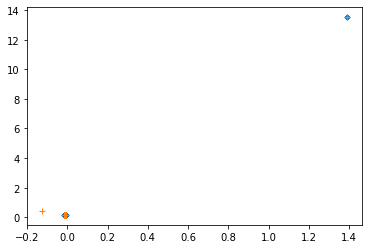

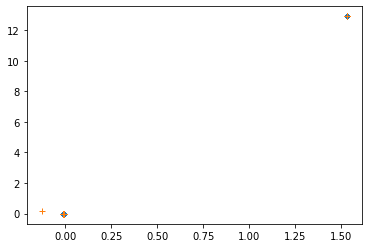

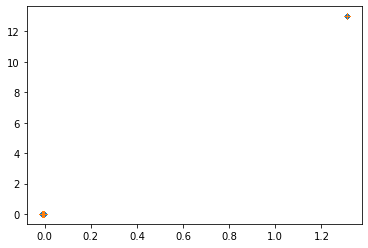

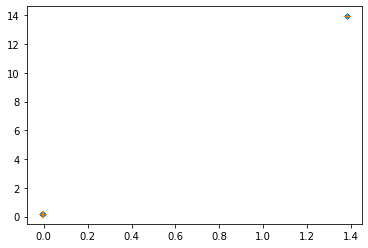

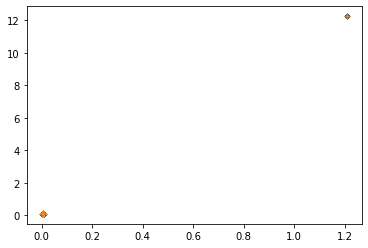

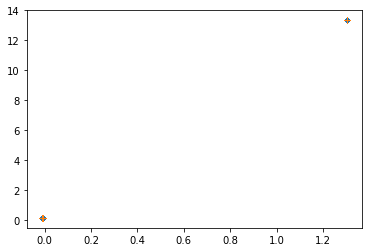

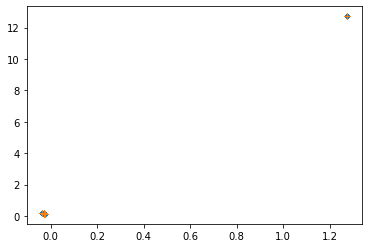

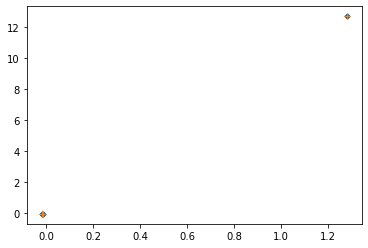

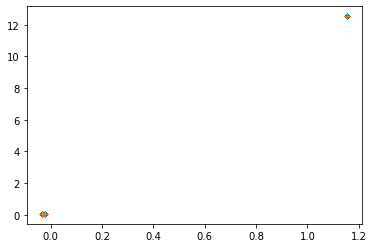

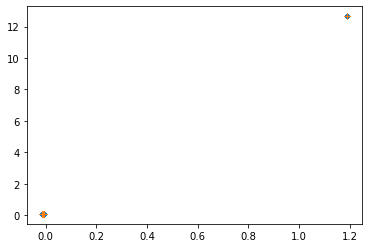

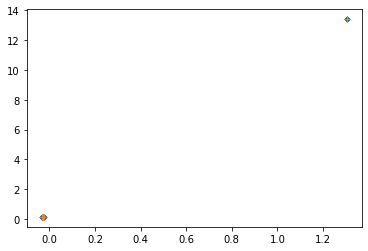

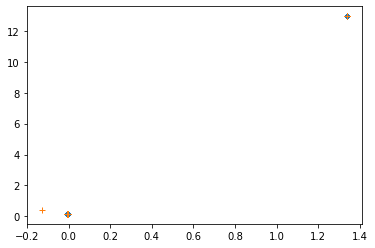

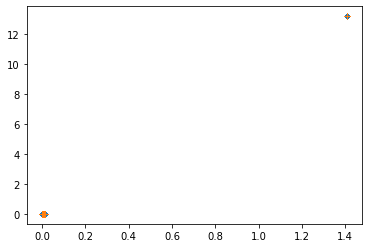

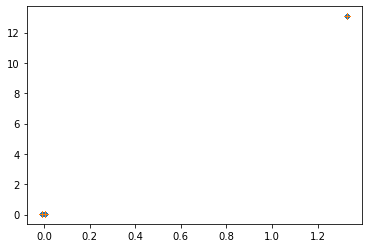

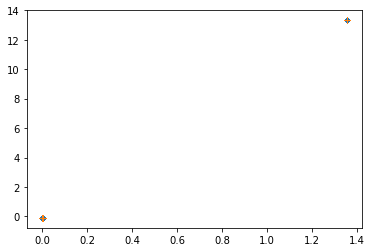

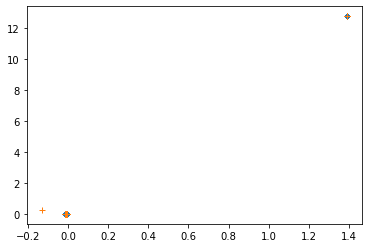

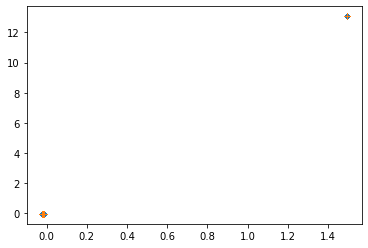

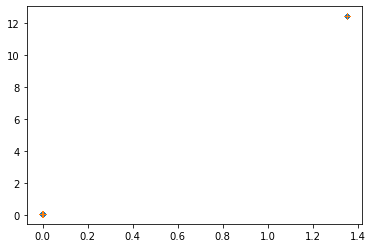

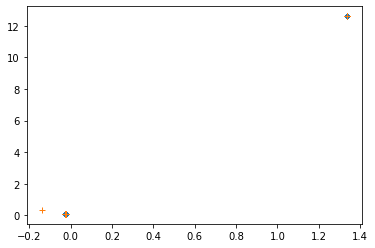

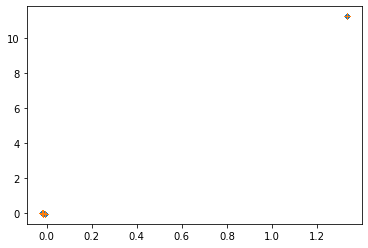

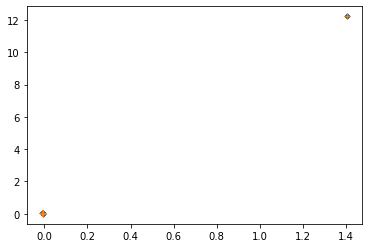

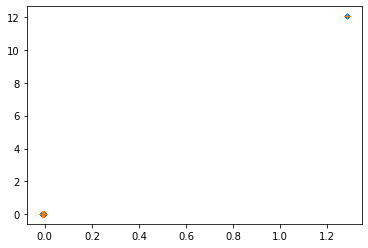

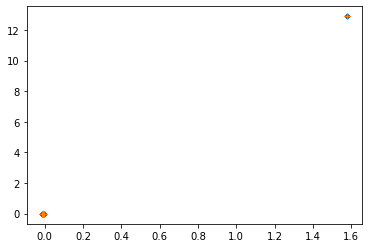

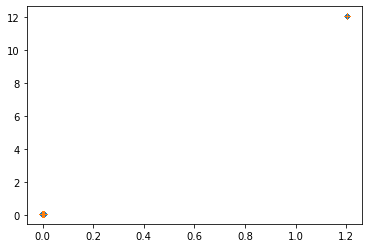

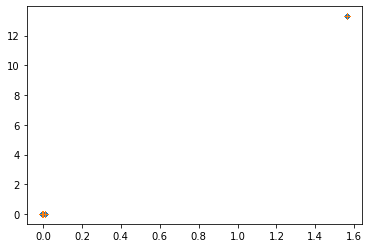

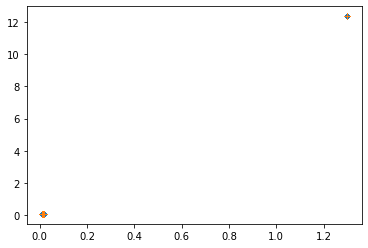

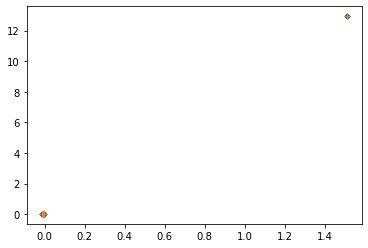

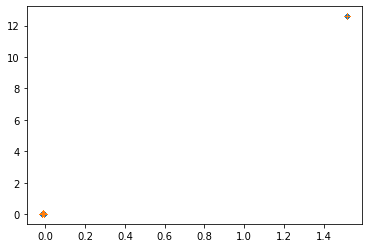

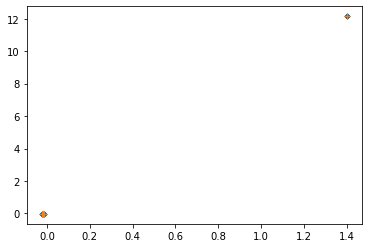

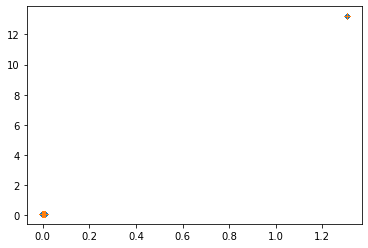

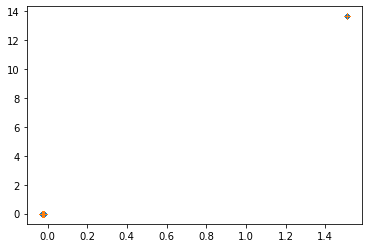

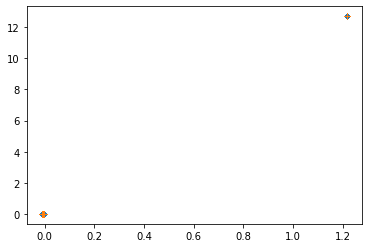

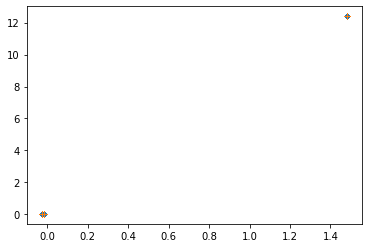

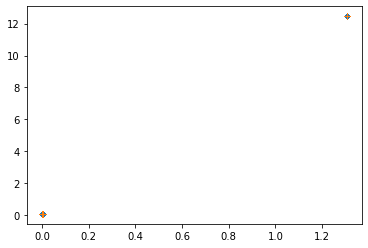

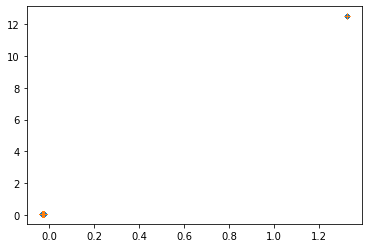

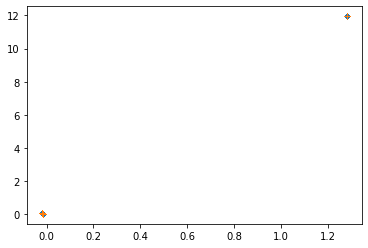

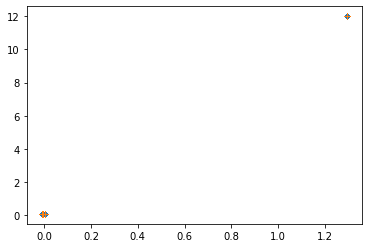

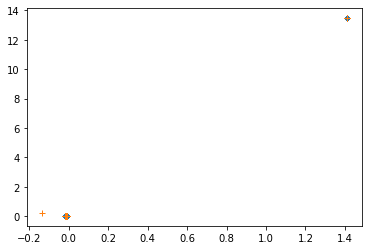

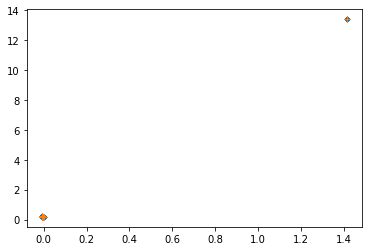

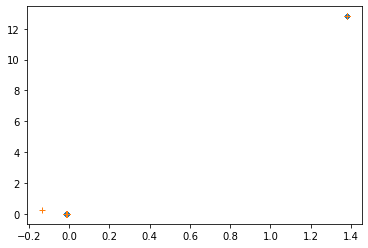

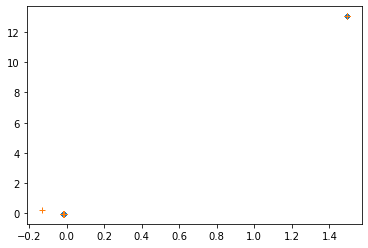

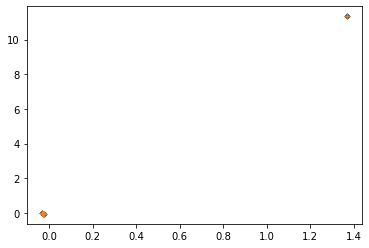

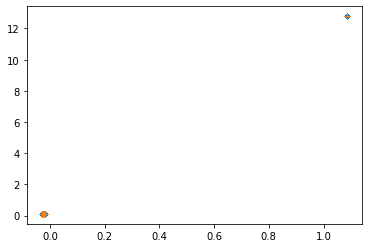

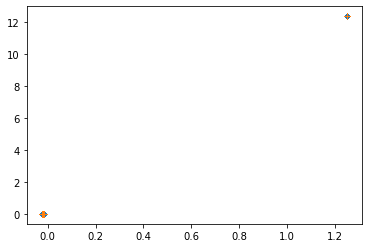

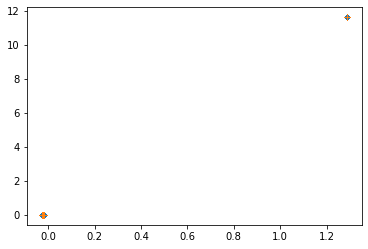

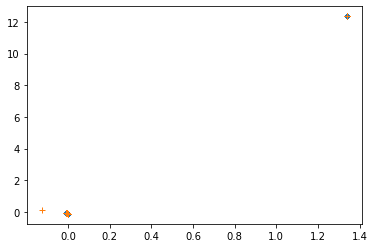

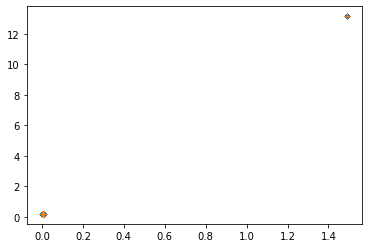

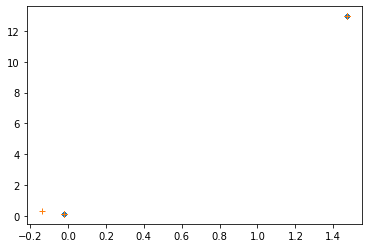

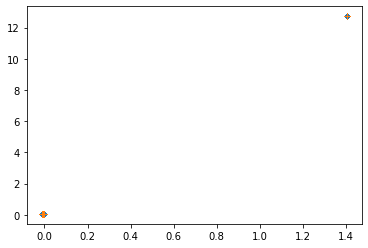

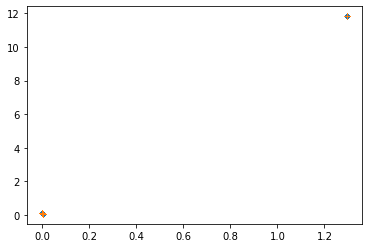

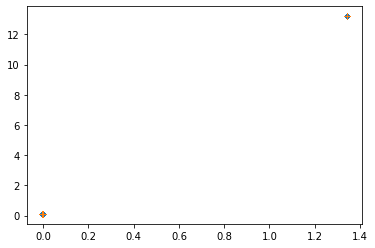

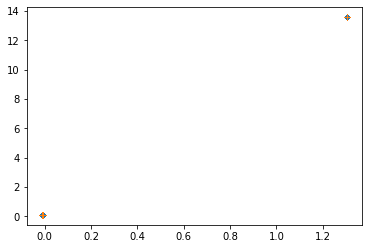

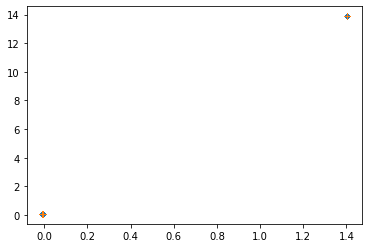

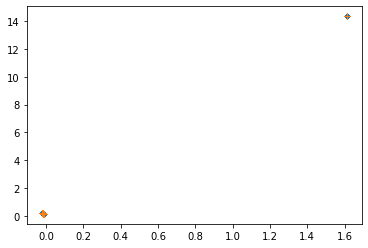

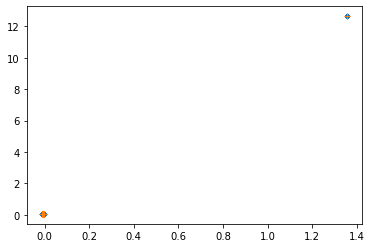

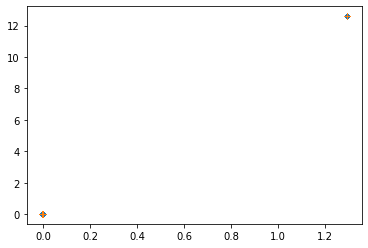

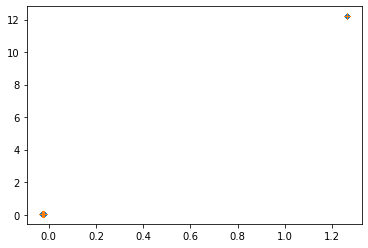

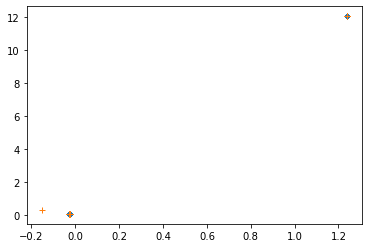

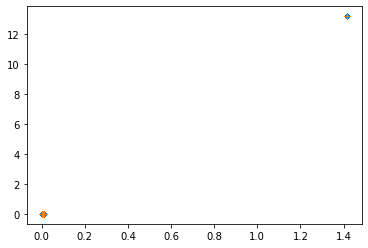

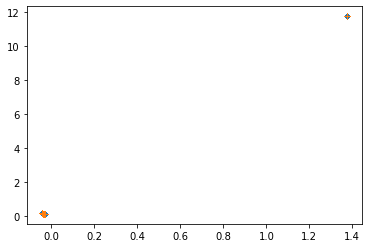

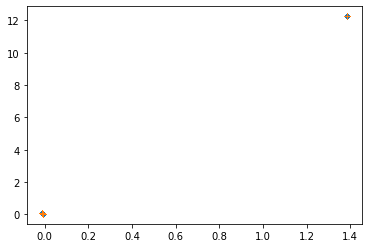

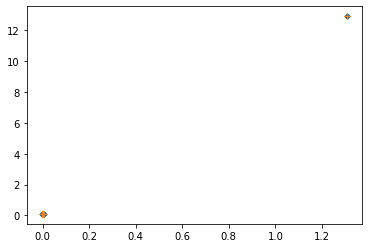

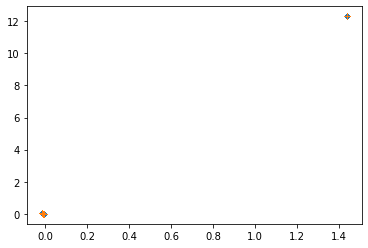

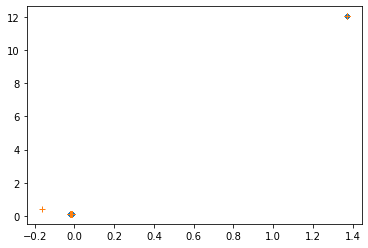

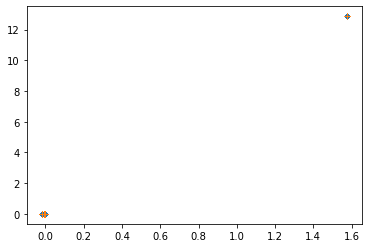

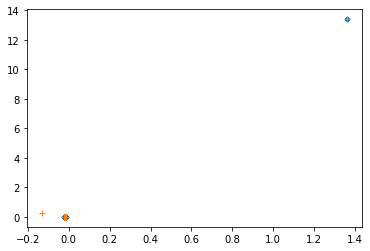

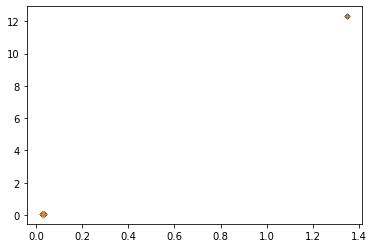

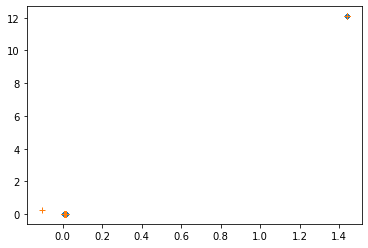

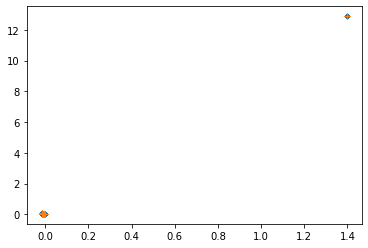

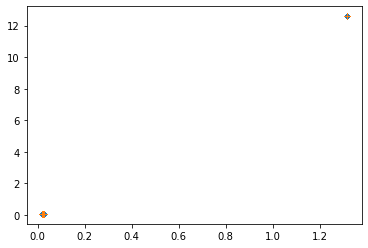

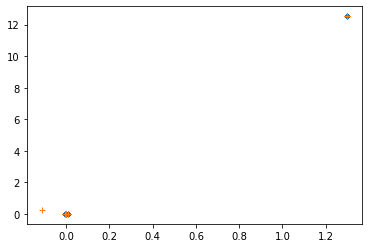

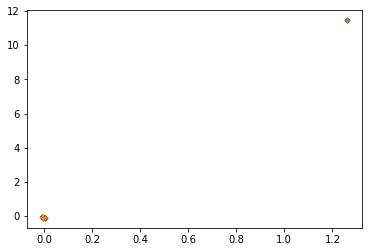

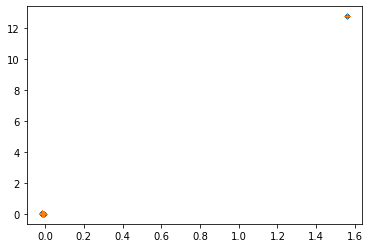

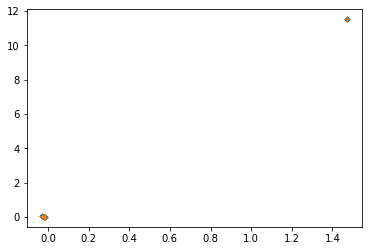

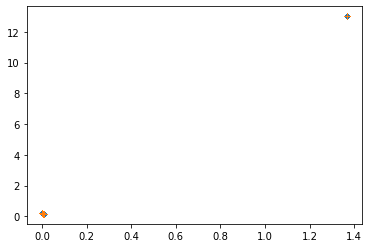

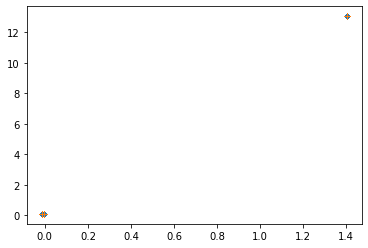

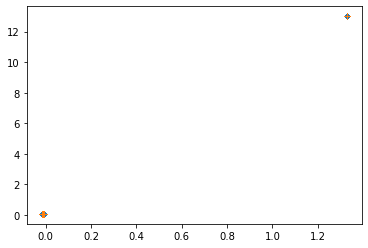

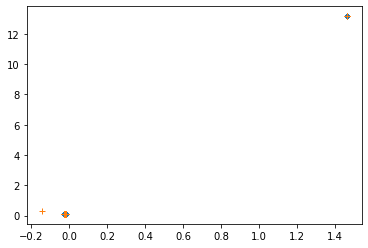

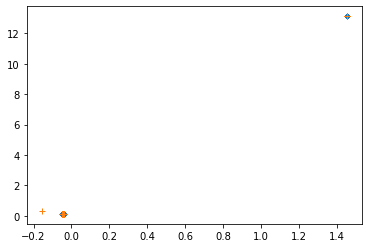

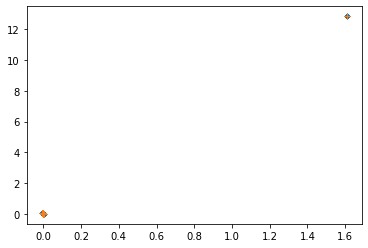

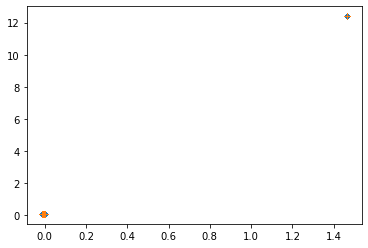

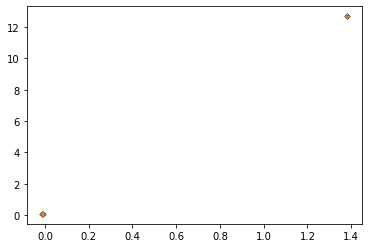

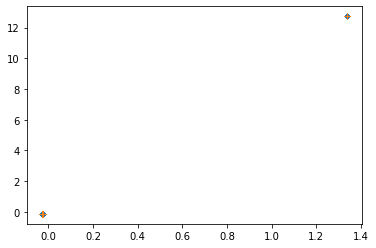

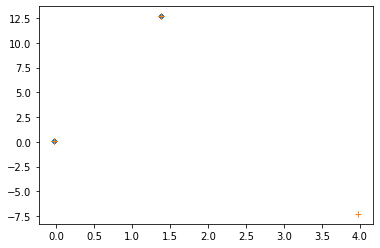

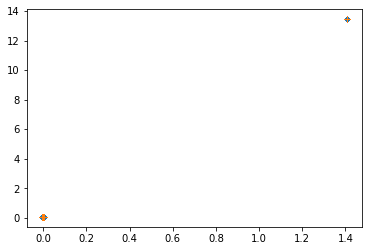

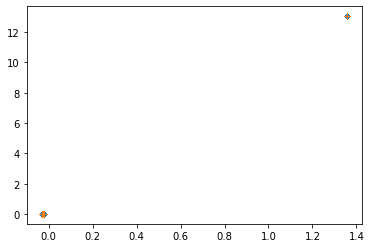

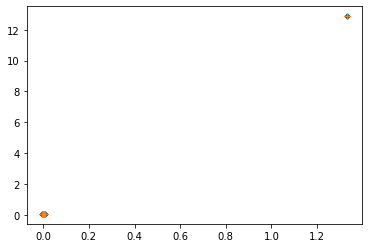

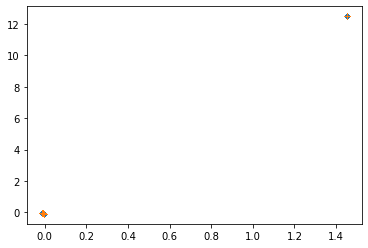

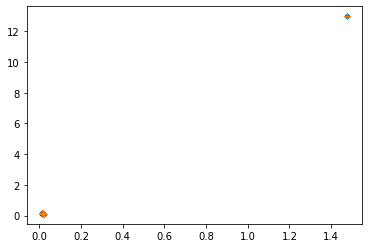

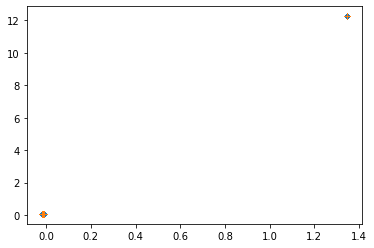

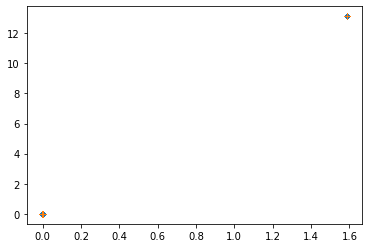

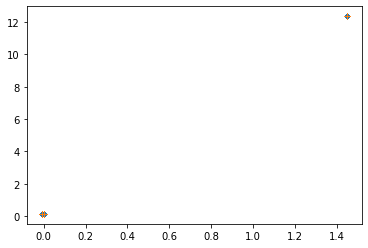

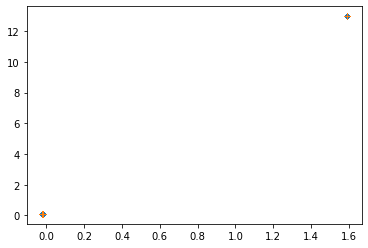

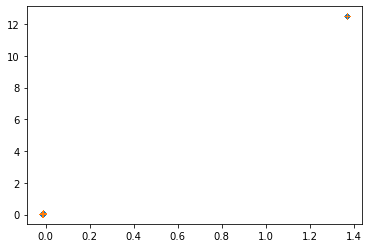

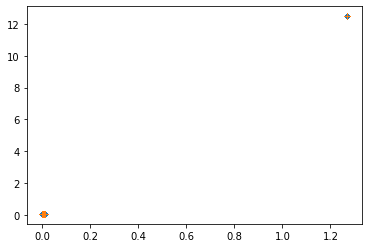

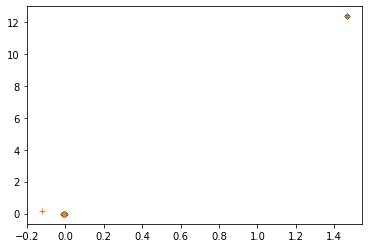

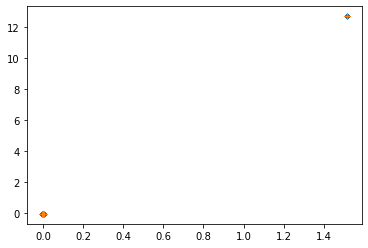

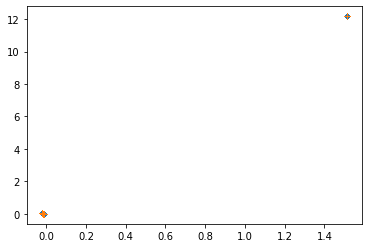

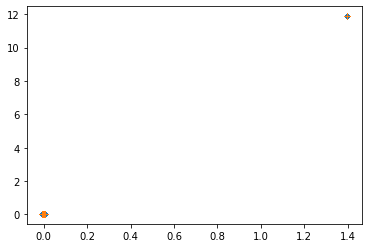

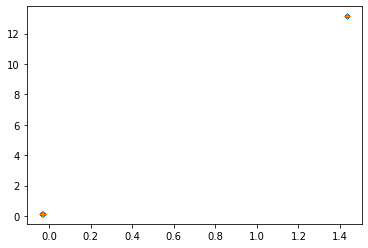

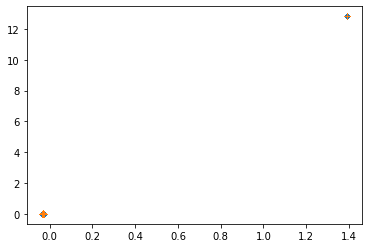

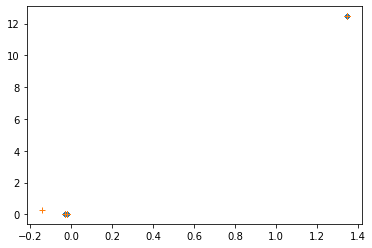

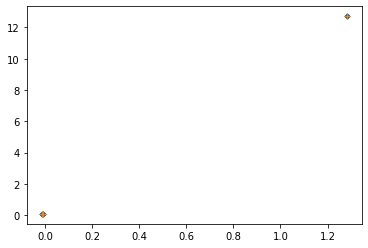

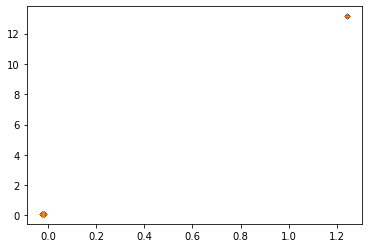

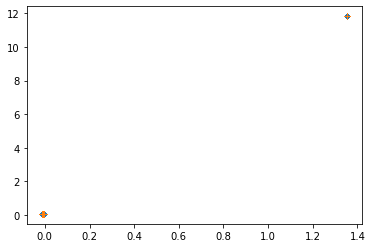

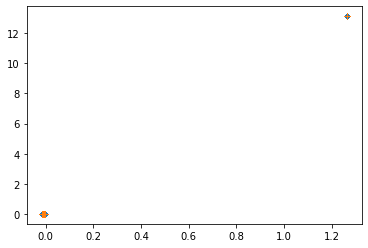

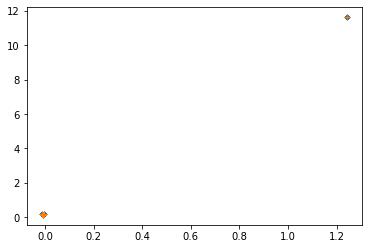

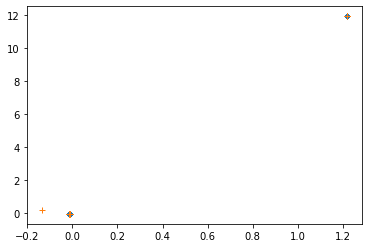

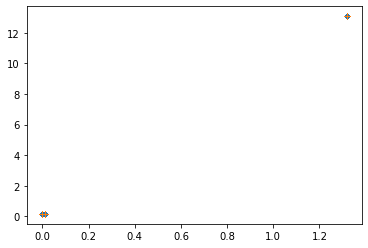

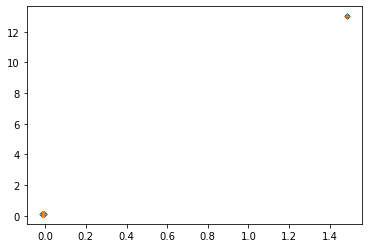

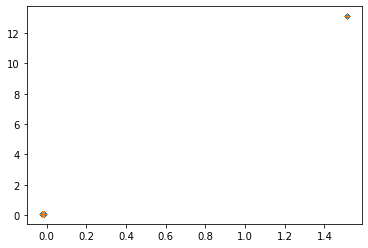

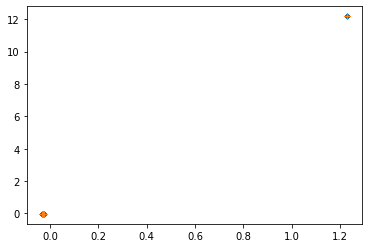

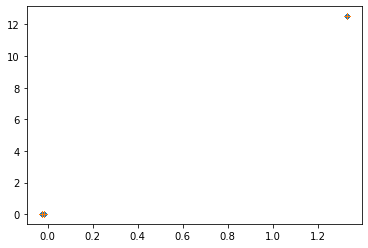

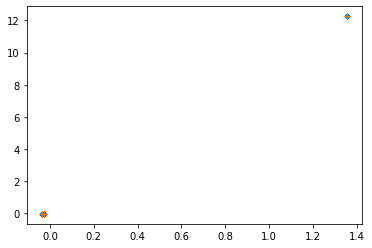

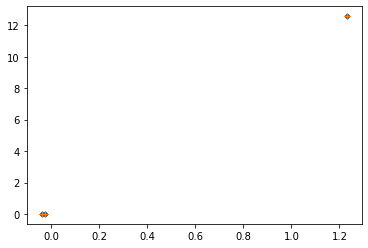

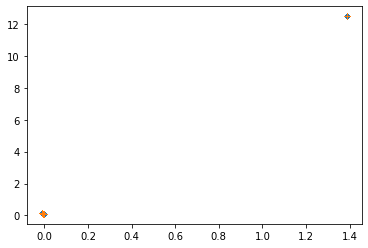

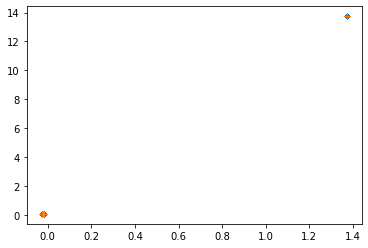

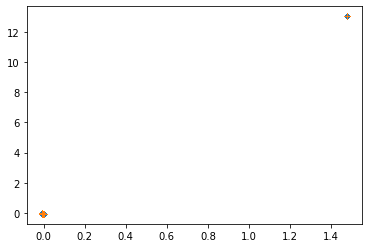

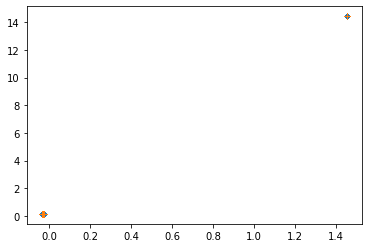

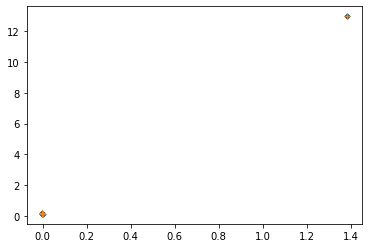

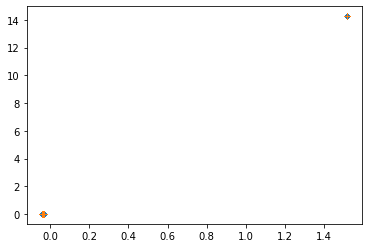

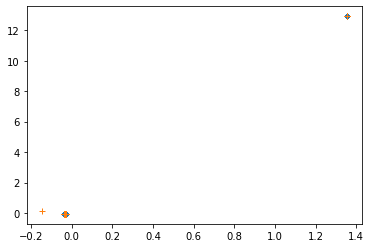

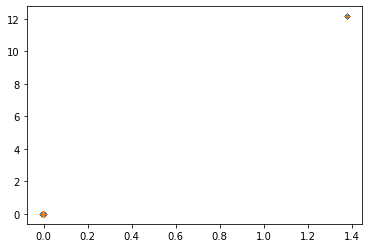

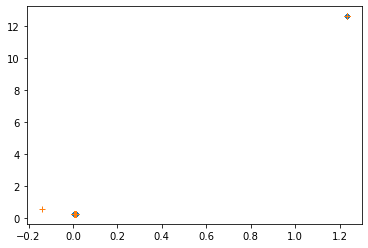

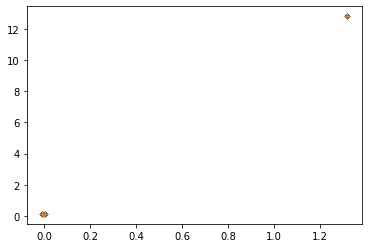

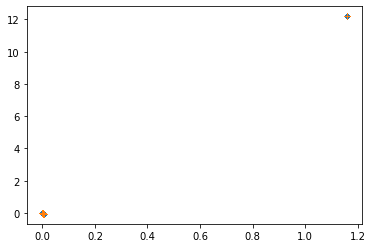

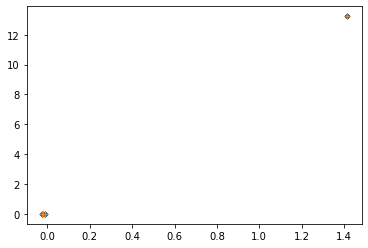

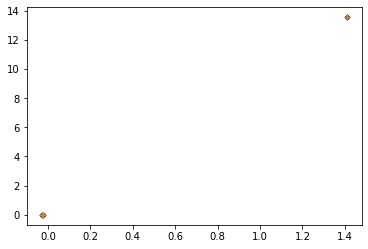

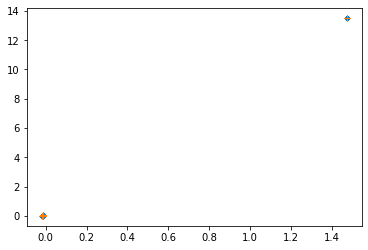

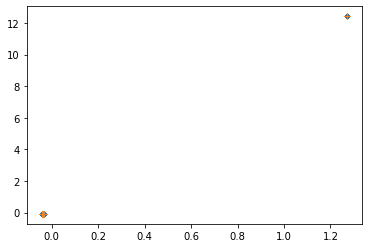

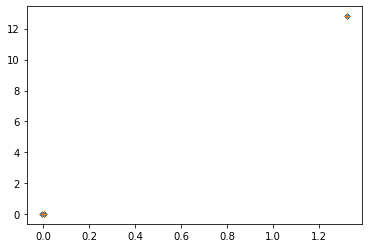

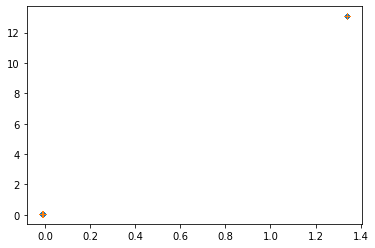

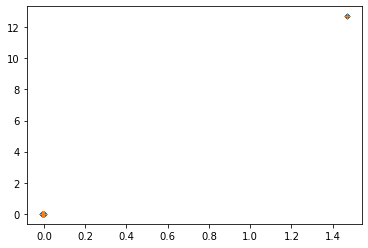

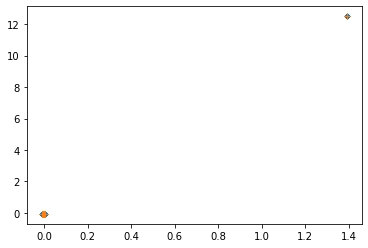

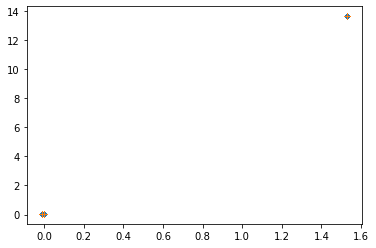

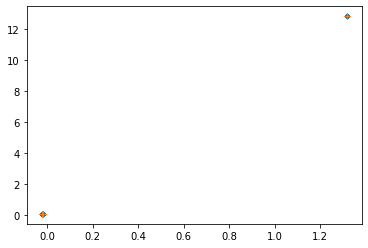

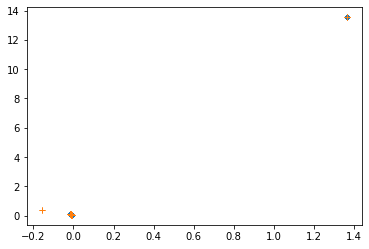

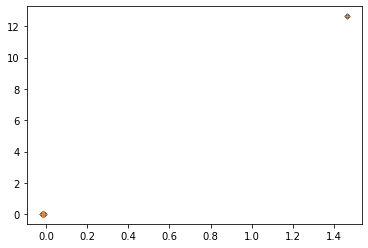

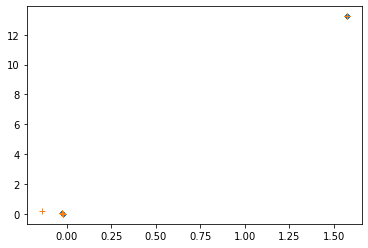

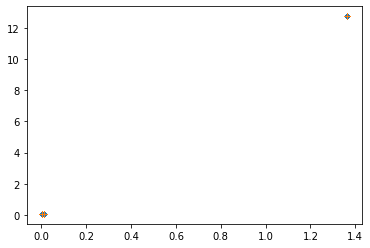

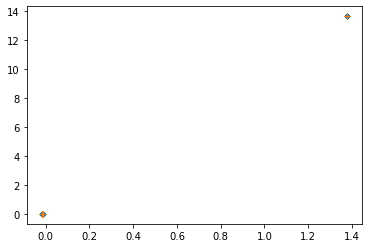

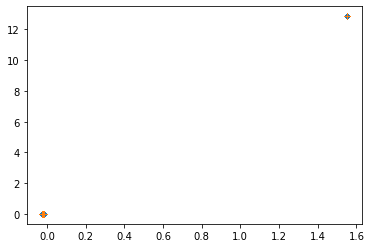

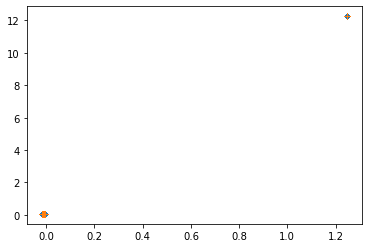

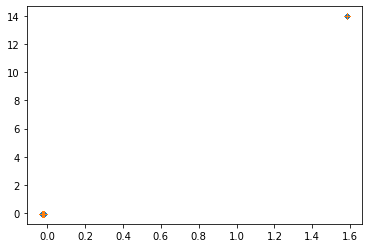

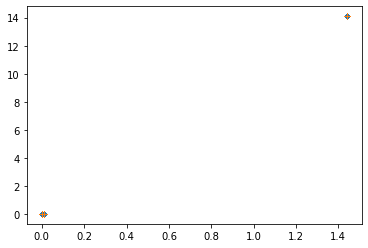

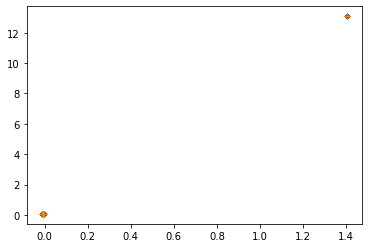

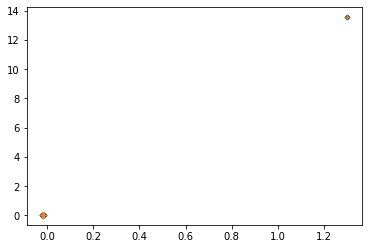

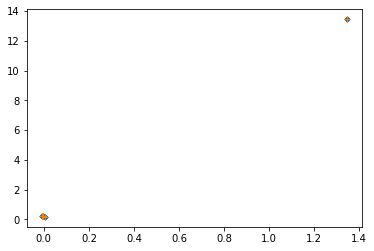

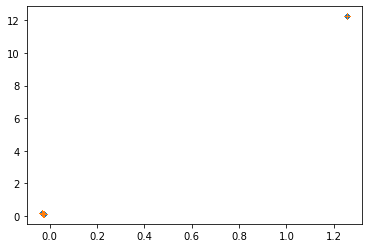

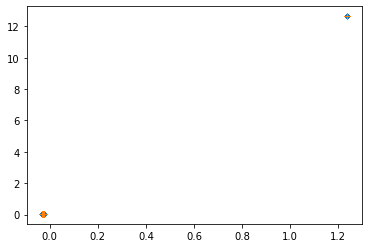

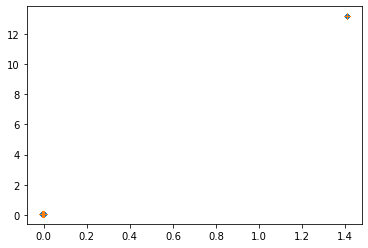

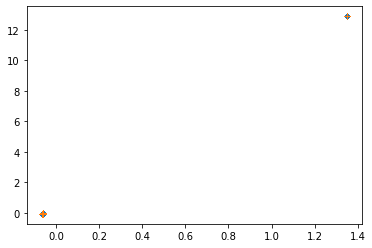

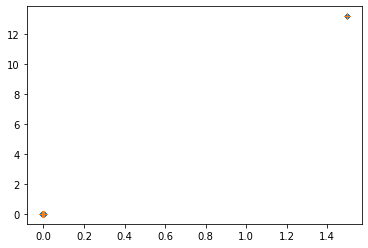

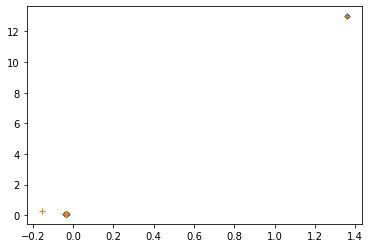

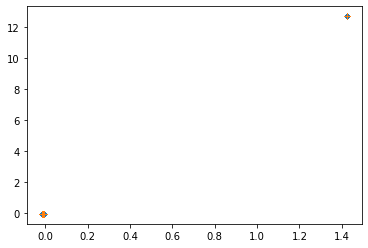

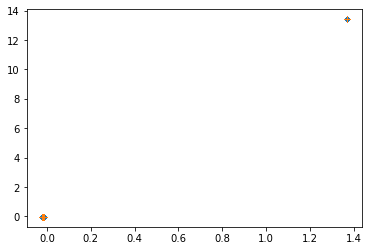

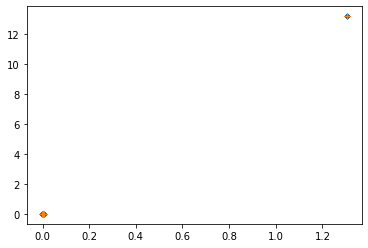

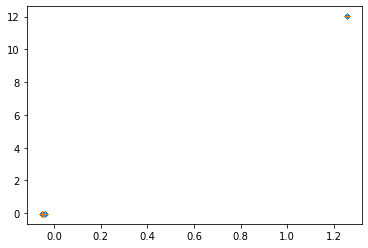

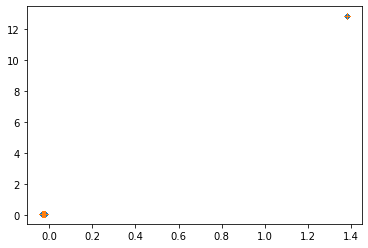

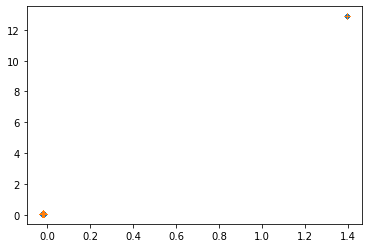

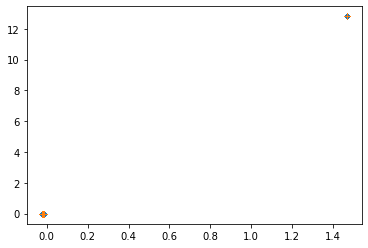

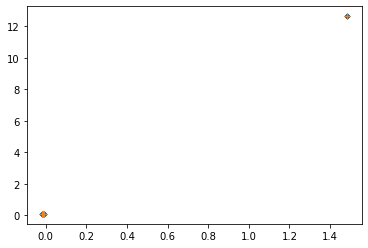

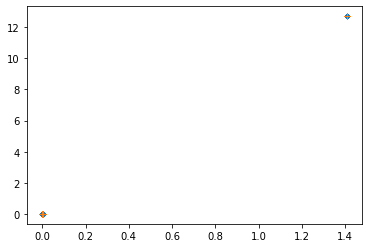

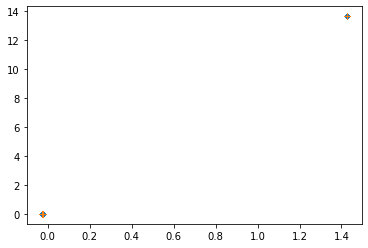

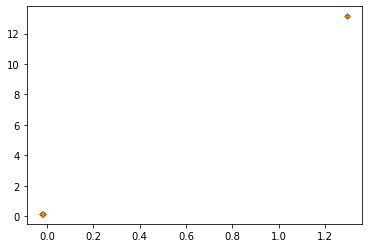

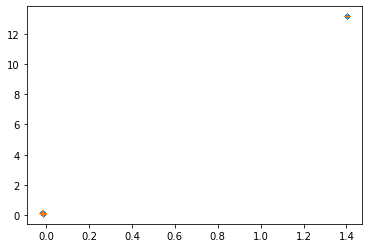

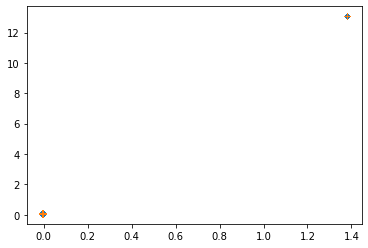

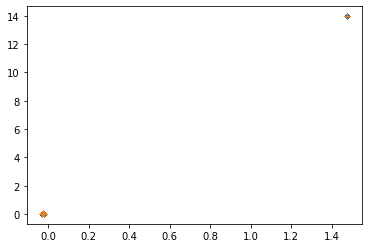

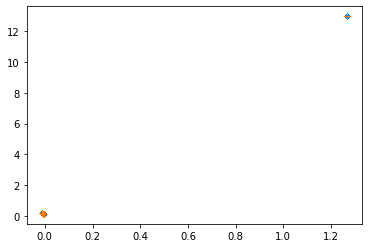

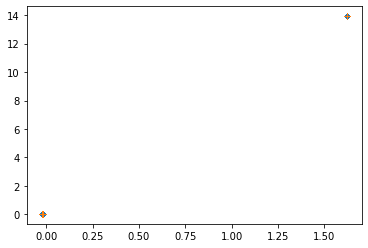

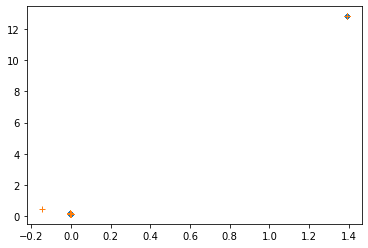

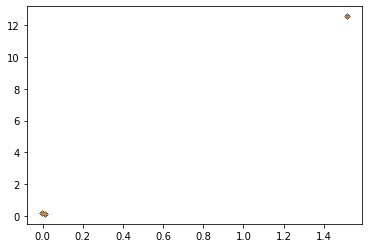

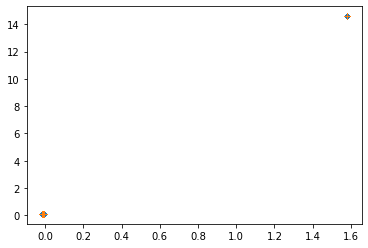

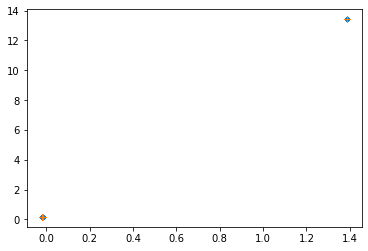

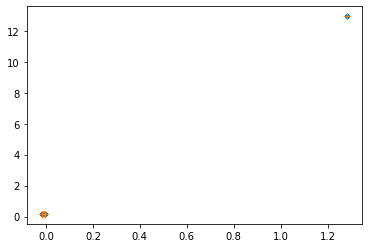

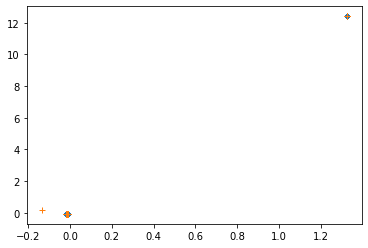

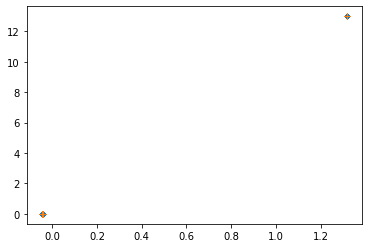

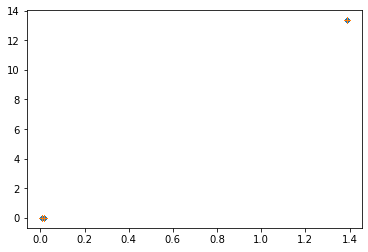

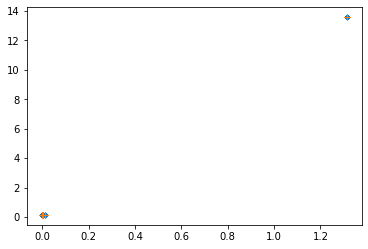

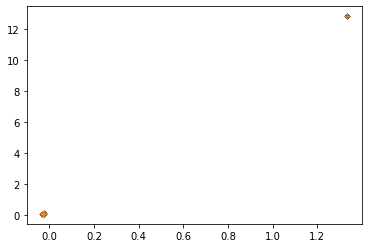

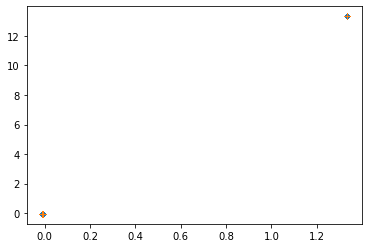

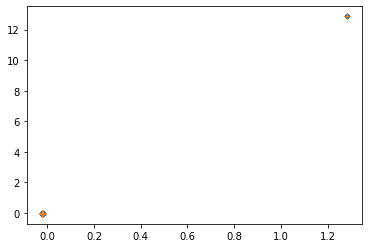

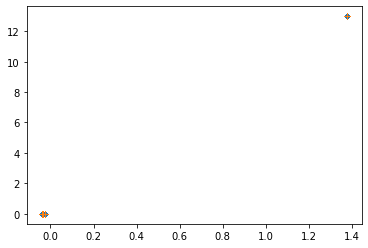

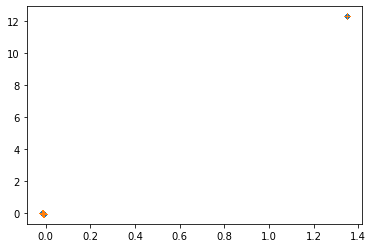

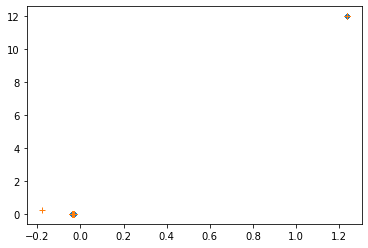

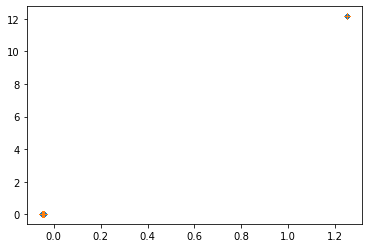

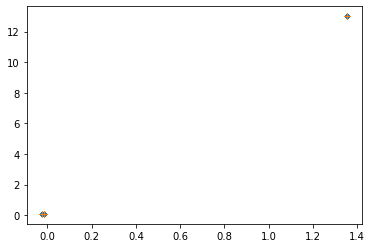

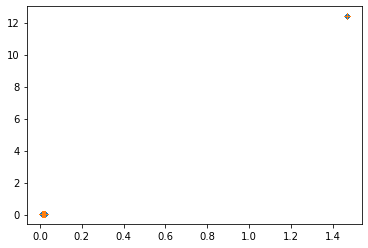

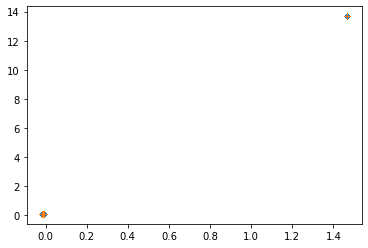

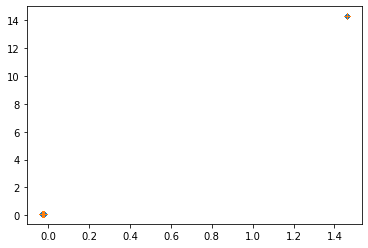

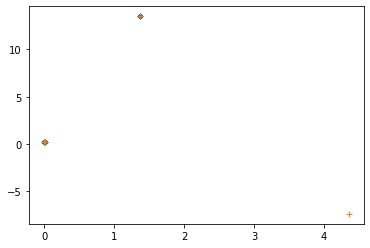

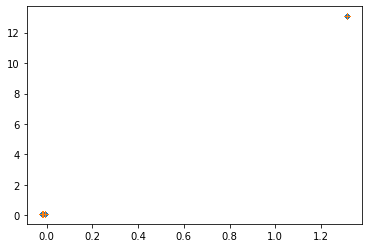

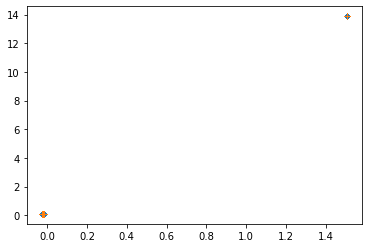

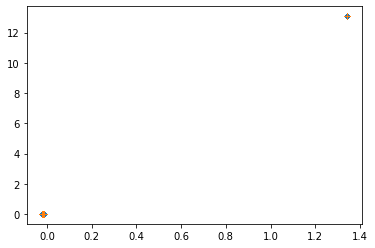

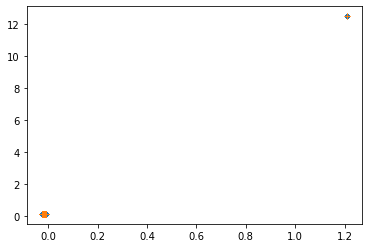

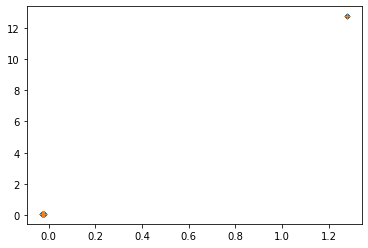

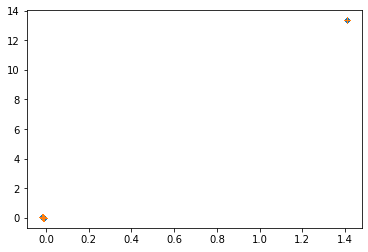

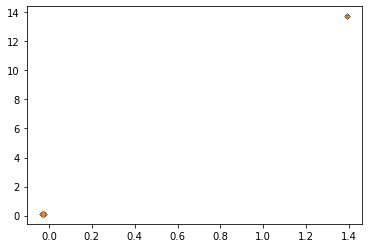

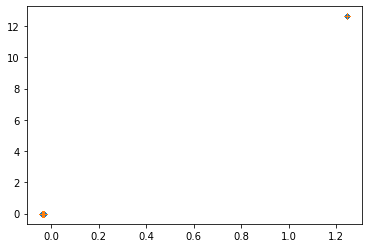

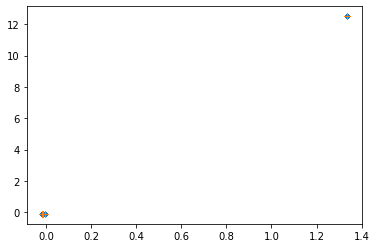

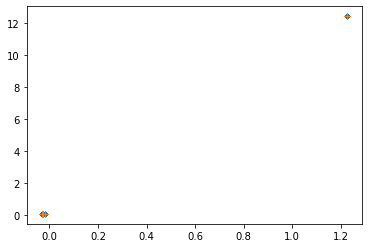

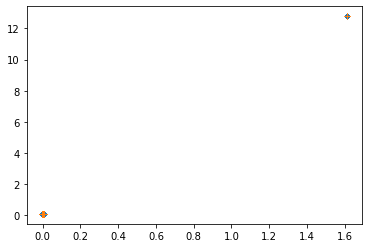

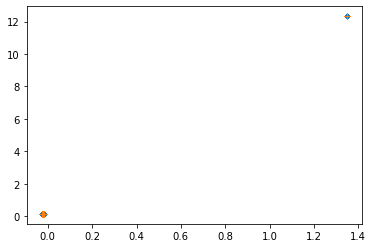

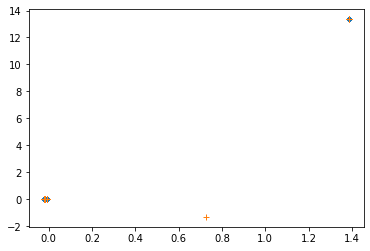

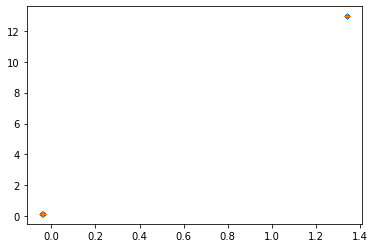

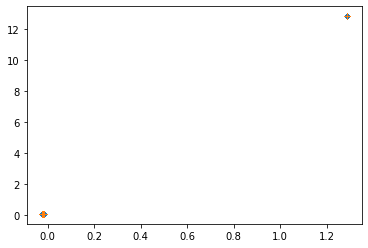

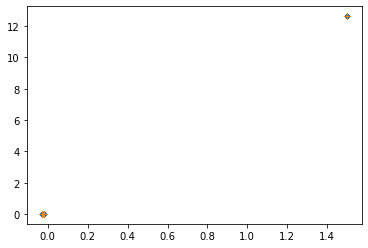

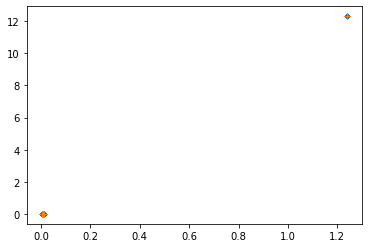

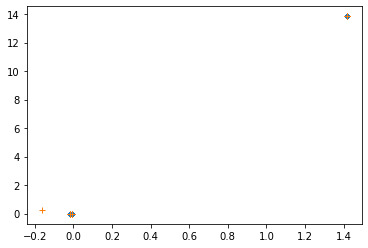

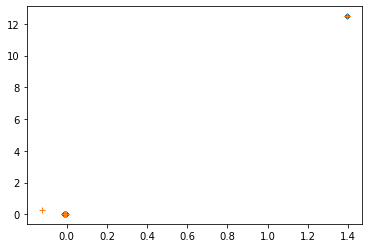

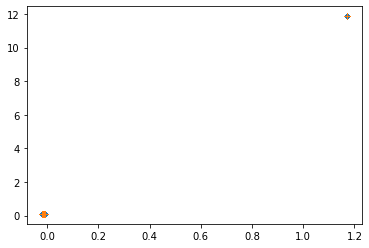

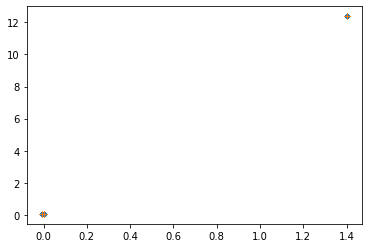

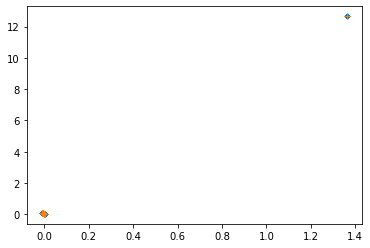

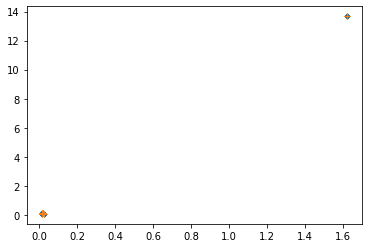

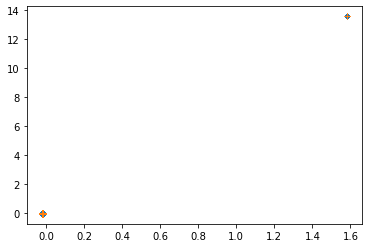

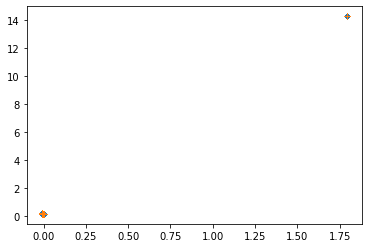

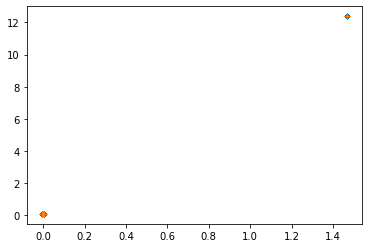

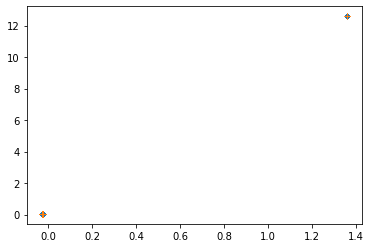

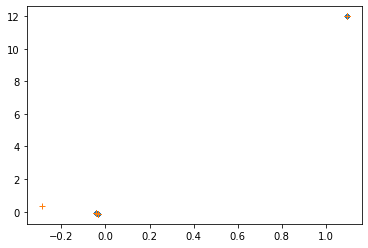

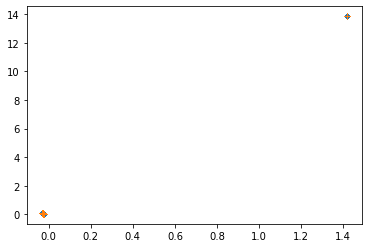

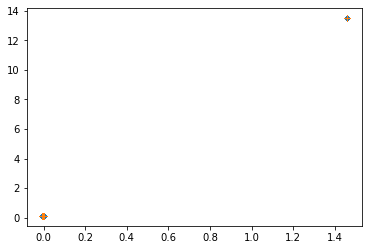

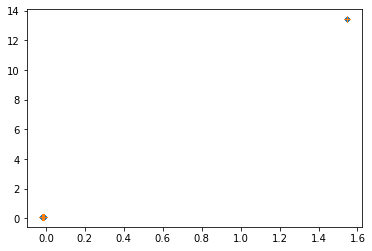

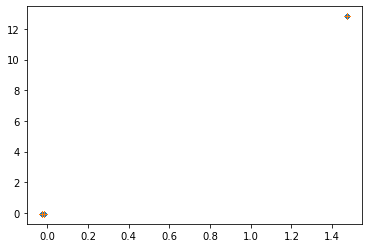

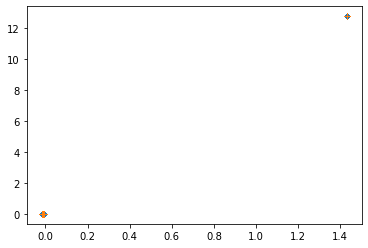

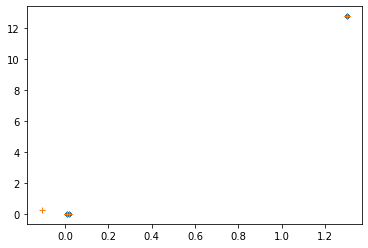

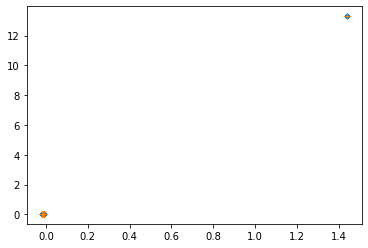

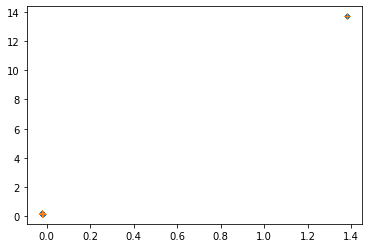

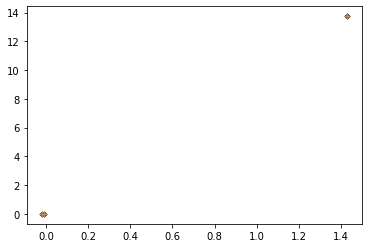

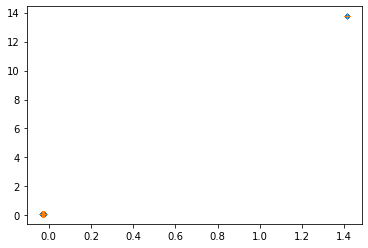

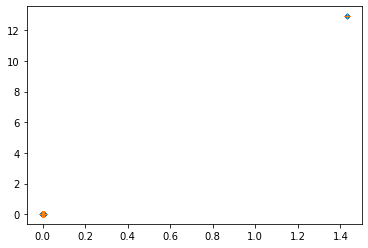

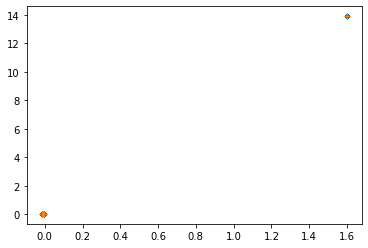

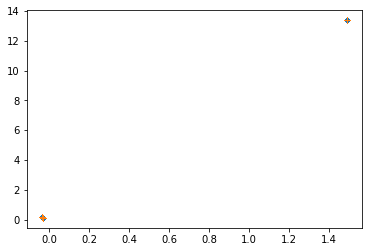

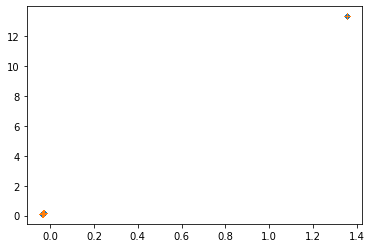

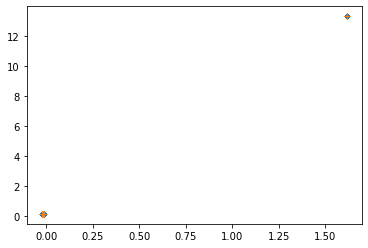

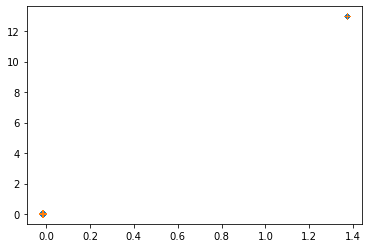

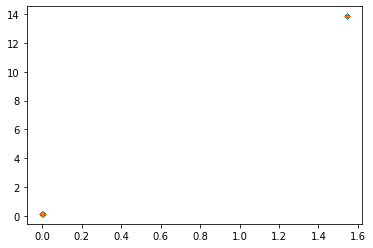

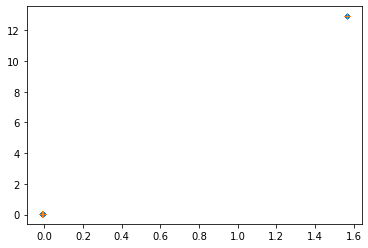

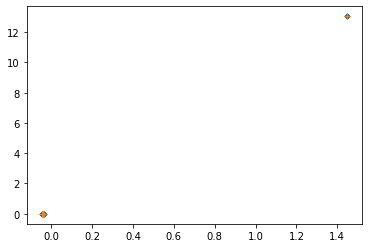

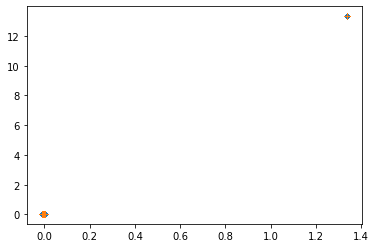

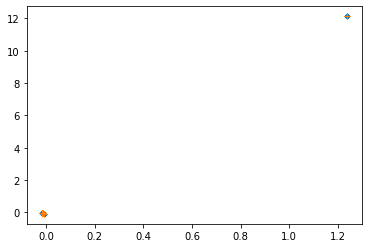

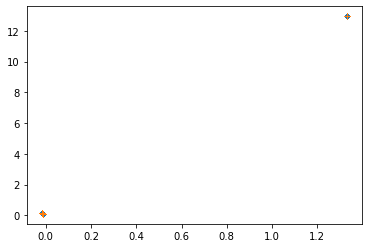

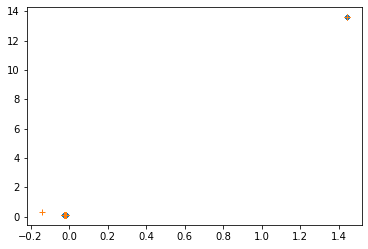

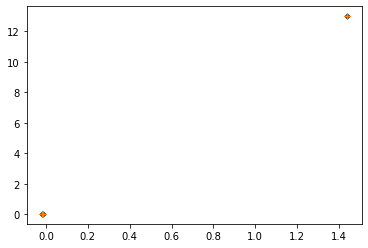

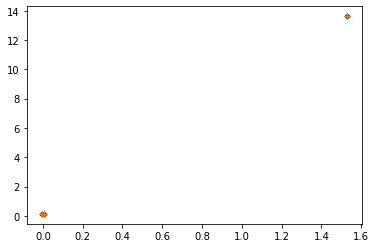

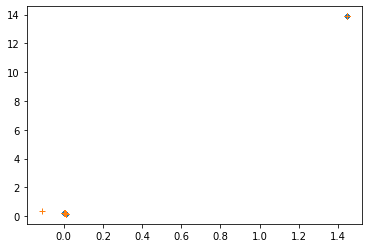

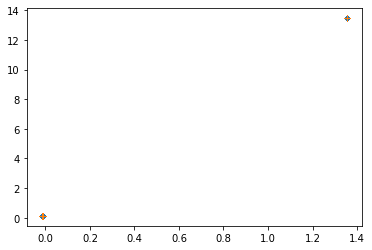

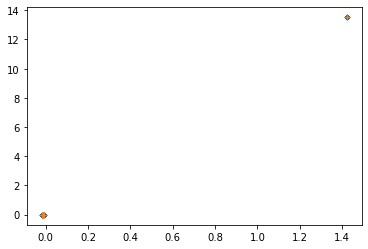

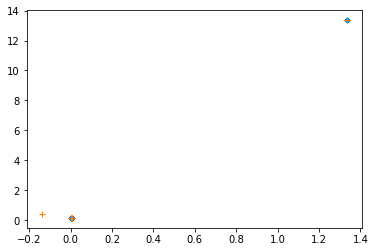

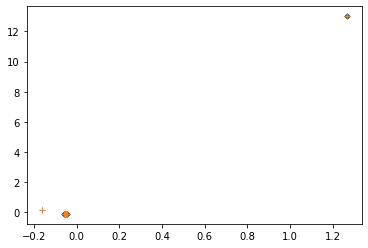

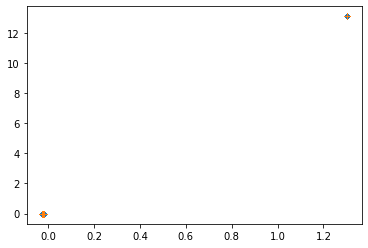

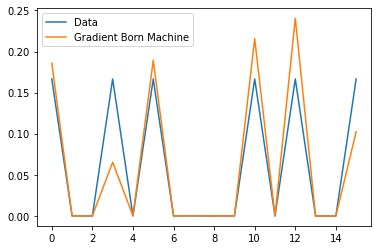

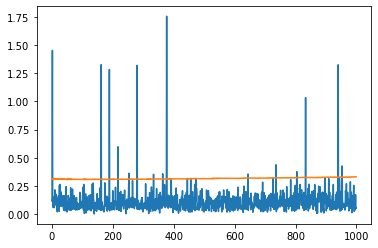

In [68]:
# Keep training! see what's gonna happen
lr = 1e-3
beta1 = 0.5
optimizerD = torch.optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(G.parameters(), lr=0.01, betas=(beta1, 0.999)) #The parameters are the thetas


# Training Loop
%matplotlib inline
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
TVs = []
lowest_tv = np.inf
best_theta_list = None
iters = 0
k_D=20
k_G=1

num_iters = 1000
print("Starting Training Loop...")
# For each epoch
for itr in range(num_iters):
    ############################
    # (1) Update D network
    ###########################
    for i_D in range(k_D):
        Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_data, m)).float() # Sample to get real data
        # Generate fake image batch with G
        #X_m_n, G_grad_dummy = G() # already a tensor (require_grads=False)
        
        X_m_n = torch.tensor(sample_from_prob(basis_m_n, np.max(p_data)-p_data, m)).float()
        
        concact_2m_n = torch.cat([Y_m_n, X_m_n.detach()])
        label = np.concatenate([np.ones(m), np.zeros(m)])
        inds = np.array([i for i in range(2*m)])
        np.random.shuffle(inds) # inplace
        label = label[inds]
        concact_2m_n = concact_2m_n[inds]
        
        D.zero_grad()
        # Forward pass 
        fconcact_2m_n = D(concact_2m_n)

        fY_m_n = fconcact_2m_n[label==1]
        fX_m_n = fconcact_2m_n[label==0]

        neg_delta_R = -discriminator_MCR_loss(fX_m_n, fY_m_n, d, m, eps) # differentiable
        # Calculate D's gradients for this batch, accumulated (summed) with previous gradients
        neg_delta_R.backward()
        # Update D
        optimizerD.step()
        D_losses.append(-neg_delta_R)
        print('D delta_R: ', -neg_delta_R) 

    ############################
    # (2) Update G network, fixing Discriminator
    ###########################
    Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_data, 160)).float()
    fY_m_n = D(Y_m_n)
    G.generate_batch_size = 160 # This only affects the learning of the Discriminator, here only for visualization purposes 
    
    for i_G in range(k_G):
        G.zero_grad() # clear the gradients for G.theta_list
        X_m_n, G_grad_dummy = G() # already a tensor (require_grads=False)
        # The generator implicitly refer to the Discriminator for gradient calculations
        G_grad_dummy.backward() # G has perfect knowledge of the p_data distribution
        #print('G thetalist grad', G.theta_list.grad)
        # theta_list parameters' gradients are now loaded to the theta_list torch parameter

        # Update G
        optimizerG.step()
    
        concat_2m_n = torch.cat([Y_m_n, X_m_n.detach()], axis=0)
        D.eval()
        fconcat_2m_n = D(concat_2m_n) 
        D.train()
        fY_m_n = fconcat_2m_n[0:Y_m_n.shape[0],:]
        fX_m_n = fconcat_2m_n[Y_m_n.shape[0]:,:]

        delta_R = discriminator_MCR_loss(fX_m_n, fY_m_n, d, m, eps) # differentiable
        print('G delta_R: ', delta_R)
        pl = G.bm.pdf_actual(G.theta_list.detach().numpy())
        tv = TV(pl, p_data)
        TVs.append(tv)
        print('TV', tv)
        G_losses.append(delta_R)

        if tv < lowest_tv:
            lowest_tv = tv
            best_theta_list = copy.deepcopy(G.theta_list.detach().numpy())
        
        if i_G%100==0:
            if output_dim == 3:
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.scatter(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], fY_m_n.detach()[:, 2])
                ax.scatter(fX_m_n.detach()[:, 0], fX_m_n.detach()[:, 1], fX_m_n.detach()[:, 2])
                fig.savefig(str(itr)+'_'+str(i_G)+'.png', bbox_inches='tight')
            elif output_dim == 2:
                fig = plt.figure()
                plt.plot(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], '.')
                plt.plot(fX_m_n.detach()[:, 0], fX_m_n.detach()[:, 1], '+')
                fig.savefig(str(itr)+'_'+str(i_G)+'_g_eval.png', bbox_inches='tight')
            else: #1-dimensional
                fig = plt.figure()
                plt.plot(fY_m_n.detach()[:, 0], np.zeros(m), '.')
                plt.plot(fX_m_n.detach()[:, 0], np.ones(m), '+')
                fig.savefig(str(itr)+'_'+str(i_G)+'_g_eval.png', bbox_inches='tight')
    
pl = G.bm.pdf_actual(G.theta_list.detach().numpy())

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.figure()
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

plt.plot(G_losses)
plt.plot(TVs)

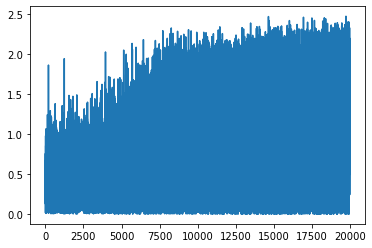

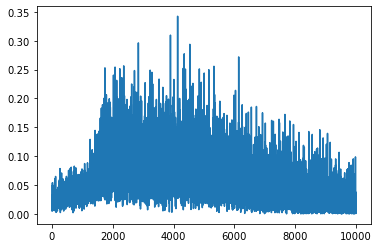

In [29]:
%matplotlib inline
plt.figure()
plt.plot(D_losses)
plt.figure()
plt.plot(G_losses)

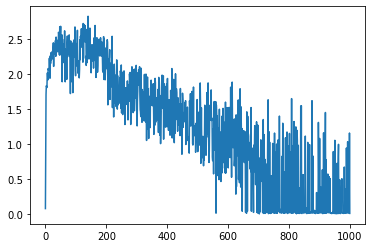

In [86]:
plt.plot(G_losses)

TV 0.7229052382988024


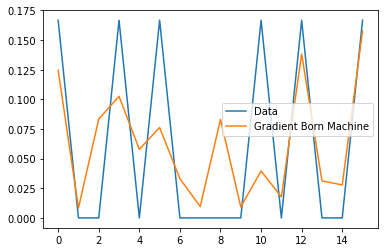

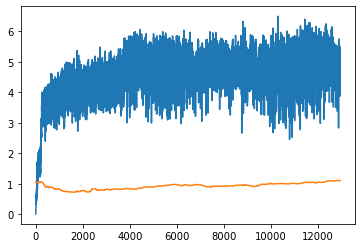

In [60]:
pl = G.bm.pdf_actual(best_theta_list)

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

plt.plot(G_losses)
plt.plot(TVs)

In [31]:
np.save('mcr_real_adversarial_batch_4_10000_iter.npy', best_theta_list)

TV 0.3313121520125537


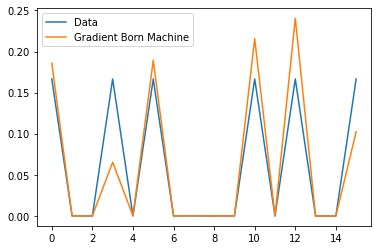

In [74]:
pl = G.bm.pdf_actual(G.theta_list.detach().numpy())

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

<h1> Try with MMD loss

In [ ]:
#Parameters
depth = 4
geometry = (2,2) 
num_bit = np.prod(geometry)
hndim = 2**num_bit

output_dim = 3 # for Discriminator

pairs = get_nn_pairs(geometry) # fully pair-wise entangled
circuit = get_diff_circuit(num_bit, depth, pairs)

# Data distribution
#p_gau = gaussian_pdf(geometry, mu=hndim/2., sigma=hndim/4.)
p_bs = barstripe_pdf(geometry)
p_data = p_bs
d, m, eps = output_dim, 3, 0.1
# Discriminator object
D = Discriminator(num_bit, output_dim)
# Generator object
basis_m_n = binary_basis((num_bit,)) # meaning that each image is already flattened out
G = Q_Generator_theoretical(circuit, basis_m_n, p_bs, D, generate_batch_size=m, error_batch_size=m, 
                            mcr_or_mmd='MMD')


# Setup Adam optimizers for both G and D
lr = 0.01
beta1 = 0.5
optimizerD = torch.optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999)) #The parameters are the thetas

pl = G.bm.pdf_actual(G.theta_list.detach().numpy())

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

In [ ]:
# Training Loop
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
TVs = []
lowest_tv = np.inf
best_theta_list = None
iters = 0
k=3

num_iters = 1000
print("Starting Training Loop...")
# For each epoch
for i in range(num_iters):
    Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_data, m)).float() # Sample to get real data
    ############################
    # (1) Update D network
    ###########################
    
    for j in range(k):
        ## Train with all-real batch
        D.zero_grad()
        # Forward pass real batch through D
        fY_m_n = D(Y_m_n)

        ## Train with all-fake batch
        # Generate fake image batch with G
        X_m_n, G_grad_dummy = G() # already a tensor (require_grads=False)
        fX_m_n = D(X_m_n.detach()) # This is a tensor, but doesn't matter


        neg_delta_R = -discriminator_MCR_loss(fX_m_n, fY_m_n, d, m, eps) # differentiable
        # Calculate D's gradients for this batch, accumulated (summed) with previous gradients
        neg_delta_R.backward()
        # Update D
        optimizerD.step()

    ############################
    # (2) Update G network, fixing Discriminator
    ###########################
    G.zero_grad() # clear the gradients for G.theta_list
    
    # The generator implicitly refer to the Discriminator for gradient calculations
    G_grad_dummy.backward()
    
    # theta_list parameters' gradients are now loaded to the theta_list torch parameter
    
    # Update G
    optimizerG.step()

    # Output training stats
    if i % 5 == 0:
        print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
              % (i, num_iters, 0, 0,
                 -neg_delta_R, -neg_delta_R))

    # Save Losses for plotting later
    G_losses.append(-neg_delta_R)
    #D_losses.append(delta_R)
    print('delta_R: ', -neg_delta_R)
    pl = G.bm.pdf_actual(G.theta_list.detach().numpy())
    tv = TV(pl, p_data)
    print('TV', tv)
    TVs.append(tv)
    if tv < lowest_tv:
        lowest_tv = tv
        best_theta_list = copy.deepcopy(G.theta_list.detach().numpy())


pl = G.bm.pdf_actual(G.theta_list.detach().numpy())

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

plt.plot(G_losses)
plt.plot(TVs)

In [ ]:
G.theta_list.detach().numpy()==best_theta_list

In [ ]:
best_theta_list

In [ ]:
pl = G.bm.pdf_actual(G.theta_list.detach().numpy())

tv = TV(pl, p_data)
print('TV', tv)

# display
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()

plt.plot(G_losses)
plt.plot(TVs)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], fY_m_n.detach()[:, 2])
ax.scatter(fX_m_n.detach()[:, 0], fX_m_n.detach()[:, 1], fX_m_n.detach()[:, 2])

In [ ]:
plt.plot(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], '.')

In [ ]:
fY_m_n

In [ ]:
fY_m_n.detach().numpy()

In [ ]:
fY_m_n

In [ ]:
plt.hist(packnbits(sample_from_prob(basis_m_n, p_data, 120)), bins=30)

In [ ]:
plt.hist(packnbits(sample_from_prob(basis_m_n, pl, m)), bins=30)

In [ ]:
Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_gau, m)).float()
fY_m_n = D(Y_m_n)
X_m_n = G()

<h1> Run sanity check

In [ ]:
d, m, eps = output_dim, 120, 0.01
Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_gau, m)).float() # Sample to get real data
D.zero_grad()
fY_m_n = D(Y_m_n)
X_m_n, G_dummy = G()
X_m_n
fX_m_n = D(X_m_n.detach())
fX_m_n
neg_delta_R = -discriminator_MCR_loss(fX_m_n, fY_m_n, d, m, eps) # differentiable
neg_delta_R
neg_delta_R.backward()
# Update D
optimizerD.step()
G.zero_grad() # clear the gradients for G.theta_list

In [ ]:
D.l1[0].weight.grad

In [ ]:
G.bm.Discriminator.l1[0].weight.grad

In [ ]:
D.zero_grad()

In [ ]:
G.theta_list.grad

In [ ]:
G_dummy.backward()

In [ ]:
D.l1[0].weight.grad

In [ ]:
G.theta_list.grad

In [ ]:
G.theta_list

In [ ]:
optimizerG.step()

In [ ]:
G.theta_list

<h1> Scribbles

In [ ]:
class testFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input0):
        return torch.tensor(3.0, requires_grad=True)
    @staticmethod
    def backward(ctx, input):
        return torch.tensor(2.3)

In [ ]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        # Second return scalar tensor is a dummy (is there a more graceful way?)
        return torch.tensor([2.0,3.0]), torch.tensor(0.0) # Should always return a tensor

    @staticmethod
    def backward(ctx, grad_output_0, grad_output_1): #grad_output is always needed here, by default it is 1
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        print('grad_output_0 is', grad_output_0)
        print('grad_output_1 is', grad_output_1)
        #print('grad is calculated: ', grad_output * 1.5 * (5 * input ** 2 - 1))
        return torch.tensor([15.0]*5) # Either None or tensor
    

In [ ]:
class dumb(torch.nn.Module):
    def __init__(self):
        super(dumb, self).__init__()
        self.register_parameter(name='theta_list', param=torch.nn.Parameter(torch.randn(5)))
    def forward(self):
        return LegendrePolynomial3.apply(self.theta_list)

In [ ]:
d = dumb()
output = d()
d.theta_list.grad

In [ ]:
for name, param in d.named_parameters():
    print(name)
    print(param)
for param in d.parameters():
    
    print(param)    

In [ ]:
output[1].backward()

In [ ]:
d.theta_list.grad

In [ ]:
output.backward()
d.theta_list.grad

In [ ]:
d.zero_grad()
d.theta_list.grad

In [ ]:
param = torch.nn.Parameter(torch.tensor(2.5, requires_grad=True))
param.grad

In [ ]:
param
LegendrePolynomial3.apply(param).backward(torch.tensor(3.0))

In [ ]:
param.grad

In [ ]:
loss=testFunction.apply(torch.tensor(2.5, requires_grad=True))
loss.backward()

In [ ]:
A = np.array([[1,2,3],
             [2,0,5]])
torch.tensor(A).float()

In [ ]:
import torch

In [ ]:
A = np.array([1,2,5])
torch.tensor([A])

In [ ]:
# Sampling-based QCBM, when the probability space is intractable
class QCBM_sample(object): # generator that supports gradient calculations
    def __init__(self, circuit, Discriminator, p_data, sampling_batch_size):
        self.circuit = circuit
        self.batch_size = sampling_batch_size # 
        self.basis_m_n = basis_m_n # The full basis of the wave function (to sample the wavefunctions from)
        self.D = Discriminator # To explicitly find feature mappints x to f(x), refrencing the D object
        self.p_data = p_data
        
        self.X_m_n = None # The generated batch with current prob_x
        self.X_pos_m_n = None # with prob_pos
        self.X_neg_m_n = None # with prob_neg
        
        self.fX_m_n = None # The features of the generated batch
        self.fY_m_n = None # The features of the real batch
        self.fX_pos_m_n = None # with prob_pos
        self.fX_neg_m_n = None # with prob_neg
        
        
        self.MMD = None
        self.MCR = None
        self.mcr_eps = 0.01
        
    # The outer Discriminator needs generated samples to update itself
    def generate_batch(self, prob):
        return sample_from_prob(self.basis_m_n, prob, self.batch_size)
    
    
    # After feeding these generated samples to the outer Discriminator and get the features, update them here:
    
    # Make sure to run this feature update prior to any gradient update    
    def update_fX_m_n(self, fX_m_n):
        self.fX_m_n = fX_m_n
        return
    
    def update_fY_m_n(self, fY_m_n): # The data loader feeds Y_m_n in the outer space to get real features
        self.fY_m_n = fY_m_n
        return
    
    def update_fX_pos_m_n(self, fX_pos_m_n):
        self.fX_pos_m_n = fX_pos_m_n
        return
    
    def update_fX_neg_m_n(self, fX_neg_m_n):
        self.fX_neg_m_n = fX_neg_m_n
        return
    
    
    @property
    def depth(self):
        return (len(self.circuit)-1)//2

    def pdf_(self, theta_list): # run the circuit with given theta_list and get actual prob distribution
        '''get probability distribution function'''
        wf = initial_wf(self.circuit.num_bit)
        self.circuit(wf, theta_list)
        pl = np.abs(wf)**2 # probability list of the simulator
        return pl
    
    def update_fY_m_n(self, fY_m_n):
        self.fY_m_n = fY_m_n
        return
    
    def gradient_mmd(self, theta_list): # self.fY_m_n is called and updated from the outside
        '''
        get gradient.
        '''
        prob = self.pdf(theta_list) # without sampling error
        X_m_n = self.generate_batch(prob) # samples from current generator distribution
        fX_m_n = self.D(X_m_n)
        
        grad = []
        for i in range(len(theta_list)):
            # pi/2 phase
            theta_list[i] += np.pi/2.
            prob_pos = self.pdf(theta_list) # Probability of the whole basis
            # -pi/2 phase
            theta_list[i] -= np.pi
            prob_neg = self.pdf(theta_list)
            # recover
            theta_list[i] += np.pi/2.
            
            fX_pos_m_n = self.D(self.generate_batches(prob_pos))
            fX_neg_m_n = self.D(self.generate_batches(prob_neg))
            
            
            self.MMD = MMD_sample(fX_m_n.T, self.fY_m_n.T)
            #fX, fY, fX_plus, fX_minus
            grad_i = self.MMD.grad_MMD_sample(fX_m_n.T, self.fY_m_n.T, fX_pos_m_n.T, fX_neg_m_n.T)
            grad.append(grad_i)
        
        #print('gradients', grad)
        return np.array(grad)

    # Gradient for matching the MCR objective (second order matching) only
    def gradient_mcr(self, theta_list): # supply fY_m_n from the outside by D(data loader)
        '''
        Gradient for matching the MCR objective (second order matching) only
        '''
        prob = self.pdf_actual(theta_list)
        X_m_n = self.generate_batch(prob) # samples from current generator distribution
        fX_m_n = self.D(X_m_n)
        
        grad = []
        for i in range(len(theta_list)):
            # pi/2 phase
            theta_list[i] += np.pi/2.
            prob_pos = self.pdf(theta_list)
            # -pi/2 phase
            theta_list[i] -= np.pi
            prob_neg = self.pdf(theta_list)
            # recover
            theta_list[i] += np.pi/2.
            
            fX_pos_m_n = self.D(self.generate_batches(prob_pos))
            fX_neg_m_n = self.D(self.generate_batches(prob_neg))
            
            self.MCR = MCR_sample(self.mcr_eps, fX_m_n.T, self.fY_m_n.T)
            grad_i = self.MCR.mcr_grad_sample(fX_pos_m_n.T, fX_neg_m_n.T)
            grad.append(grad_i)
            
        #print('gradients', grad)
        return np.array(grad)

    def gradient_MMD_MCR(self, theta_list):
        alpha = 0.0005
        mmd_grad = self.gradient_mmd(theta_list)
        mcr_grad = self.gradient_mcr(theta_list)
        return mmd_grad + alpha*mcr_grad
        
    
def sample_from_prob(x, pl, num_sample):
    '''
    sample x from probability.
    '''
    pl = 1. / pl.sum() * pl
    indices = np.arange(len(x))
    res = np.random.choice(indices, num_sample, p=pl)
    return np.array([x[r] for r in res])


def prob_from_sample(dataset, hndim, packbits):
    '''
    emperical probability from data.
    '''
    if packbits:
        dataset = packnbits(dataset).ravel()
    p_data = np.bincount(dataset, minlength=hndim)
    p_data = p_data / float(np.sum(p_data))
    return p_data

In [31]:
Y_m_n_last = copy.deepcopy(Y_m_n.detach())
X_m_n_last = copy.deepcopy(X_m_n.detach())
fY_m_n_last = copy.deepcopy(fY_m_n.detach())
fX_m_n_last = copy.deepcopy(fX_m_n.detach())

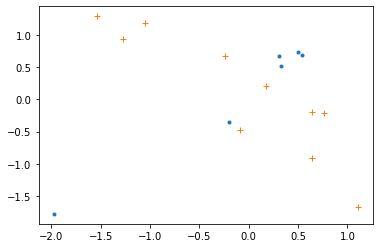

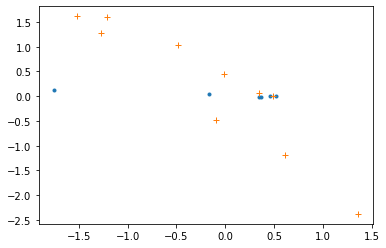

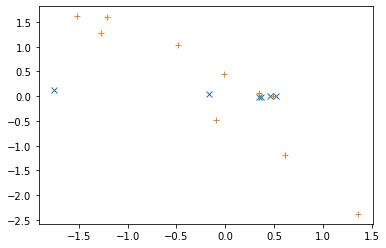

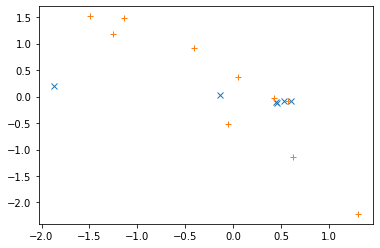

In [33]:
basis = binary_basis((2,2))
inds = is_bs(basis)
valid = basis[inds==1].reshape((-1, 4))
invalid = basis[inds==0].reshape((-1, 4))

valid_tensor = torch.tensor(valid).float()
invalid_tensor = torch.tensor(invalid).float()
D.train()
f_valid = D(valid_tensor)
f_invalid = D(invalid_tensor)
plt.plot(f_valid.detach()[:,0], f_valid.detach()[:,1], '.')
plt.plot(f_invalid.detach()[:,0], f_invalid.detach()[:,1], '+')
plt.show()
D.eval()
f_valid = D(valid_tensor)
f_invalid = D(invalid_tensor)

plt.plot(f_valid.detach()[:,0], f_valid.detach()[:,1], '.')
plt.plot(f_invalid.detach()[:,0], f_invalid.detach()[:,1], '+')
plt.show()

D.eval()
concact_tensor = torch.cat([valid_tensor, invalid_tensor], axis=0)
f_concact = D(concact_tensor)
f_concact_valid = f_concact[0:valid_tensor.shape[0],:]
f_concact_invalid = f_concact[valid_tensor.shape[0]:,:]
plt.plot(f_concact_valid.detach()[:,0], f_concact_valid.detach()[:,1], 'x')
plt.plot(f_concact_invalid.detach()[:,0], f_concact_invalid.detach()[:,1], '+')
plt.show()

D.train()
concact_tensor = torch.cat([valid_tensor, invalid_tensor], axis=0)
f_concact = D(concact_tensor)
f_concact_valid = f_concact[0:valid_tensor.shape[0],:]
f_concact_invalid = f_concact[valid_tensor.shape[0]:,:]
plt.plot(f_concact_valid.detach()[:,0], f_concact_valid.detach()[:,1], 'x')
plt.plot(f_concact_invalid.detach()[:,0], f_concact_invalid.detach()[:,1], '+')
plt.show()

TV 1.3340187490521587


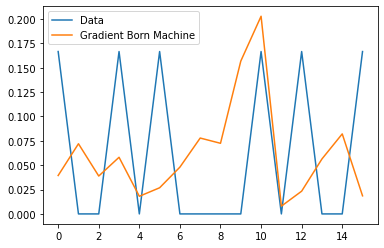

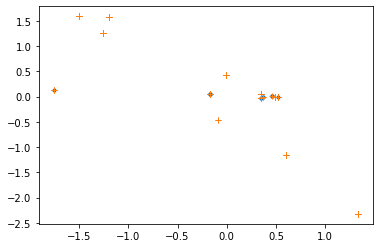

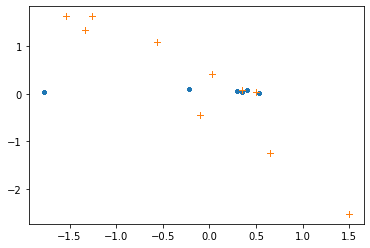

In [34]:
#np.random.seed(2)
%matplotlib inline
# Plot the feature space of the generated points and real points
D.eval()
Y_m_n = torch.tensor(sample_from_prob(basis_m_n, p_data, 12)).float()
X_m_n, G_grad_dummy = G() # already a tensor (require_grads=False)
concat_2m_n = torch.cat([Y_m_n, X_m_n.detach()], axis=0)
fconcat_2m_n = D(concat_2m_n) 
fY_m_n = fconcat_2m_n[0:Y_m_n.shape[0],:]
fX_m_n = fconcat_2m_n[Y_m_n.shape[0]:,:]




G.bm.generate_batch_size = 12

tv = TV(pl, p_data)
print('TV', tv)
pl = G.bm.pdf_actual(G.theta_list.detach().numpy())
# display
plt.plot(p_data)
plt.plot(pl)
plt.legend(['Data', 'Gradient Born Machine'])
plt.show()



if output_dim==3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], fY_m_n.detach()[:, 2], marker="x")
    ax.scatter(fX_m_n.detach()[:, 0], fX_m_n.detach()[:, 1], fX_m_n.detach()[:, 2], marker='.')
else:
    fig = plt.figure()
    plt.plot(fY_m_n.detach()[:, 0], fY_m_n.detach()[:, 1], '.')
    plt.plot(fX_m_n.detach()[:, 0], fX_m_n.detach()[:, 1], '+')
    fig.savefig(str(j)+'_d_train.png', bbox_inches='tight')

    fig = plt.figure()
    plt.plot(fY_m_n_last.detach()[:, 0], fY_m_n_last.detach()[:, 1], '.')
    plt.plot(fX_m_n_last.detach()[:, 0], fX_m_n_last.detach()[:, 1], '+')
    fig.savefig(str(j)+'_d_train.png', bbox_inches='tight')
    



In [ ]:
fY_m_n.shape

In [ ]:
np.where(is_bs(X_m_n.detach().reshape((-1, 3, 3)))==True)


In [ ]:
X_m_n.detach().numpy()[51]

In [ ]:
Y_m_n[10,:]==np.array([1., 0., 1., 1., 0., 1., 1., 0., 1.])

In [ ]:
Y_m_n[10,:]

In [ ]:
for i in range(Y_m_n.shape[0]):
    if Y_m_n[i,:]==np.array([1., 0., 1., 1., 0., 1., 1., 0., 1.]):
        print(i)

In [ ]:
np.unique(Y_m_n, axis=0)

In [ ]:
is_bs(binary_basis((3,3)))